<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Análise e visualização inicial dos dados

**Descrição da atividade**: Utilizar técnicas de `Cullen-Frey`, `Histogramas` e `PDFs`: A partir do dataset do seu Team visualize, obtenha os respectivos Histogramas e PDFs para as seguintes variáveis: Número Total de Casos, Número Total de Mortes, Número Total De Testes, `Número Diário de Casos (NDC)`, `Número Diário de Mortes (NDM)`, `Número Diário de Testes (NDT)`. Identifique semelhanças e discrepâncias entre os países. Este exercício é apenas para os dados da [Our World In Data (OWD)](https://ourworldindata.org/). Implemente ainda uma análise de regressão linear em Python entre as variáveis: NDC e NDT para os países que apresentam PDF próximas.

Para a realização desta atividade, os dados foram recuperados do OWD e armazenados em diferentes formatos, seguindo o padrão de Análise Generalizada de Dados. O módulo de aquisição dos dados está disponível no [repositório do projeto](https://github.com/cmath-covid/dataset).

<hr>

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

### Visualização geral dos dados

Antes de iniciar a aplicação das técnicas sobre os conjuntos de dados, faz-se necessário a visualização destes, para que o comportamento geral de cada uma das variáveis de cada país, possa ser entendido e visualizado.

Para começar todo o processo de análise desenvolvido neste documento, os dados baixados da OWD são carregados. Perceba que os dados utilizados foram coletados no dia 03/06/2020, o que permanecerá fixo para evitar que possíveis mudanças nos dados feitas posteriormente a análise, não altere os resultados e interpretações obtidos.

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_06_03.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])

Nas seções abaixo, separadas por cada uma das variáveis a serem analisadas, é feita a visualização da assinatura da série temporal.

### Dados sem flutuação

Esta subseção apresenta as variáveis que não possuem flutuação em sua estrutura.

#### Número total de casos

In [3]:
countries = data_owd.groupby('iso_code')

In [4]:
NAMES = {
    'BRA': 'Brasil',
    'CAN': 'Canadá',
    'CUB': 'Cuba',
    'MEX': 'México',
    'RUS': 'Rússia'
}

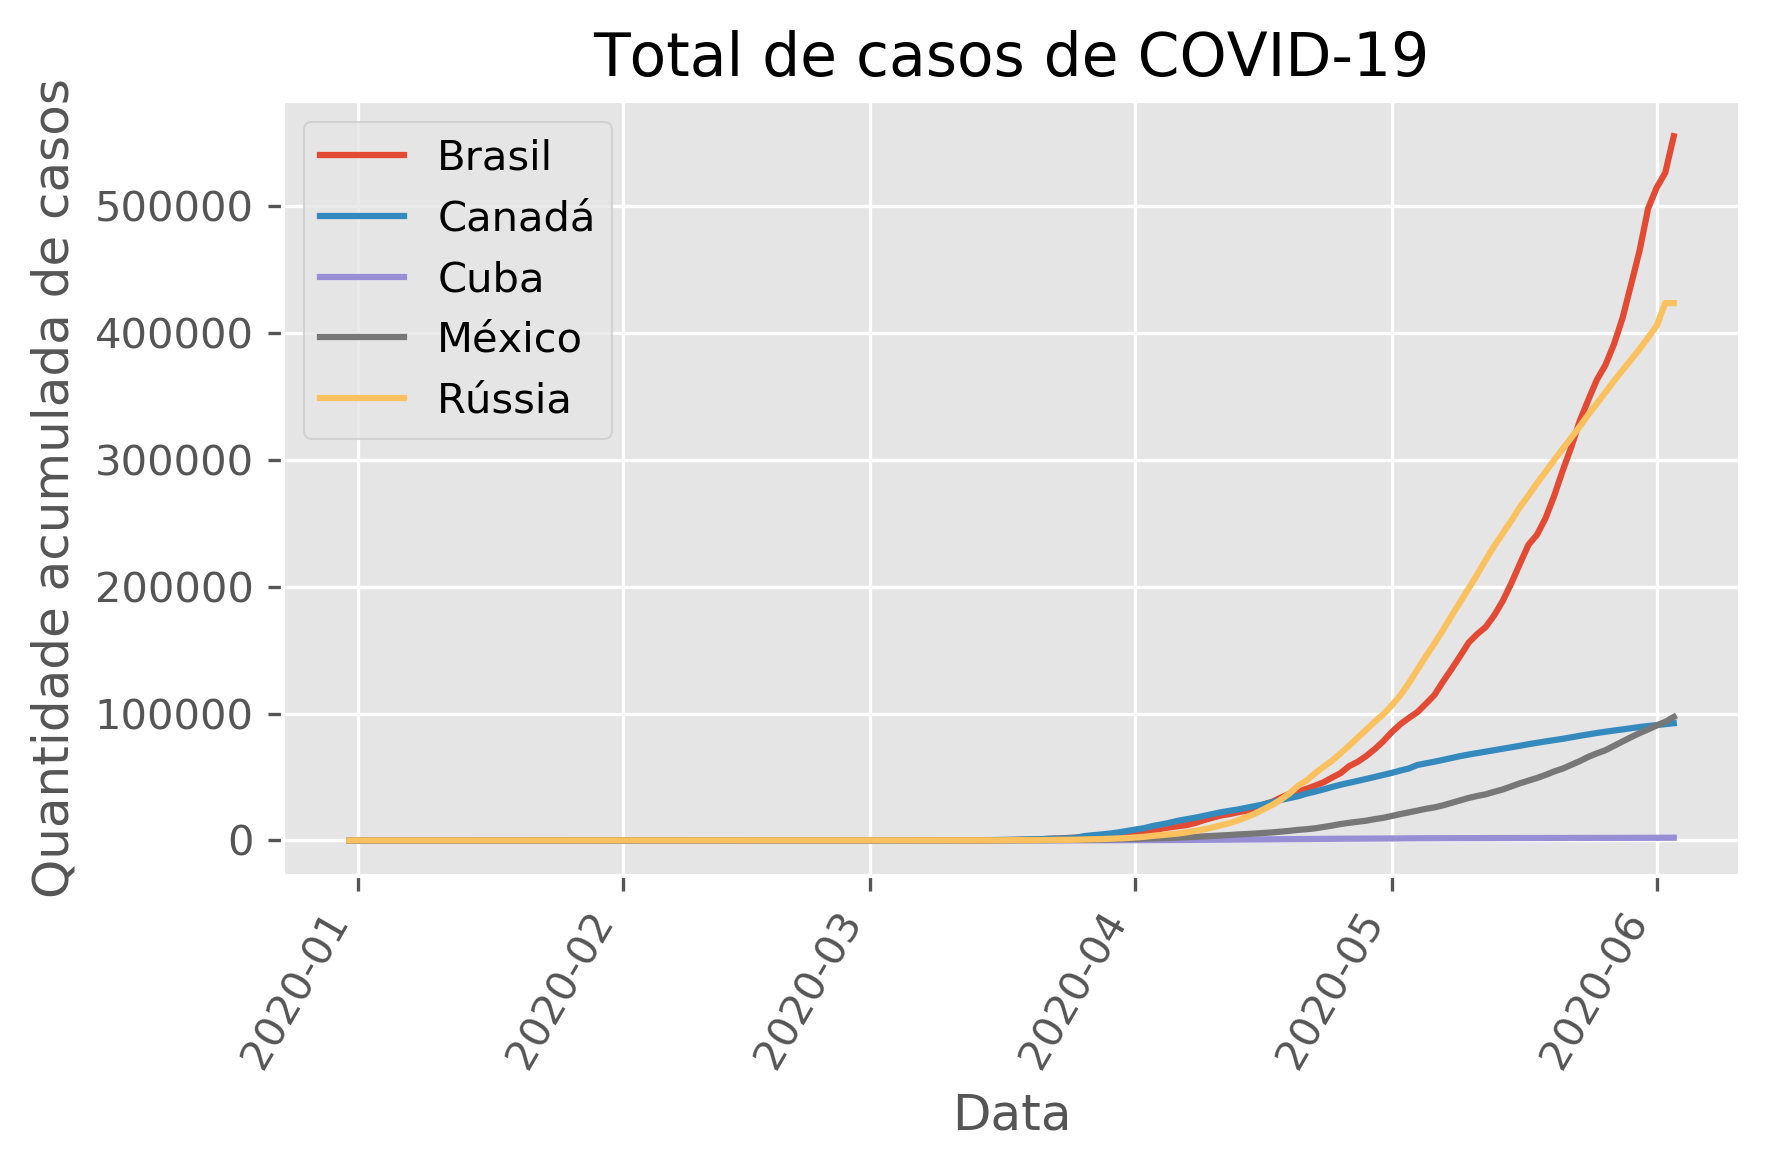

In [5]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de casos')
plt.title('Total de casos de COVID-19')
plt.tight_layout()
plt.legend(legend)
plt.show()

#### Número total de mortes

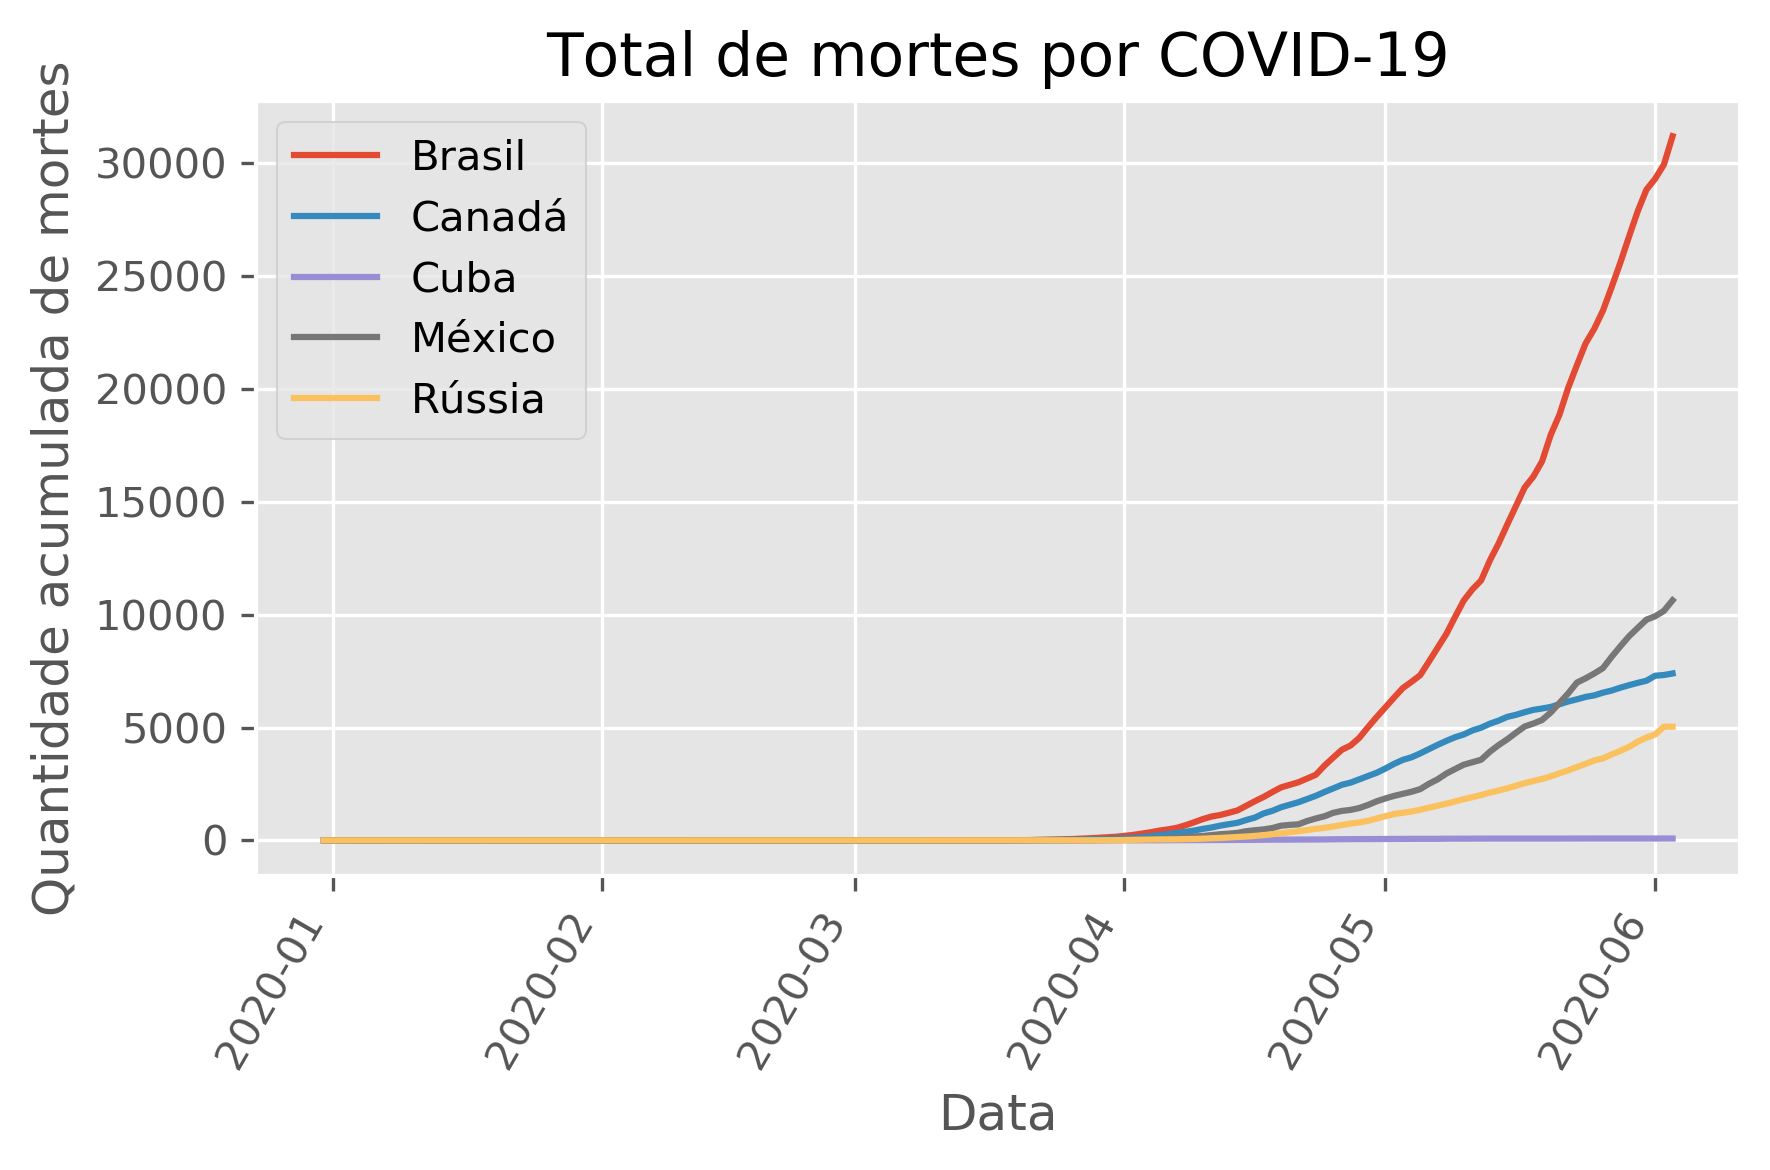

In [6]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de mortes')
plt.title('Total de mortes por COVID-19')
plt.tight_layout()
plt.legend(legend)
plt.show()

#### Número total de testes

Nesta seção, os dados totais de testes de cada país é apresentado, aqui cabe informar que, os dados sobre testes do Brasil não estão sendo divulgados, o que faz que o país não aparece na visualização abaixo.

> Há nos dados da OWD registros de testes para o Brasil, mas isso ocorre em uma faixa pequena de tempo e em uma quantidade que não torna possível sua visualização


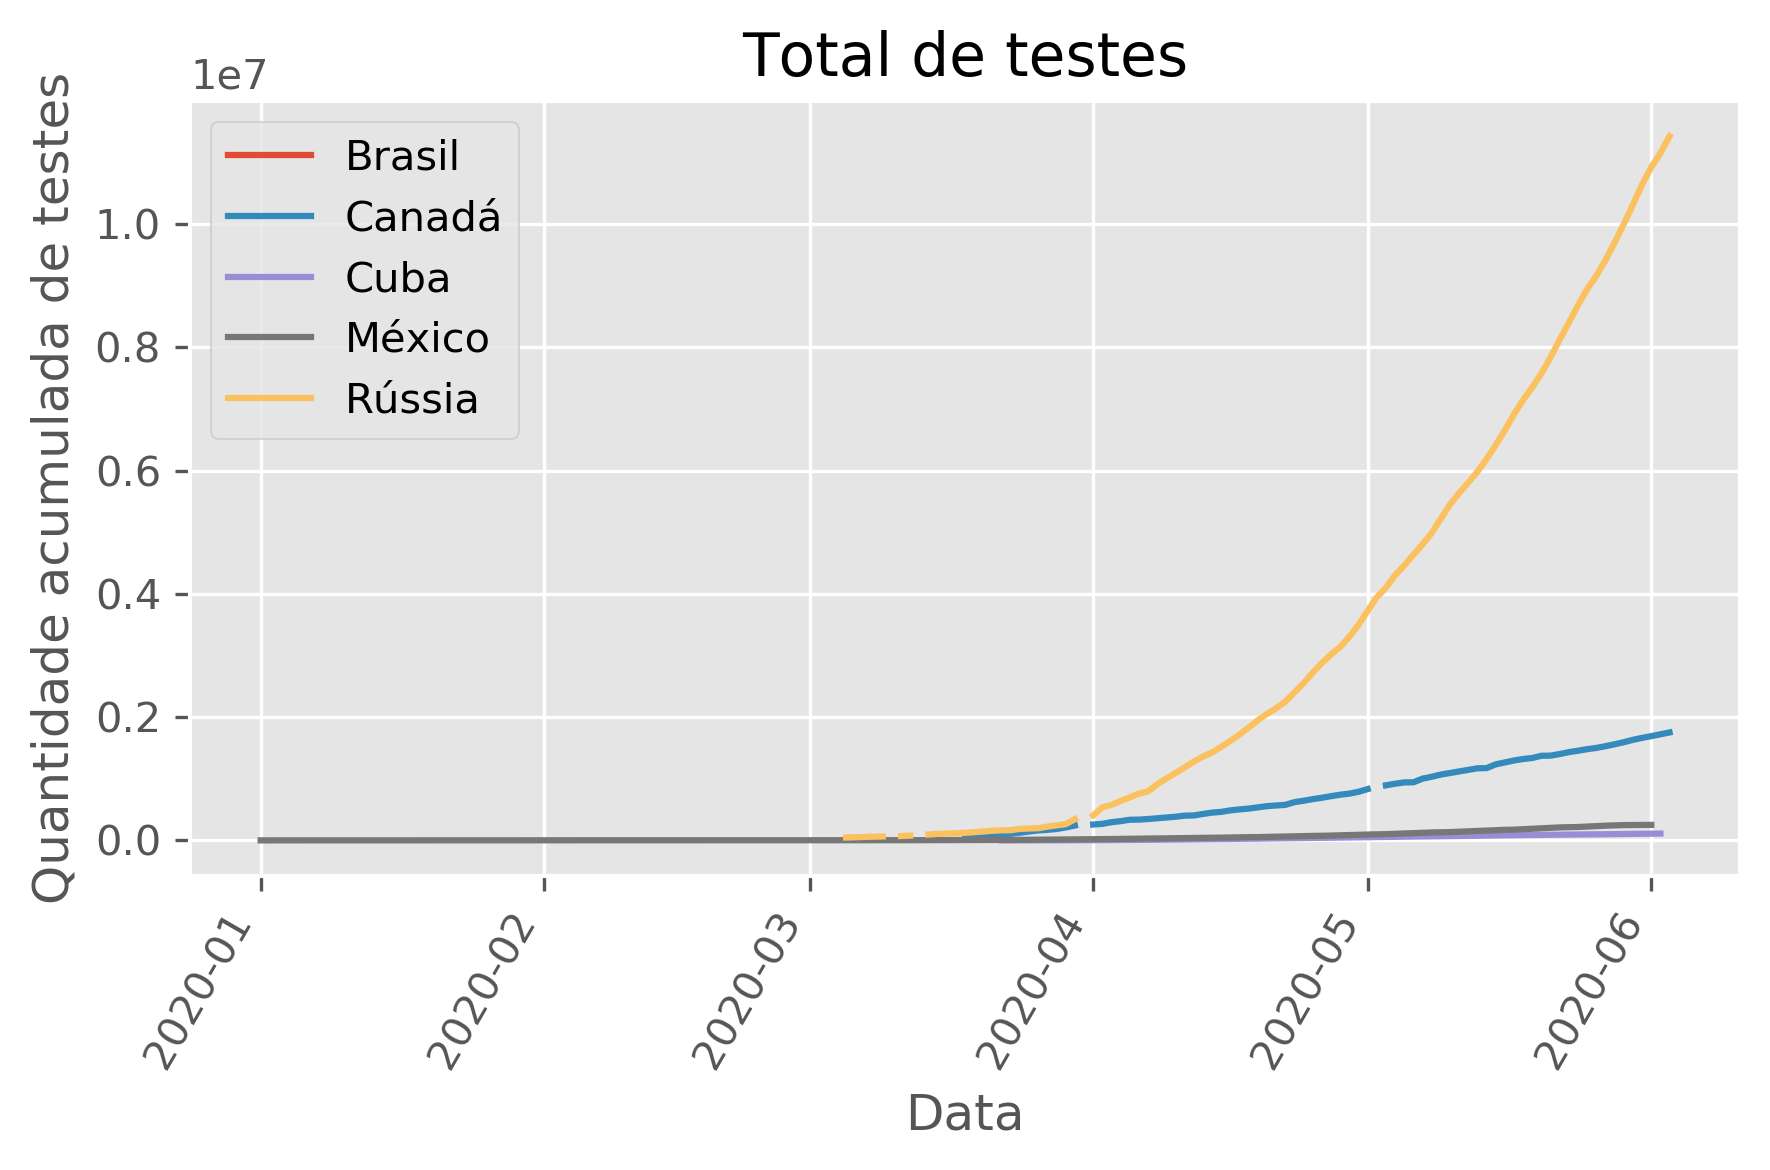

In [7]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de testes')
plt.title('Total de testes')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

### Dados com flutuação

Diferente do apresentado anteriormente, nesta seção, as variáveis que possuem flutuação diária são apresentados

#### Número diário de casos (NDC)


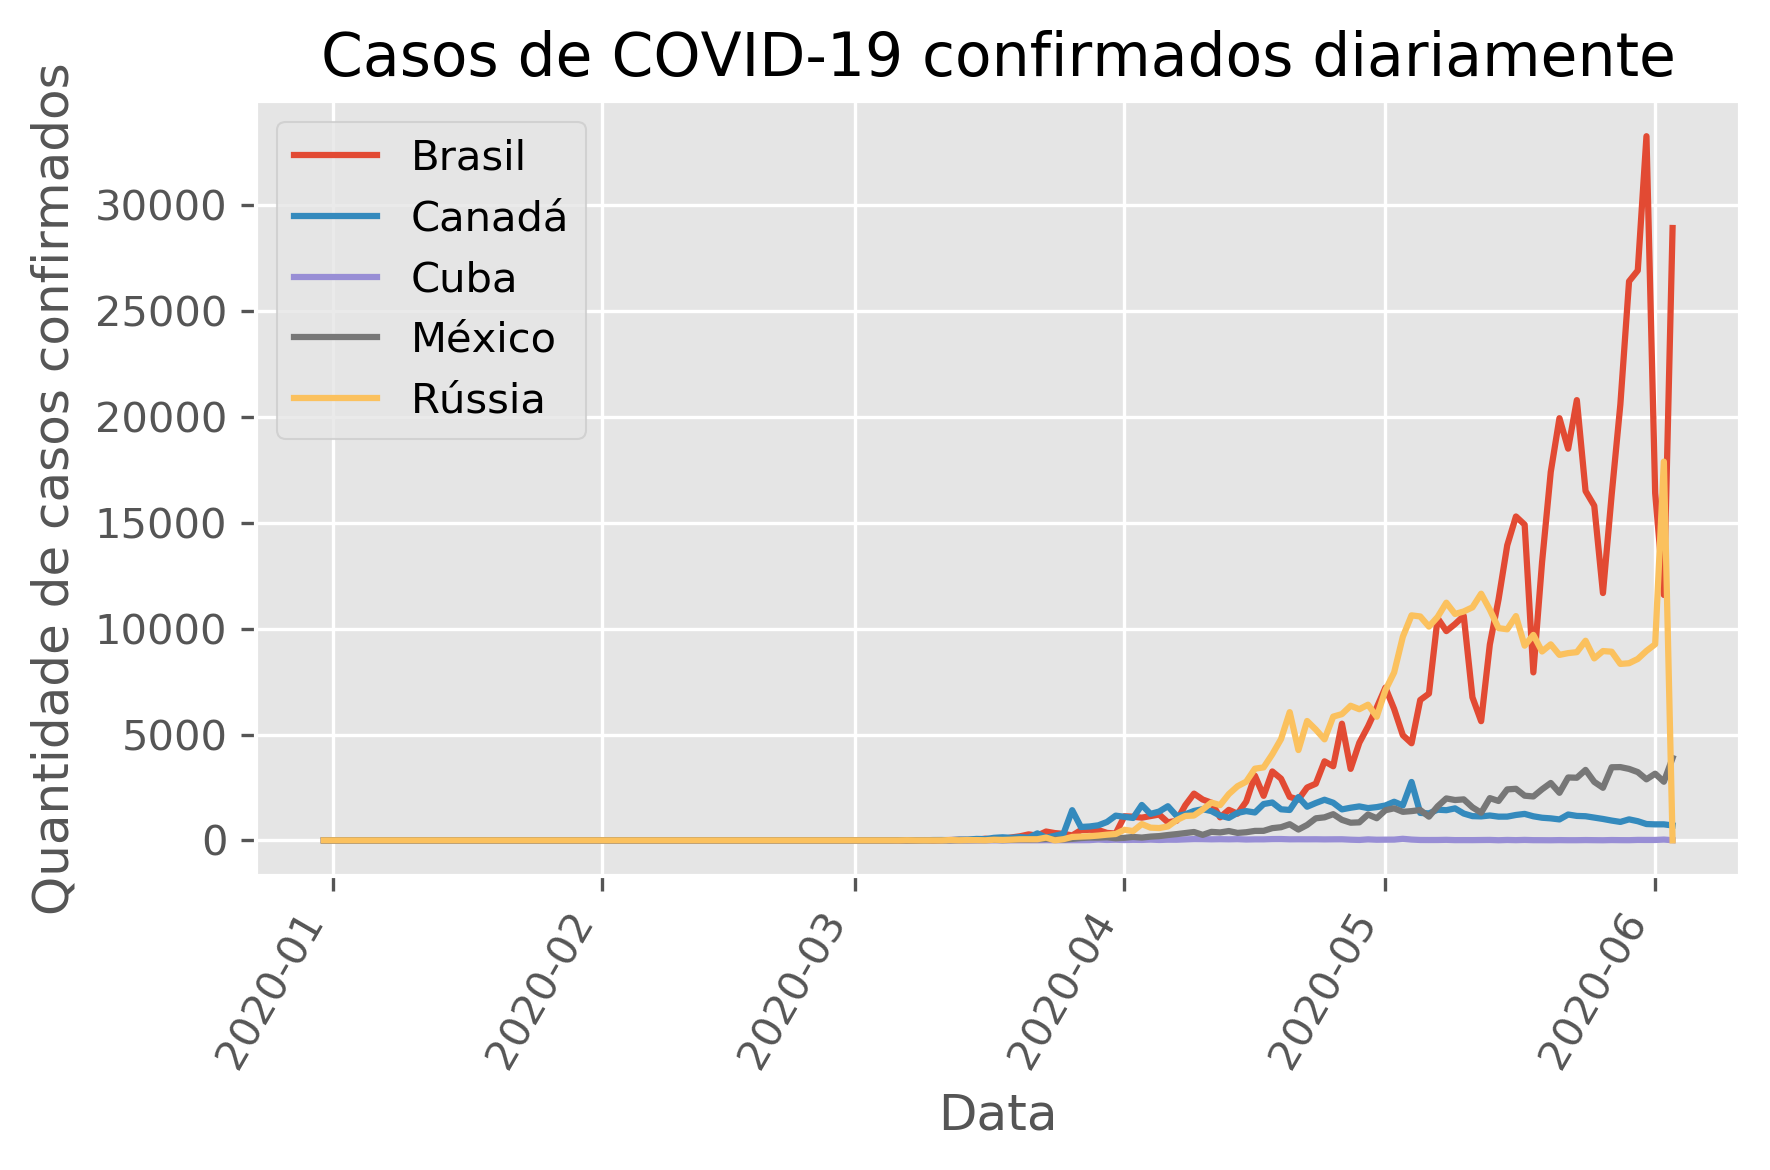

In [8]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos confirmados')
plt.title('Casos de COVID-19 confirmados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

#### Número diário de mortes (NDM)

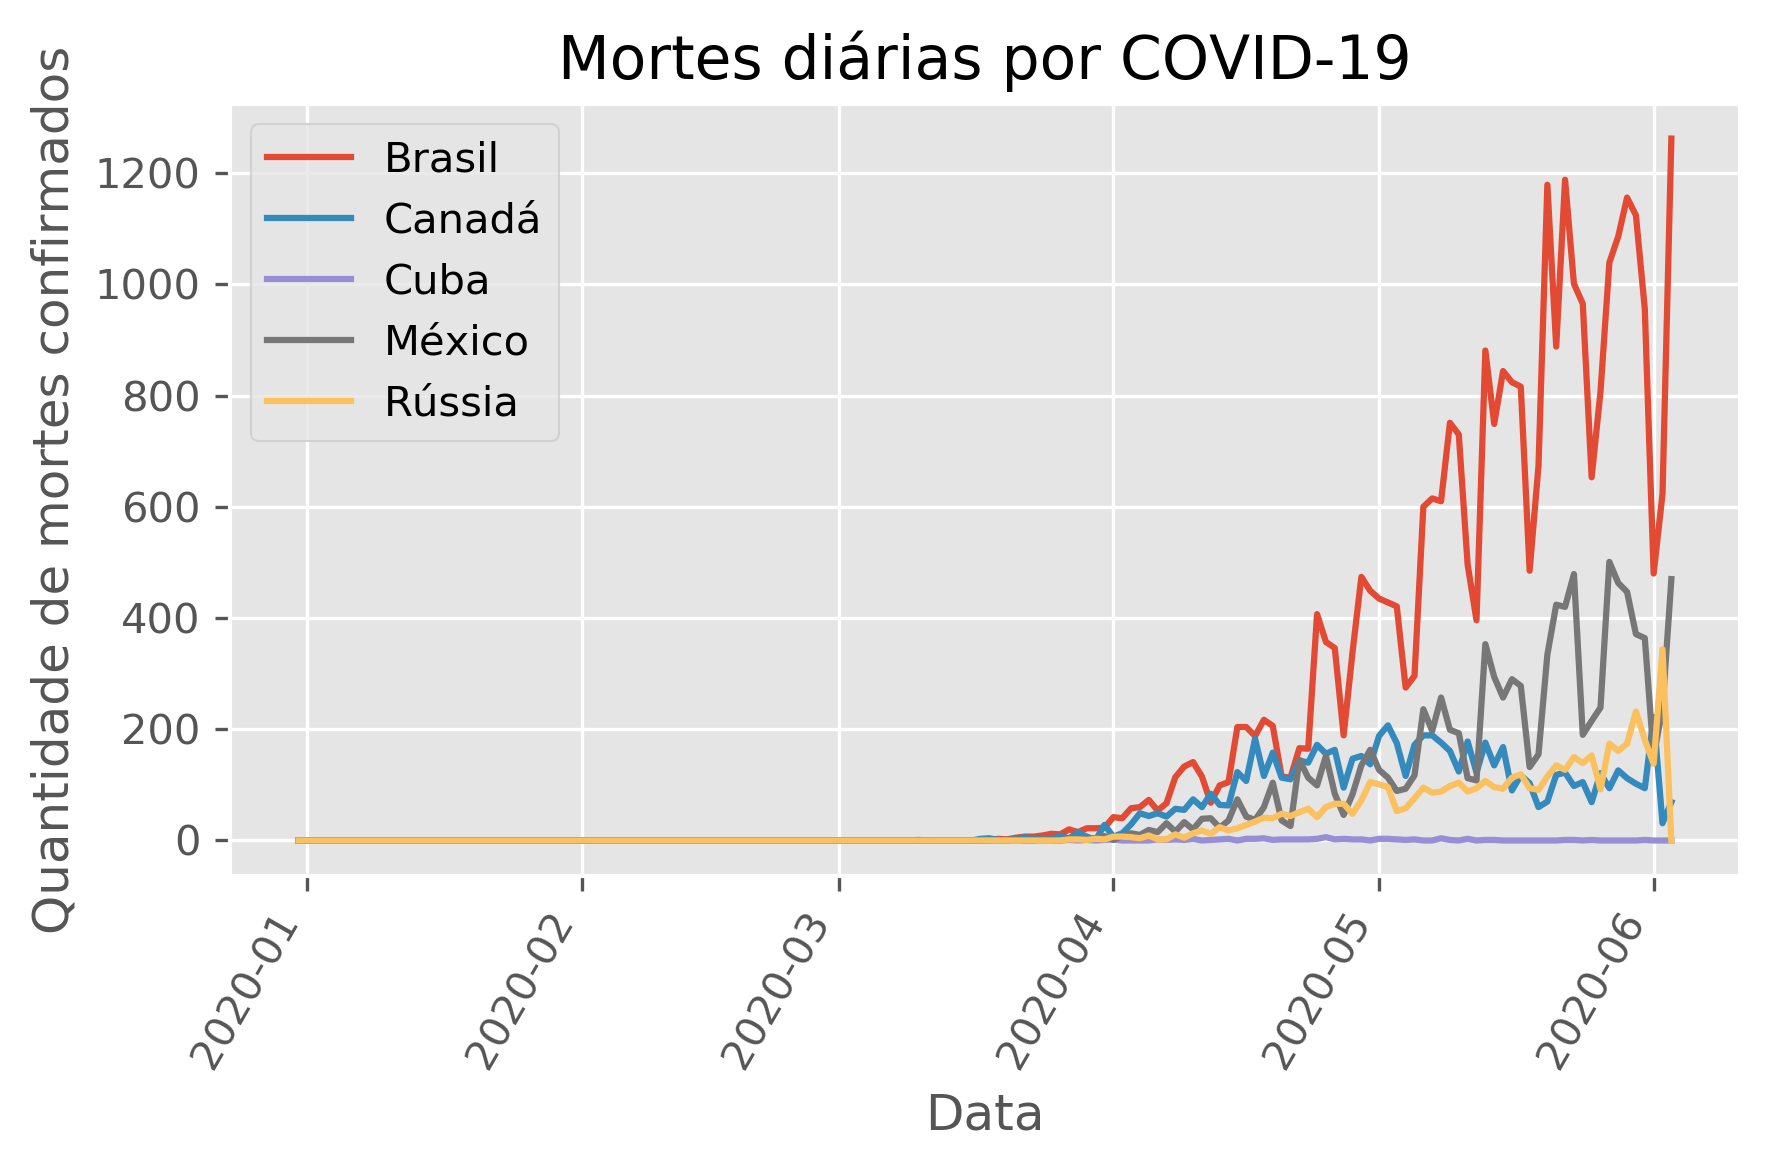

In [9]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de mortes confirmados')
plt.title('Mortes diárias por COVID-19')
plt.tight_layout()
plt.legend(legend)
plt.show()

#### Número diário de testes

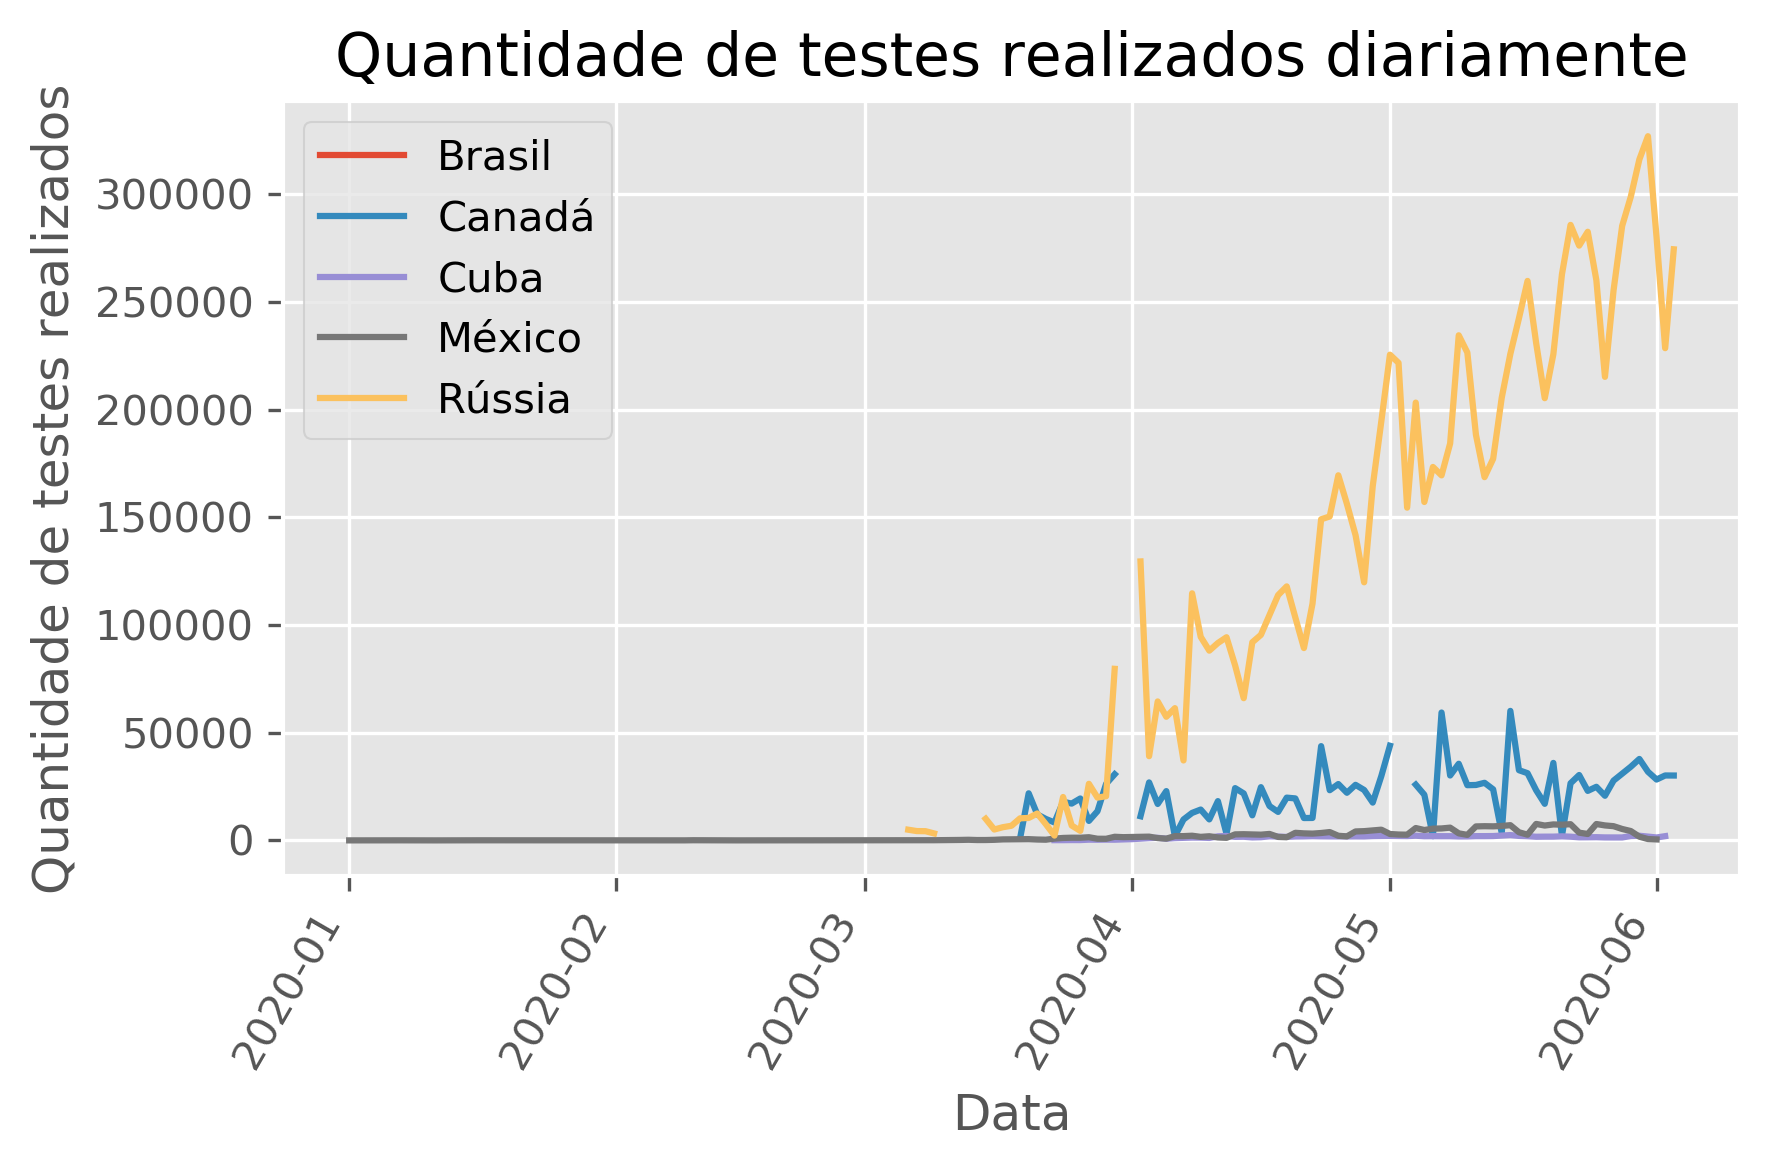

In [10]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de testes realizados')
plt.title('Quantidade de testes realizados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

### Histogramas

Assim como requisitado, abaixo são apresentados os histogramas de cada um dos países analisados neste trabalho, em suas diferentes variáveis. Para que a visualização dos dados fosse feita de maneira conjunta, faz-se a normalização dos dados, o que permite que todos sejam comparados e sua distribuição estatística seja entendida.

> Com a normalização, as quantidades de frequências originais são perdidas, porém, optou-se por realizar a análise desta forma para que uma visualização inicial dos comportamentos fosse mapeada.

Abaixo são feitas as definições das funções para a geração do histograma dos grupos de países em diferentes variáveis e também as funções de normalização dos dados.

In [11]:
labelerfnc = lambda x: NAMES[x] # Criado para facilitar a exibição dos nomes


def standardize_bycountry(data, variable):
    """Função para agrupar por país e normalizar os dados
    """
    
    def standardize_factor(distribution):
        return (distribution - np.mean(distribution)) / np.std(distribution)
    def normalize_minmax(data):
        return (data - data.min()) / (data.max() - data.min()) # data / data.max() # 
    
    res = []
    groups = data.groupby('iso_code')
    for group in groups:
        group_data = groups.get_group(group[0])
        
        res.append(
            pd.DataFrame({
                variable: normalize_minmax(group_data[variable])
            })
        )
        res[-1]['iso_code'] = group[0]
    return pd.concat(res)


def plot_histogram_bycountry(data, variable_to_plot, title, xlabel, ylabel):
    """Função para gerar os histogramas normalizados, por país.
    """
    data = standardize_bycountry(data, variable_to_plot)
    
    return (
        ggplot(data, aes(x = variable_to_plot))
            + geom_histogram()
            + ggtitle(title)
            + xlab(xlabel) + ylab(ylabel)
            + facet_wrap('~iso_code', labeller = labelerfnc)
            + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
    )

Nos primeiros testes de visualização, foram identificados distorções relacionadas as quantidades de dias com registro zero, então, o conjunto de dados foi filtrado para reduzir a quantidade de zeros apresentadas, o que remove a distorção que estes causam na análise dos histogramas e posteriormente das PDFs

In [12]:
data_owd = data_owd[data_owd['date'] >= '2020-03-15']

#### Quantidade total de casos (Por país)

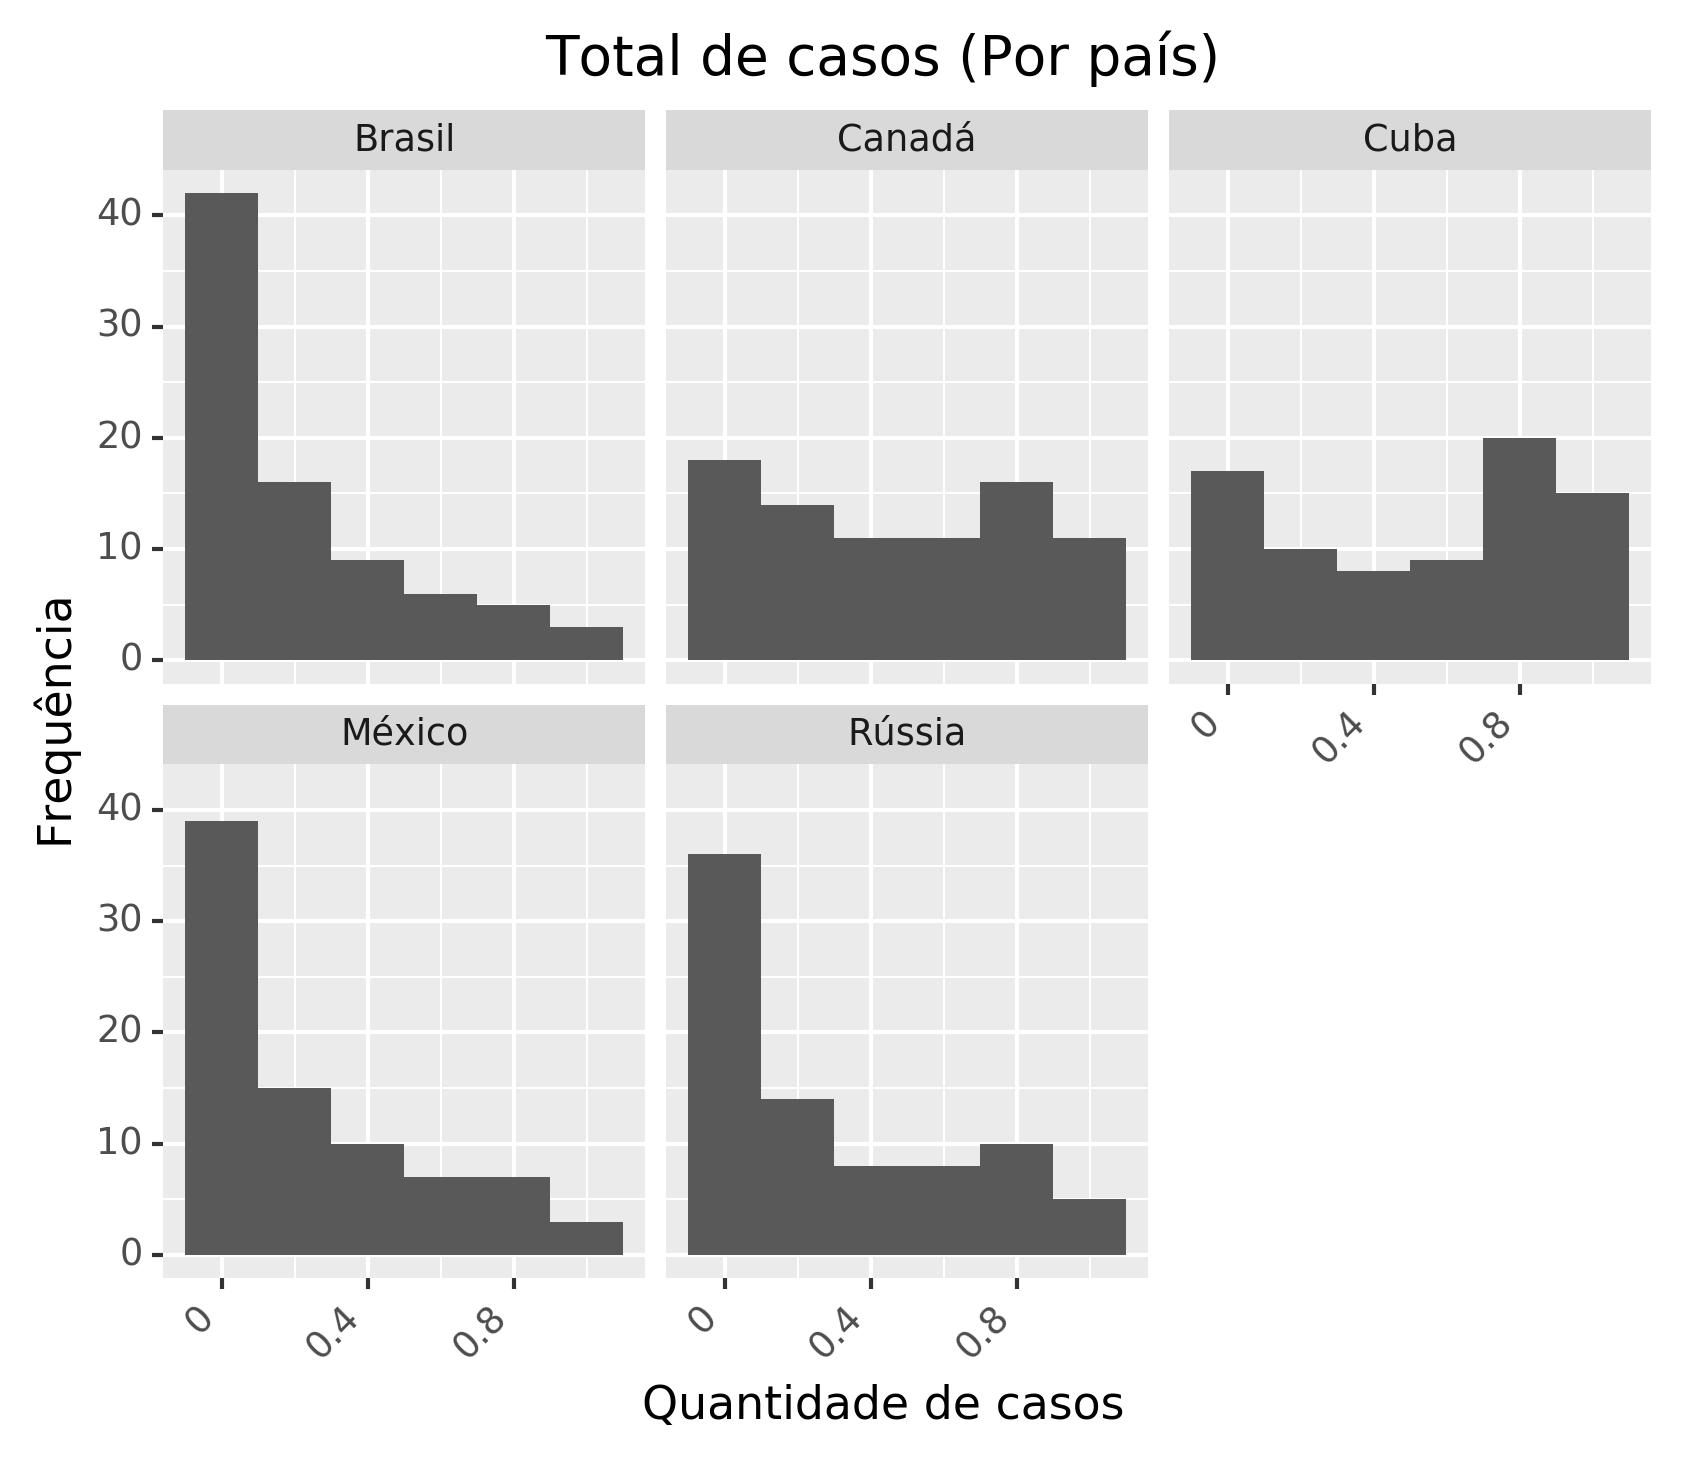

<ggplot: (8773843770537)>

In [13]:
plot_histogram_bycountry(data_owd, 'total_cases', 'Total de casos (Por país)', 
                                                             'Quantidade de casos', 'Frequência')

#### Quantidade total de mortes (Por país)

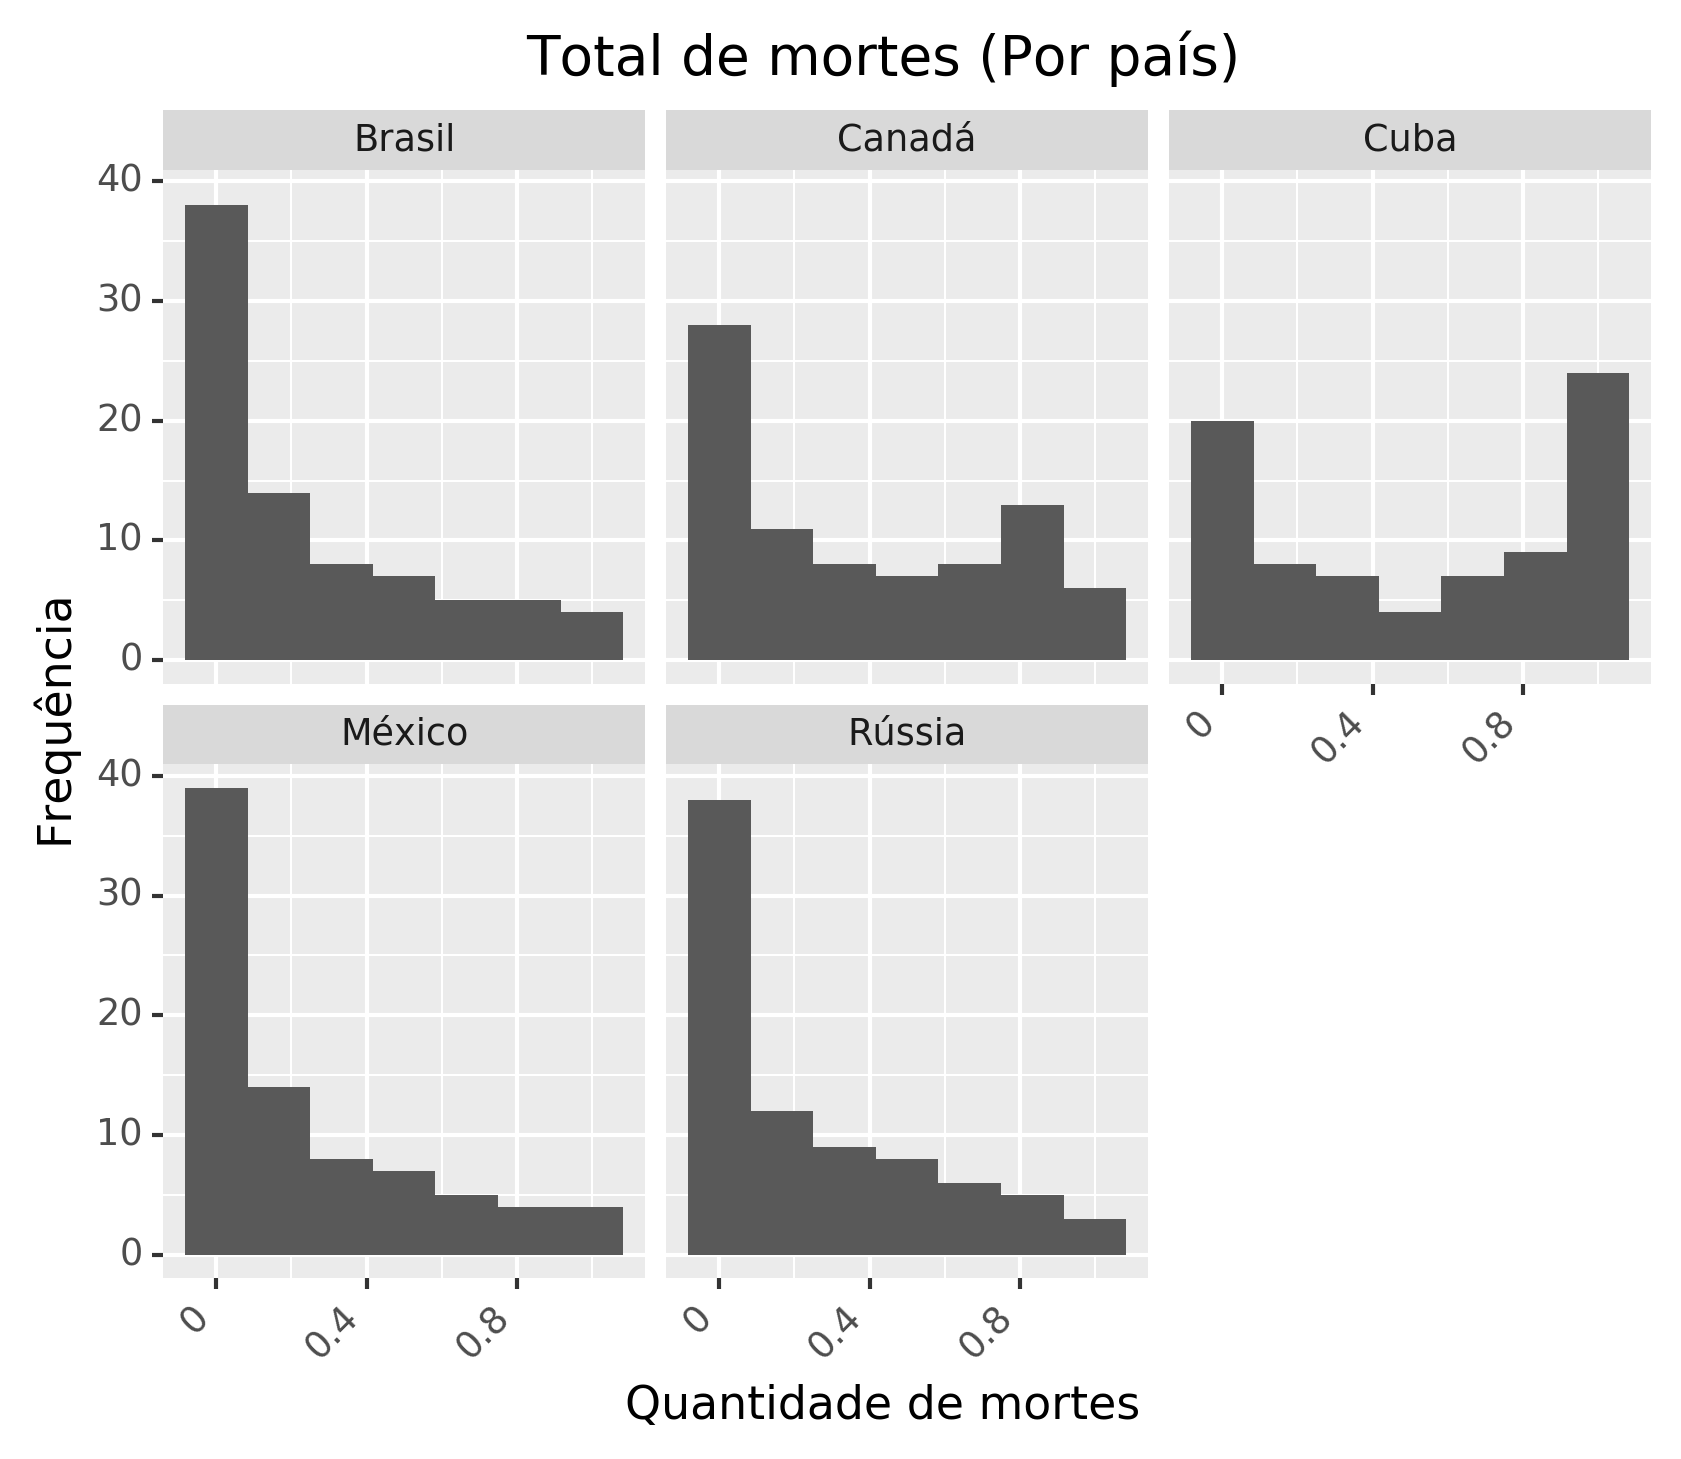

<ggplot: (8773843526499)>

In [14]:
plot_histogram_bycountry(data_owd, 'total_deaths', 'Total de mortes (Por país)', 
                                                             'Quantidade de mortes', 'Frequência')

#### Quantidade total de testes (Por país)

Para a visualização do histograma dos testes, como já citado anteriormente, os dados do Brasil não estão sendo considerados por conta da baixa quantidade disponível

> Abaixo, o conjunto de dados é filtrado, removendo as ocorrências do Brasil, para evitar erros na geração do histograma, o que é feito por conta dos motivos apresentados anteriormente

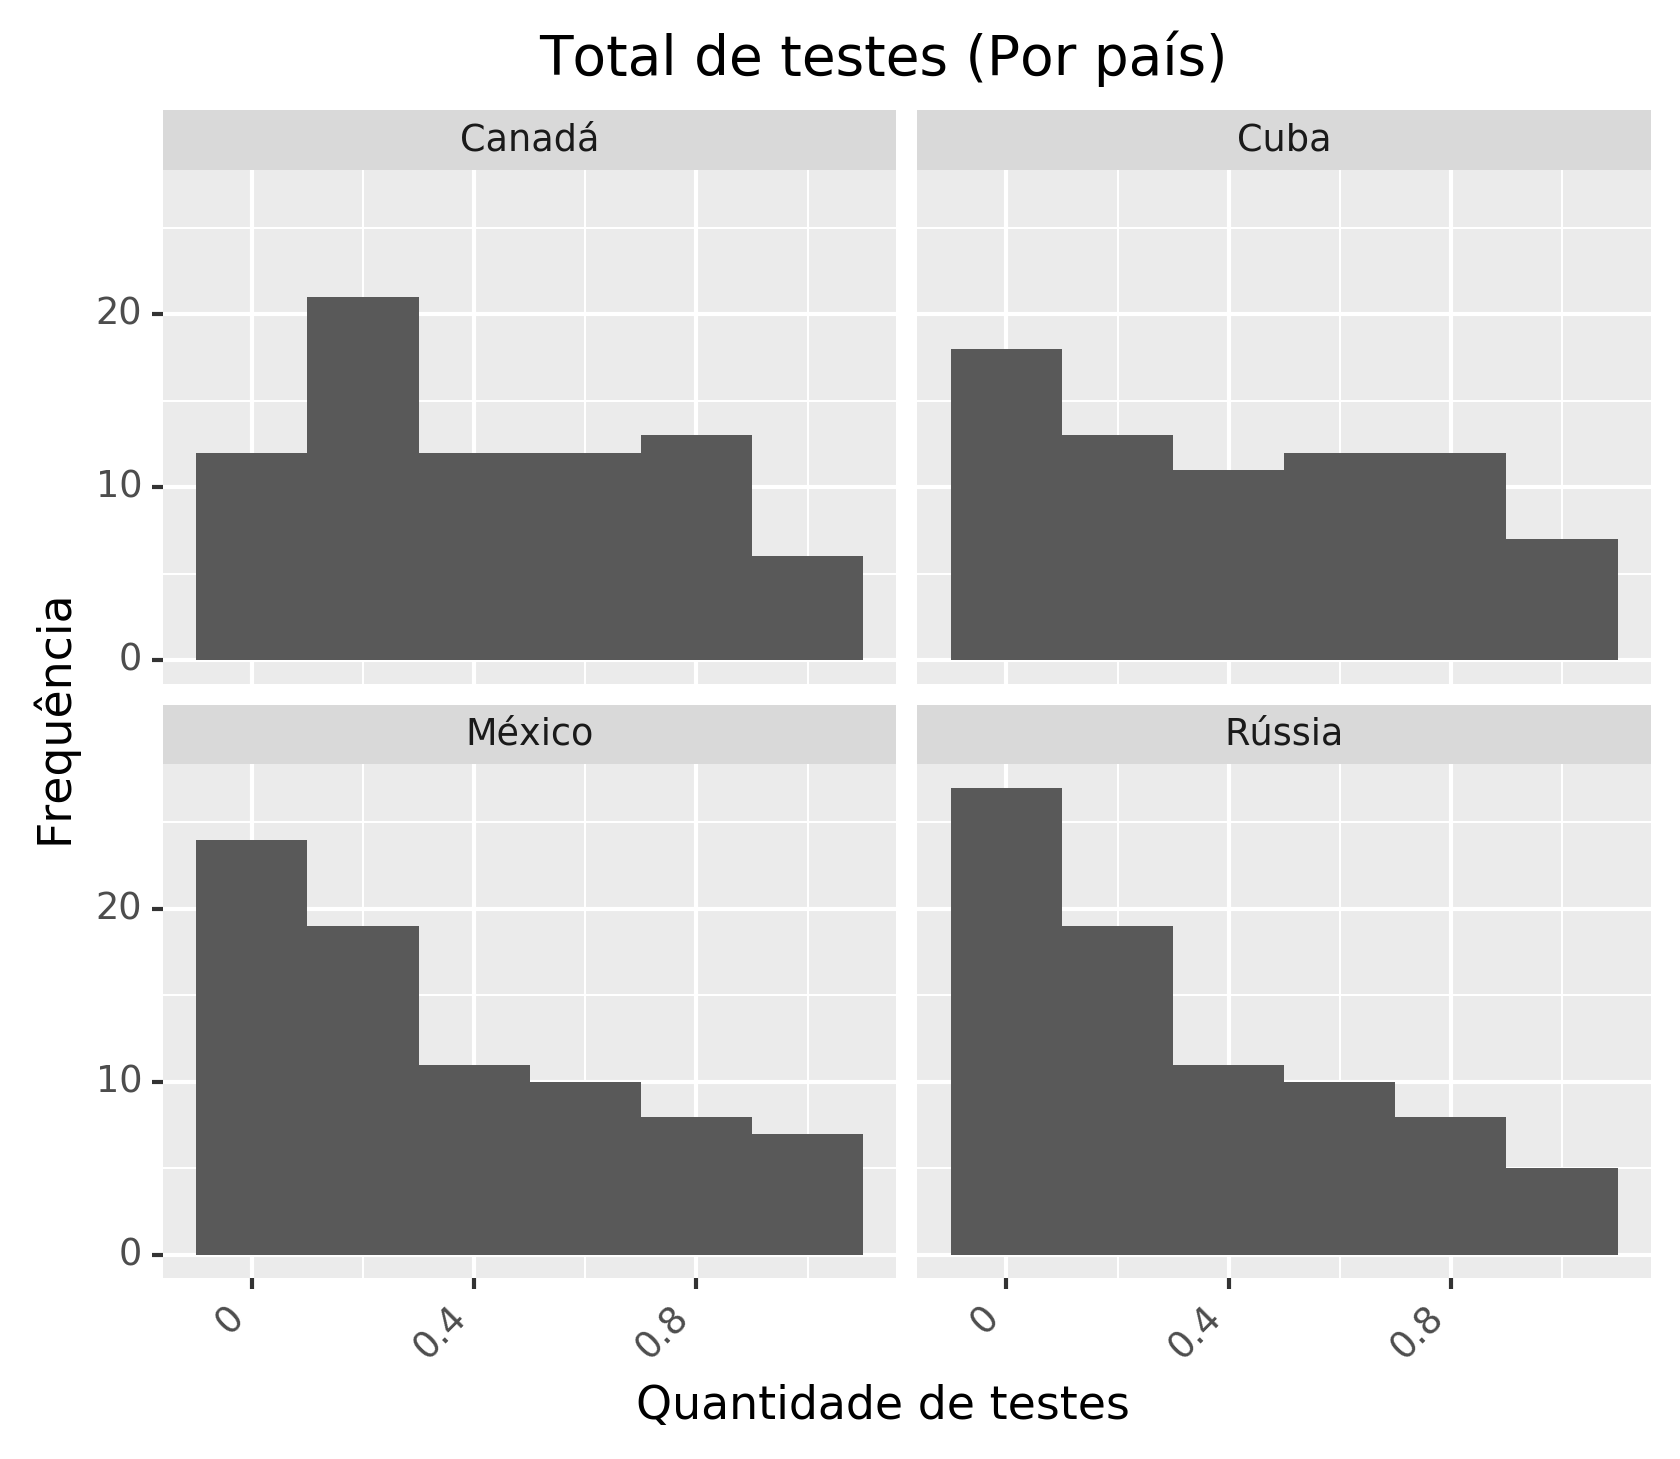

<ggplot: (8773843427504)>

In [15]:
_data = data_owd.copy()
_data = _data[_data['iso_code'] != 'BRA']

plot_histogram_bycountry(_data, 'total_tests', 'Total de testes (Por país)', 
                                                             'Quantidade de testes', 'Frequência')

#### Casos diários (Por país)

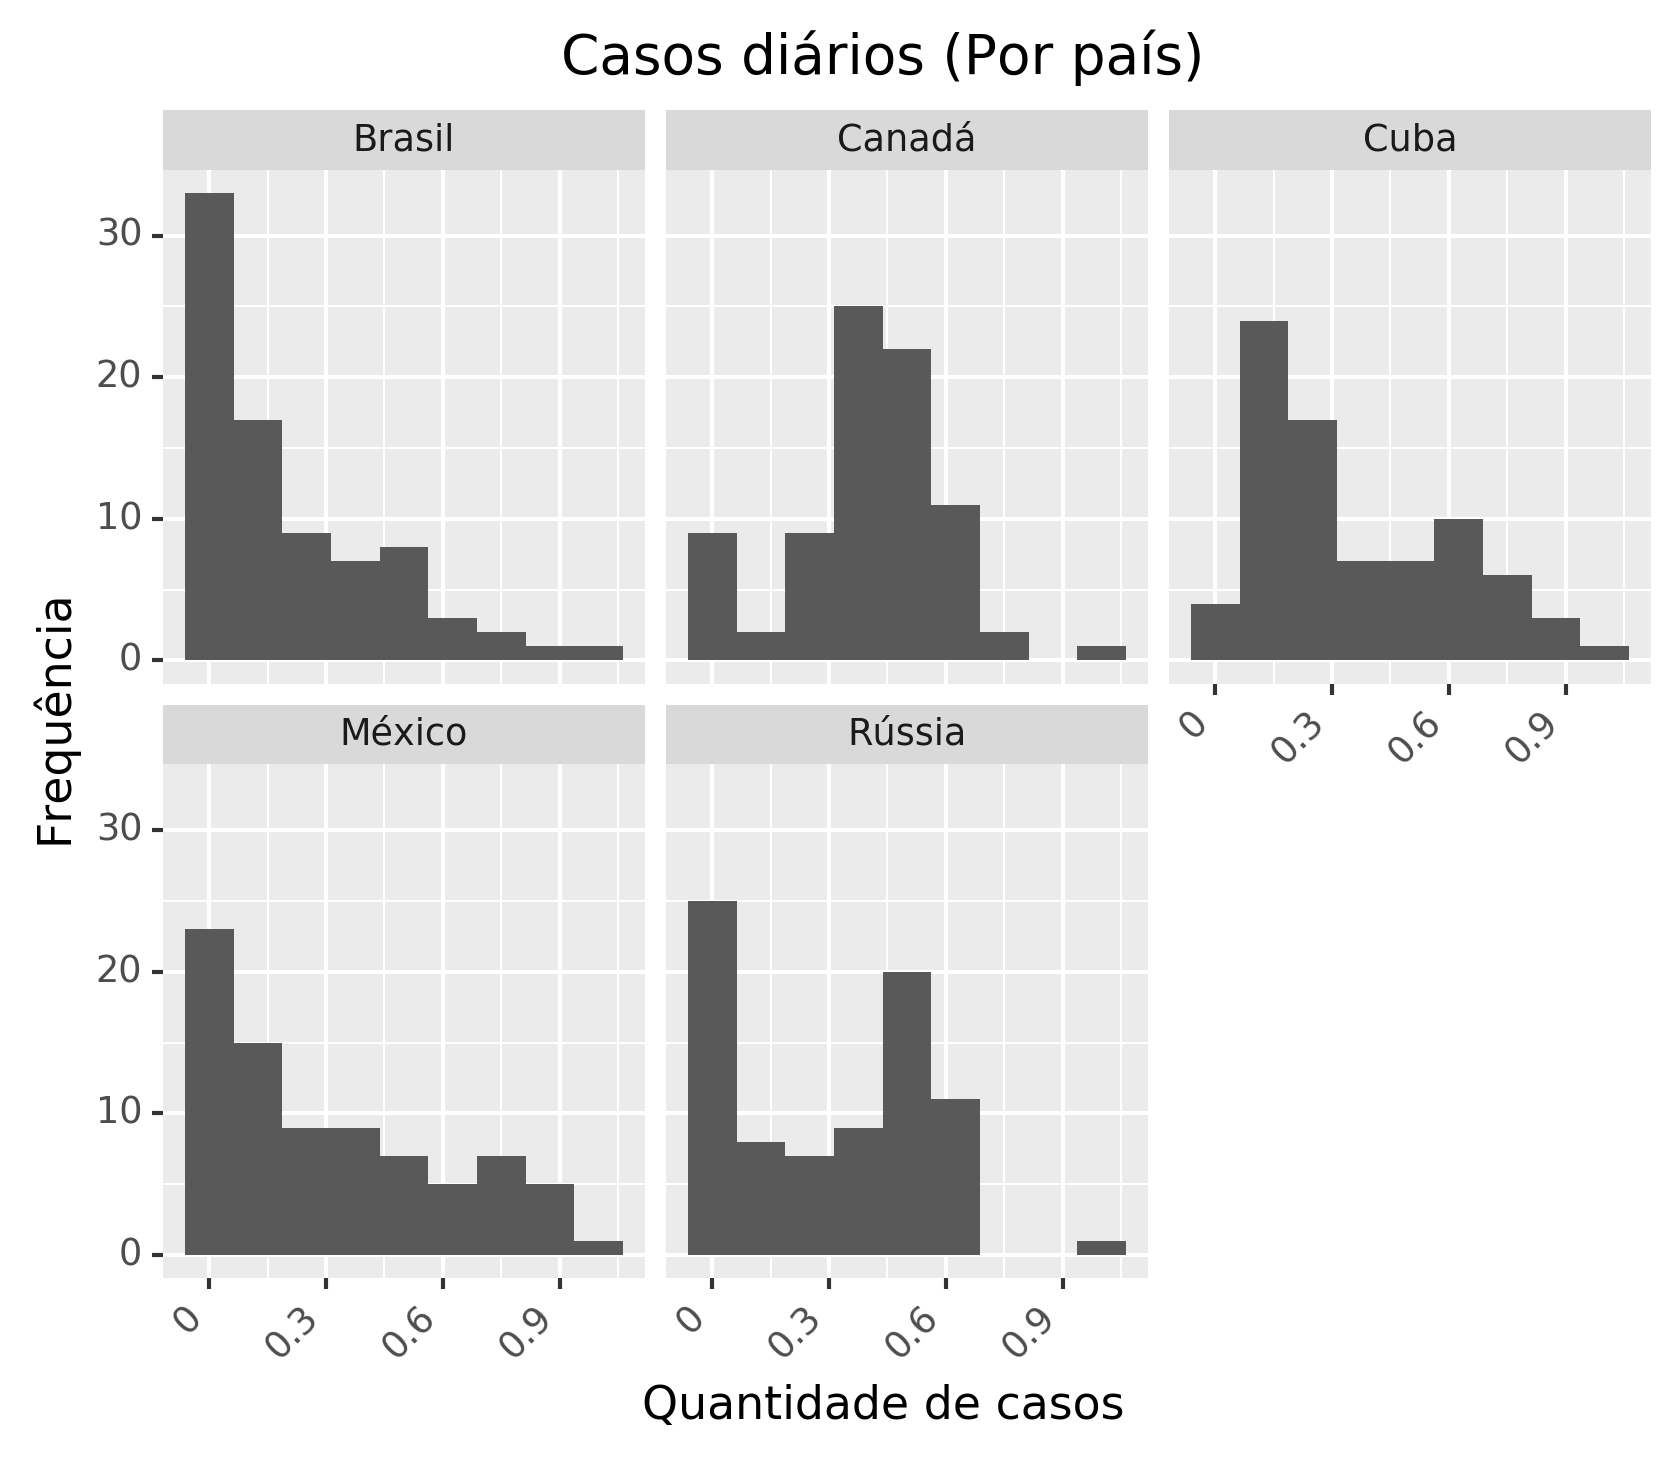

<ggplot: (-9223363263011431452)>

In [16]:
plot_histogram_bycountry(data_owd, 'new_cases', 'Casos diários (Por país)', 
                                                             'Quantidade de casos', 'Frequência')

#### Mortes diárias (Por país)

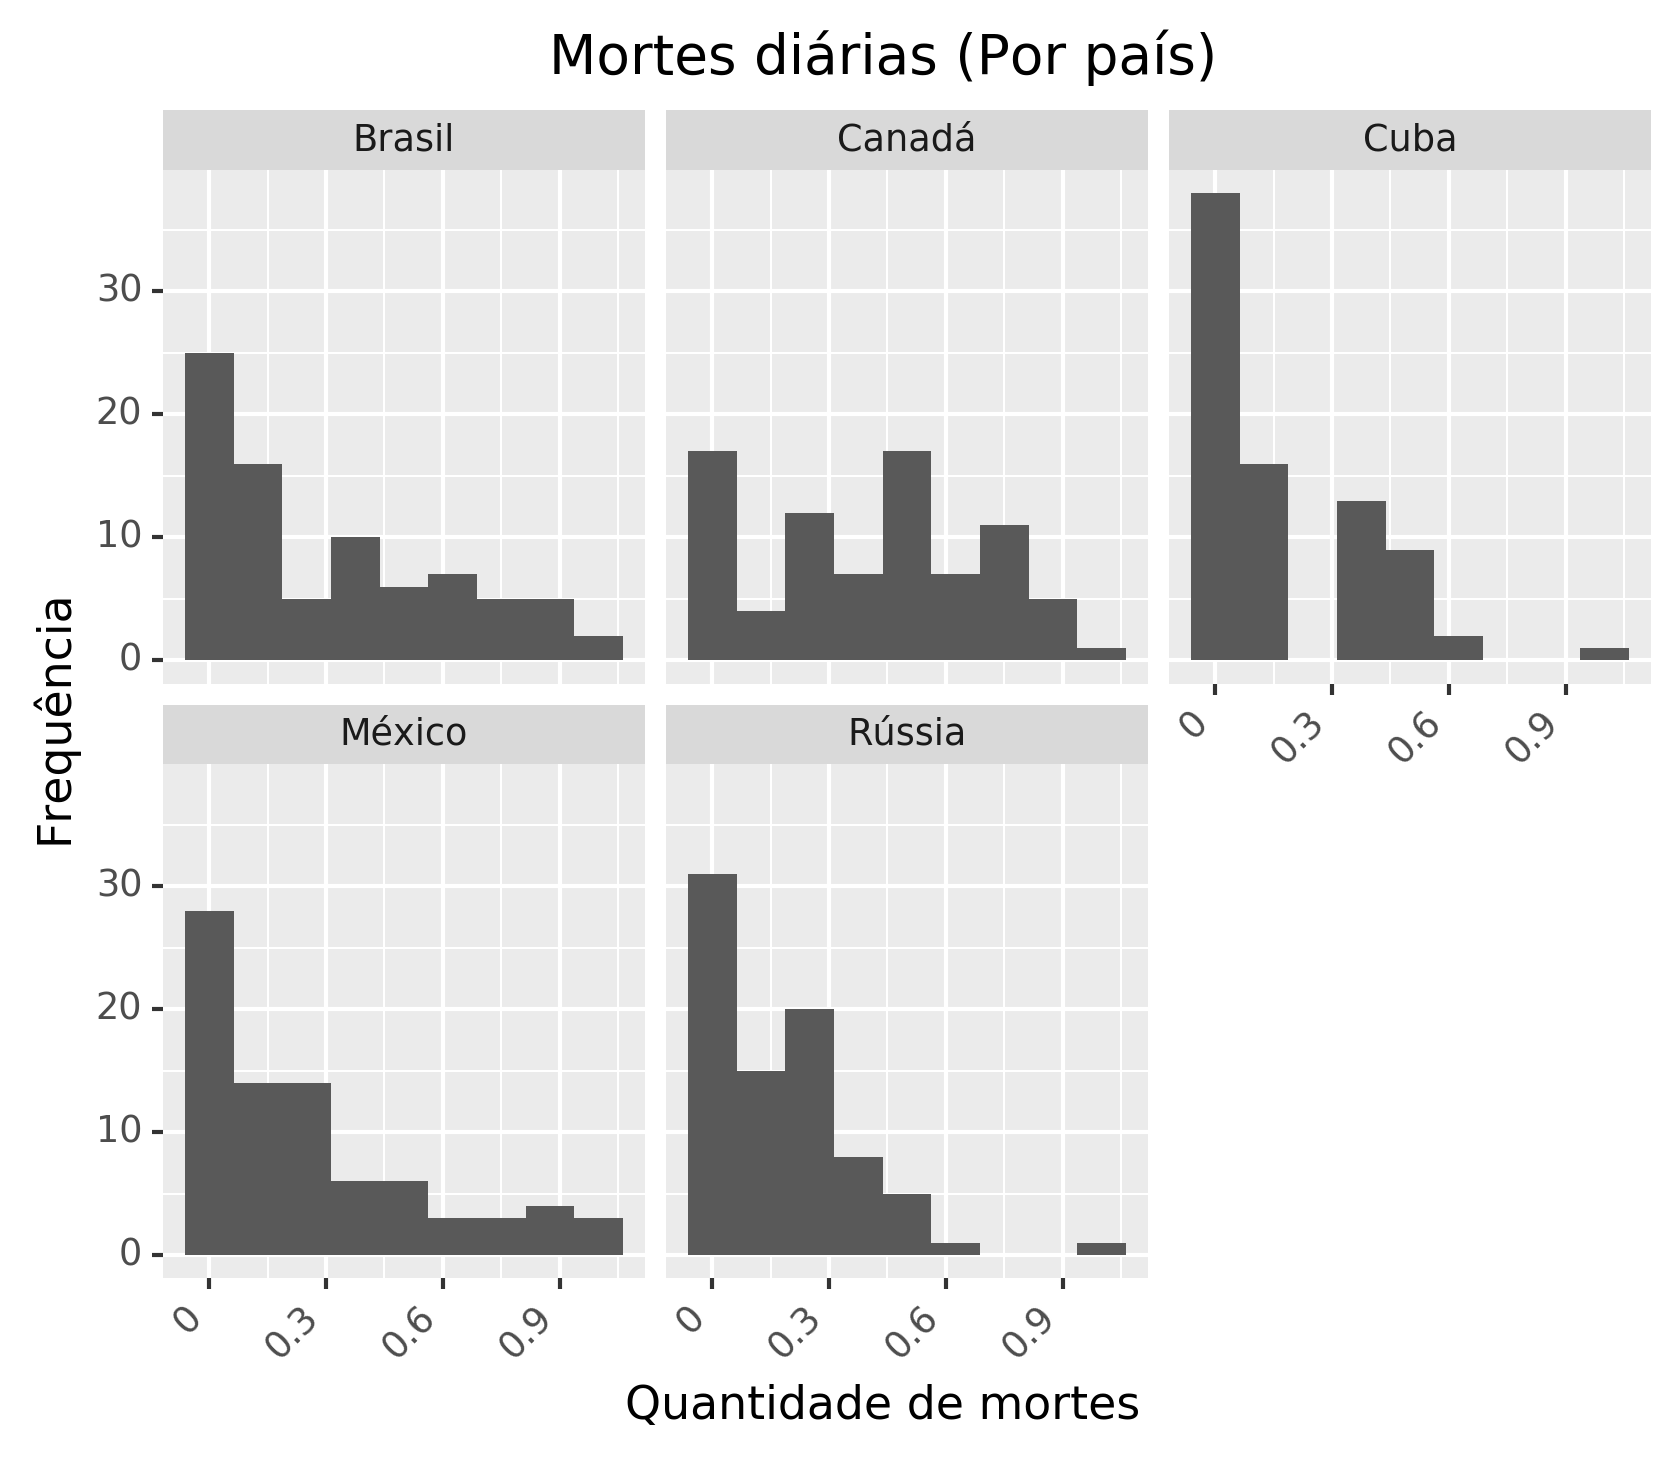

<ggplot: (-9223363263011593009)>

In [17]:
plot_histogram_bycountry(data_owd, 'new_deaths', 'Mortes diárias (Por país)', 
                                                             'Quantidade de mortes', 'Frequência')

#### Testes diários (Por país)

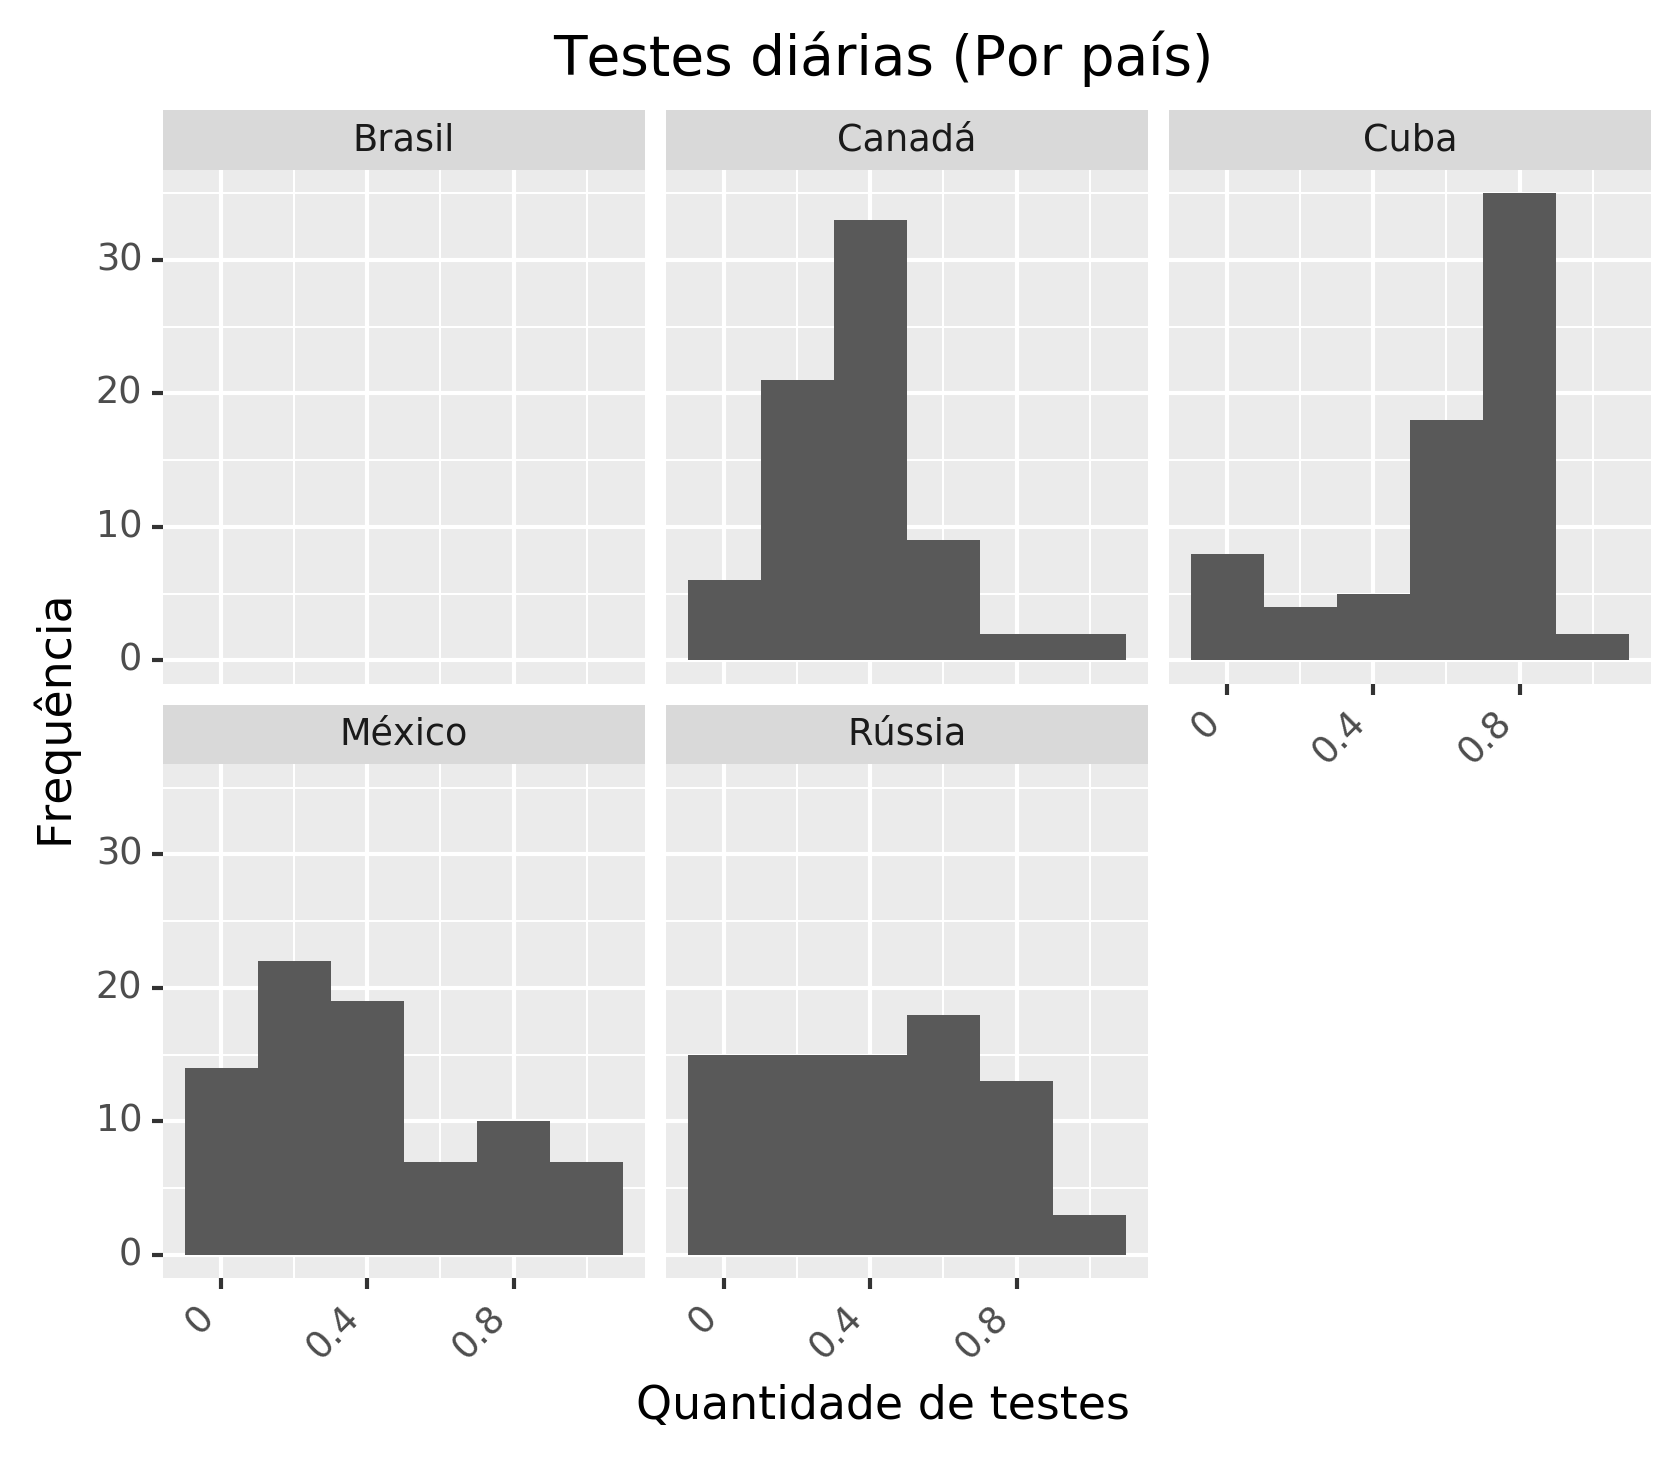

<ggplot: (-9223363263011740258)>

In [18]:
plot_histogram_bycountry(data_owd, 'new_tests', 'Testes diárias (Por país)', 
                                                             'Quantidade de testes', 'Frequência')

<hr>

### Espaço de Cullen-Frey e Função Densidade de Probabilidade (PDF)

Nesta seção, as classes estatísticas dos dados de cada uma das variáveis apresentadas anteriormente são geradas através do Espaço de Cullen-Frey. Além disto, com a definição da classe estatística, uma **F**unção de **D**ensidade de **P**robabilidade (PDF) é ajustada para cada um dos dados.

Para a utilização do espaço de Cullen-Frey, neste trabalho foi utilizado o pacote [interfacer](https://pypi.org/project/interfacer/), que através da comunicação com o pacote [fitdistrplus](https://cran.r-project.org/web/packages/fitdistrplus/index.html), escrito para a linguagem R, gera os espaços de maneira confiável.

> O pacote interfacer permite que os mesmos parâmetros utilizados no pacote original sejam utilizados, o que se necessário facilita o processo de customização dos resultados gerados.

Inicialmente o pacote interfacer é carregado e configurado para gerar os plots do espaço de Cullen-Frey.

In [19]:
import interfacer.descdist
import interfacer.jupyter_helper

In [20]:
def plot_cullenfrey(data: pd.DataFrame, **kwargs):
    """Função para visualização no espaço de Cullen-Frey.
    """
    with interfacer.jupyter_helper.cellplot(width=800, height=640):
        interfacer.descdist.descdist(data, **kwargs)

A apresentação da classificação e do ajuste para cada variável é feita abaixo, sendo separada por país.

### Brasil

#### Total de casos

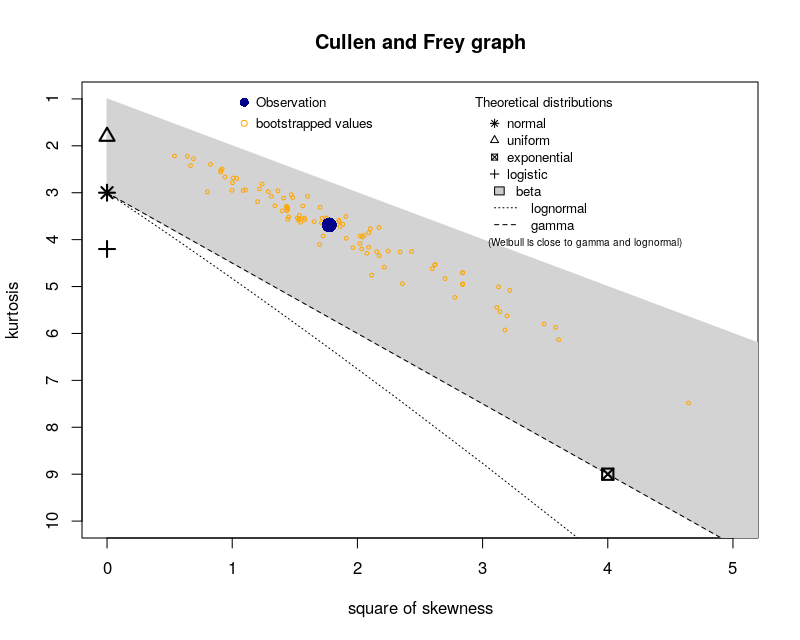

In [21]:
bra = data_owd[data_owd['iso_code'] == 'BRA']
plot_cullenfrey(bra.total_cases, boot = 100)

#### Quantidade total de mortes

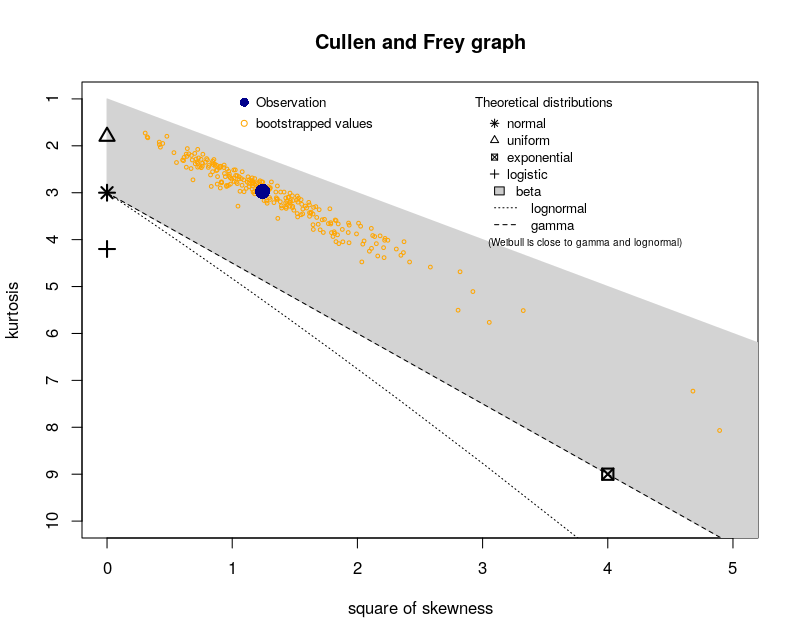

In [22]:
plot_cullenfrey(bra.total_deaths, boot = 250)

##### Quantidade diária de casos

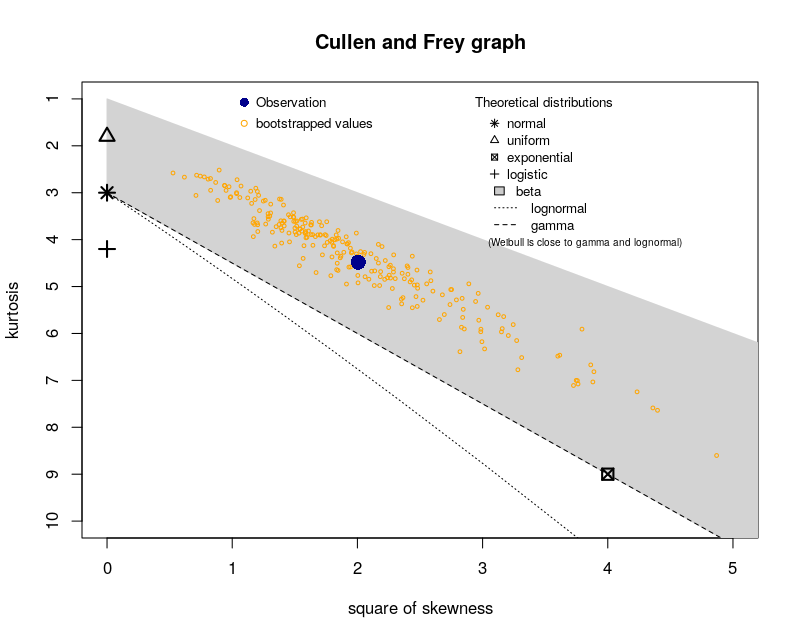

In [23]:
plot_cullenfrey(bra.new_cases, boot = 250)

##### Quantidade diária de mortes

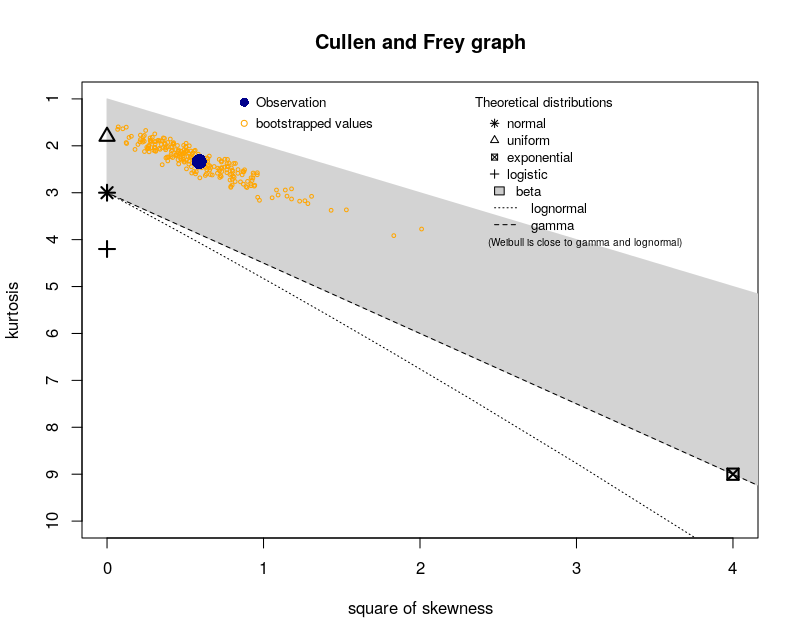

In [24]:
plot_cullenfrey(bra.new_deaths, boot = 250)

<hr>

### Canadá

#### Total de casos

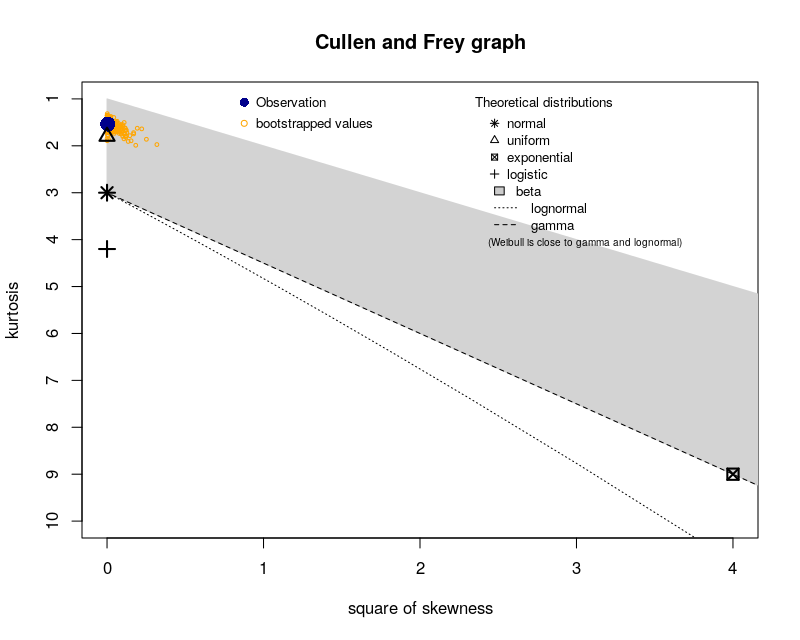

In [25]:
can = data_owd[data_owd['iso_code'] == 'CAN']
plot_cullenfrey(can.total_cases, boot = 250)

#### Total de mortes

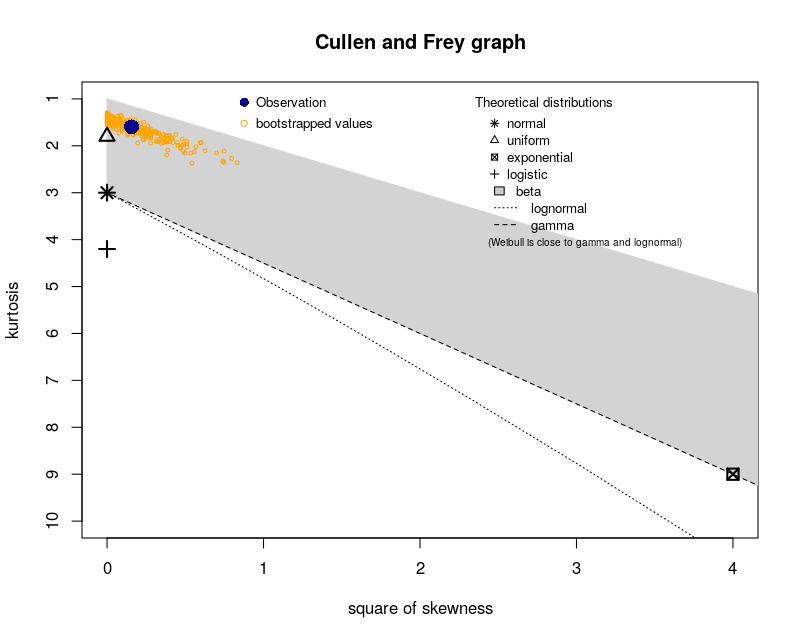

In [26]:
plot_cullenfrey(can.total_deaths, boot = 250)

#### Total de testes

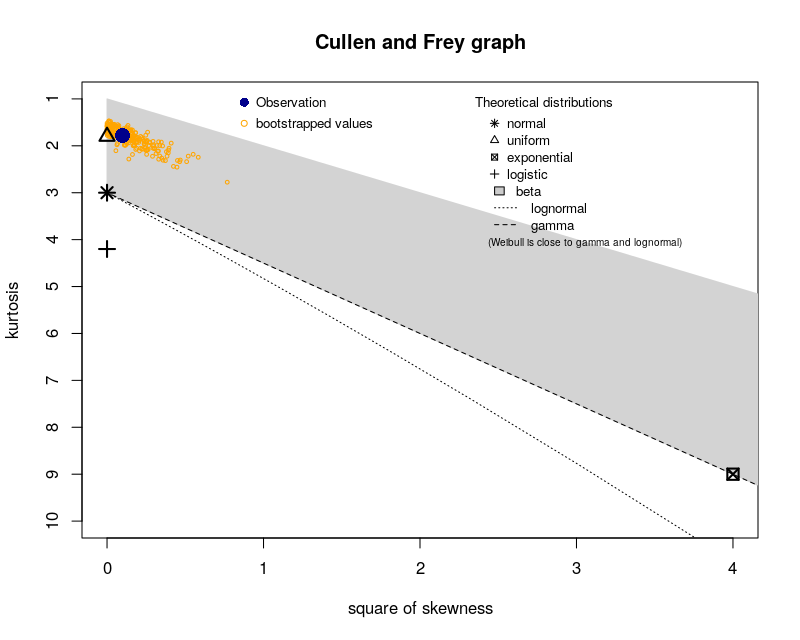

In [27]:
plot_cullenfrey(can.total_tests.dropna(), boot = 250)

##### Quantidade diária de casos

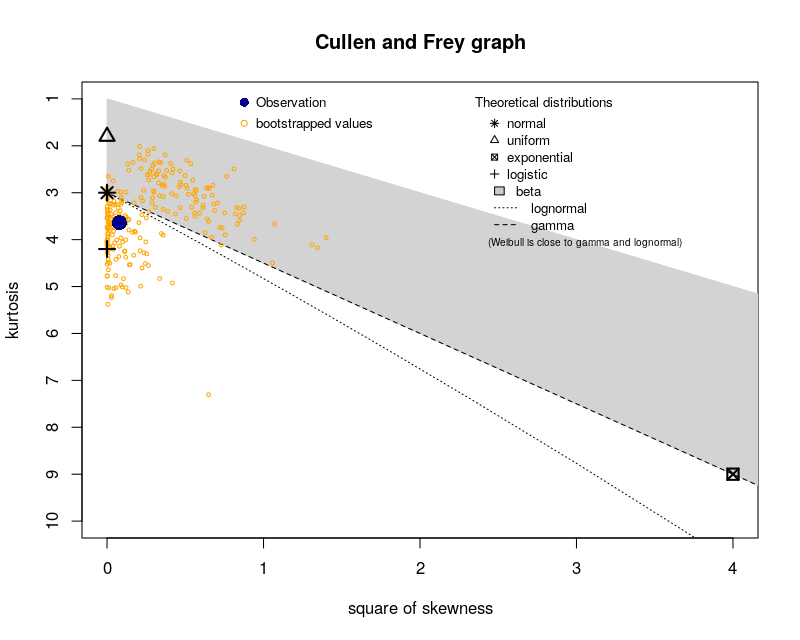

In [28]:
plot_cullenfrey(can.new_cases, boot = 250)

##### Quantidade diária de mortes

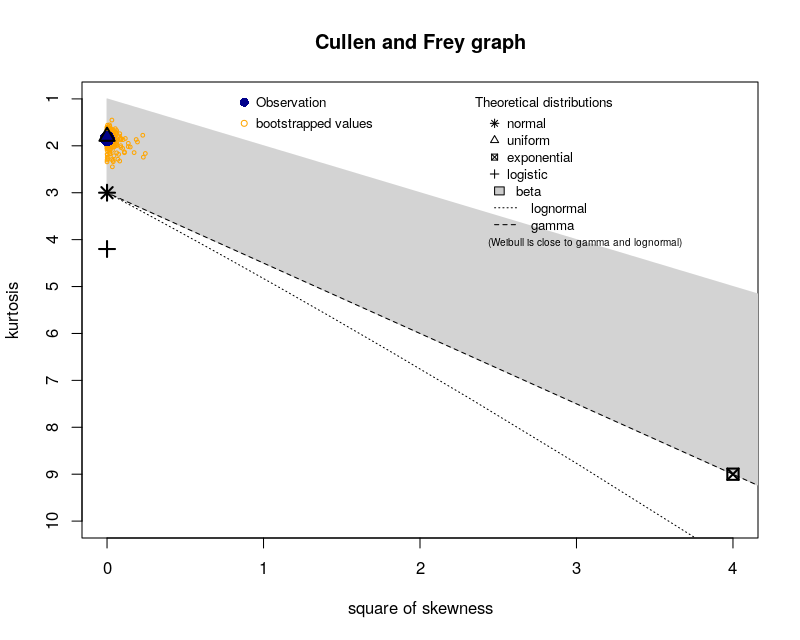

In [29]:
plot_cullenfrey(can.new_deaths, boot = 250)

##### Quantidade diária de testes

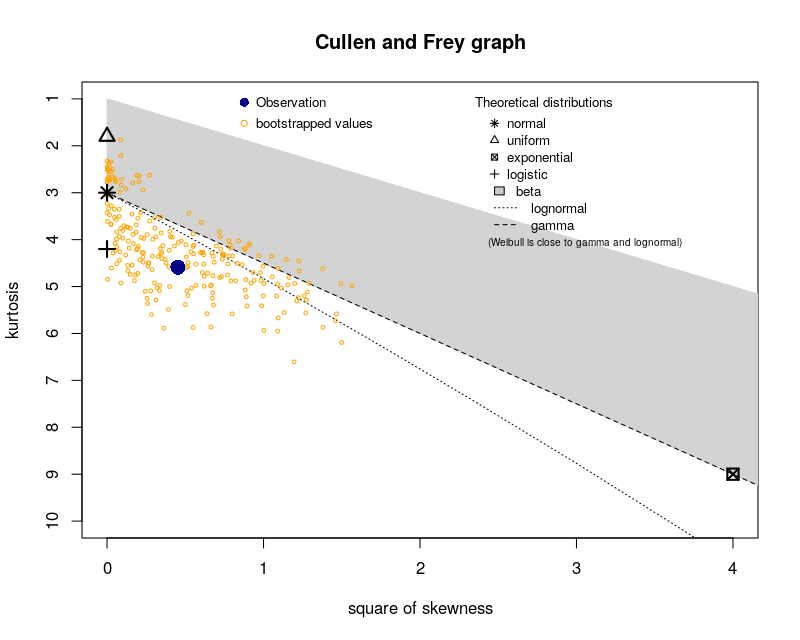

In [30]:
plot_cullenfrey(can.new_tests.dropna(), boot = 250)

### Cuba

#### Total de casos

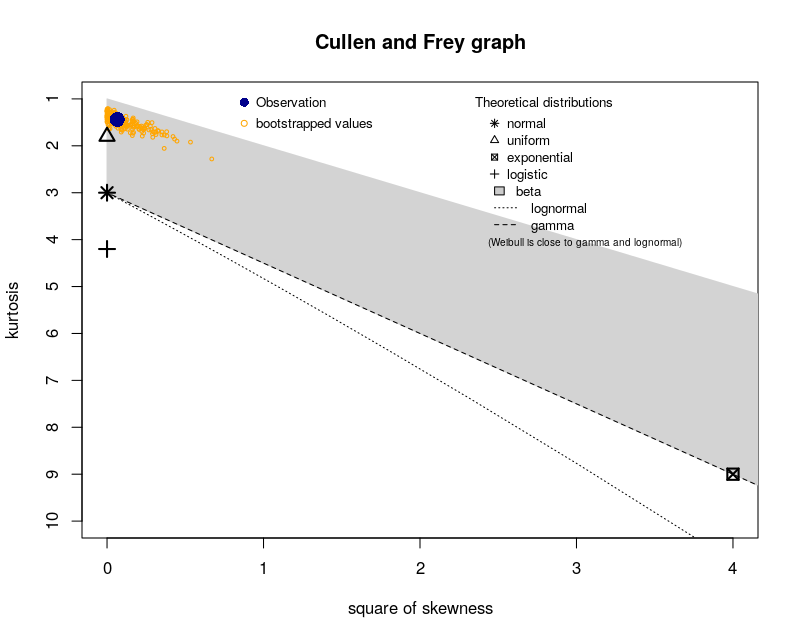

In [31]:
cub = data_owd[data_owd['iso_code'] == 'CUB']
plot_cullenfrey(cub.total_cases, boot = 250)

#### Total de mortes

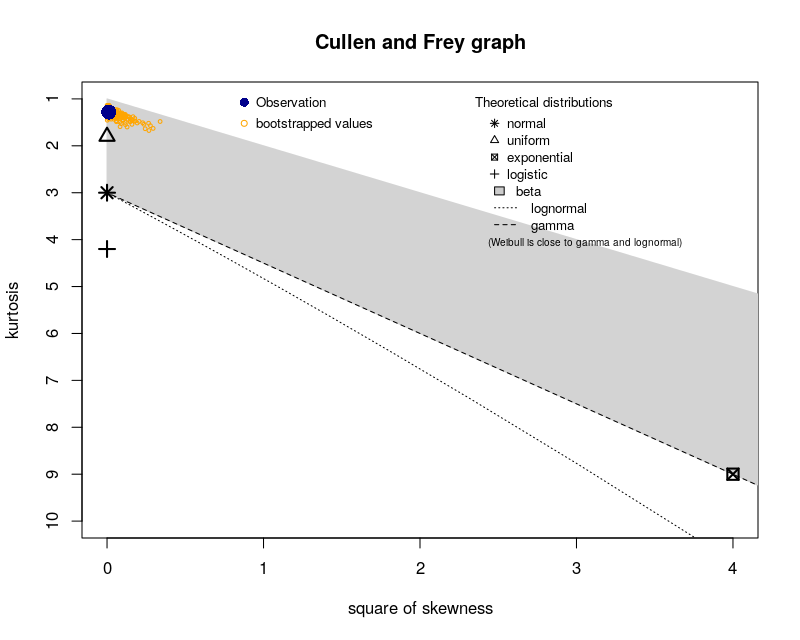

In [32]:
plot_cullenfrey(cub.total_deaths, boot = 250)

#### Total de testes

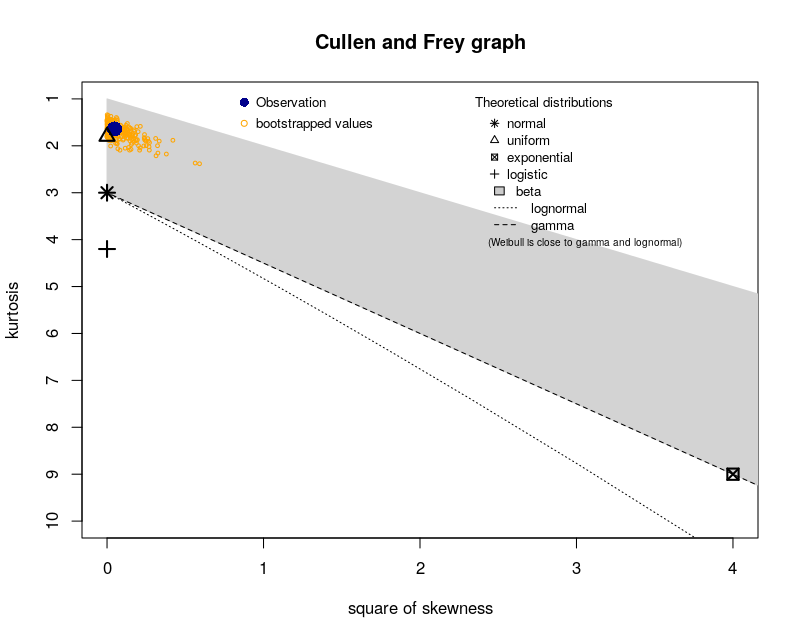

In [33]:
plot_cullenfrey(cub.total_tests.dropna(), boot = 250)

##### Quantidade diária de casos

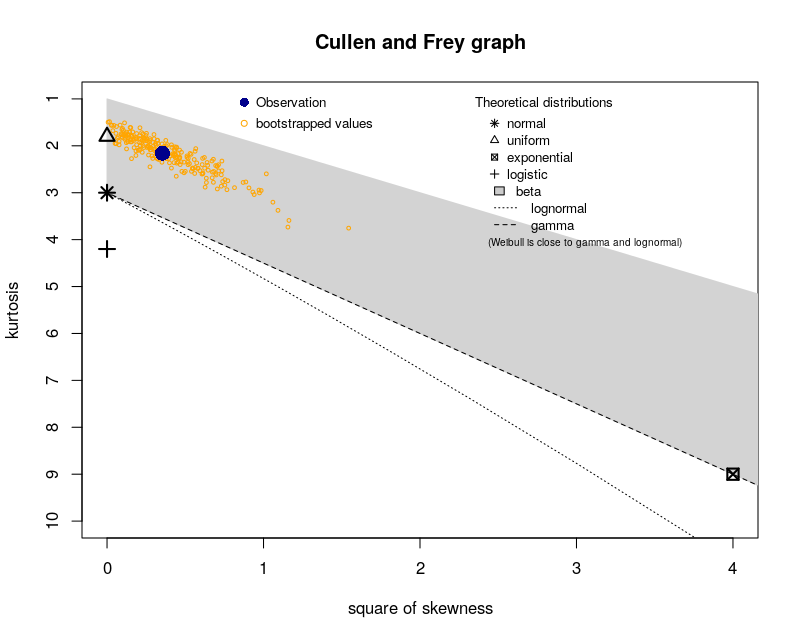

In [34]:
plot_cullenfrey(cub.new_cases, boot = 250)

##### Quantidade diária de mortes

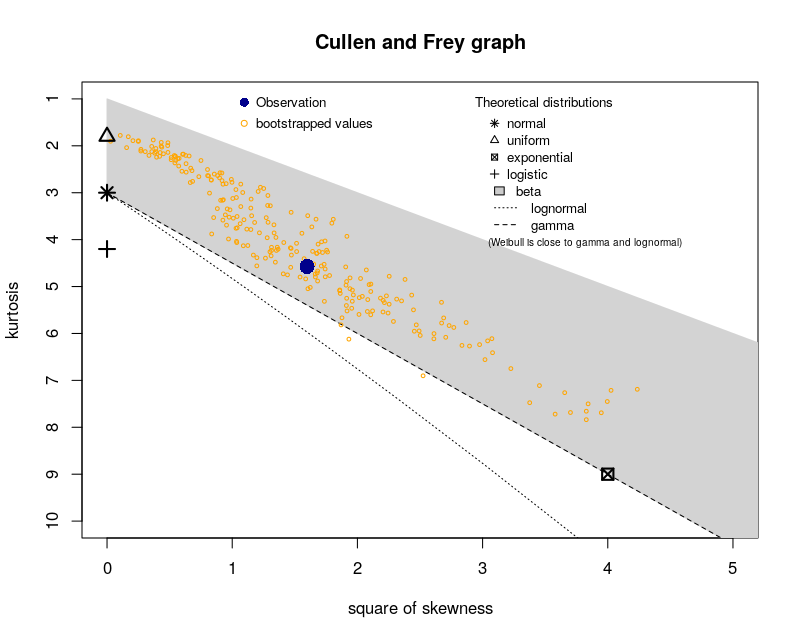

In [35]:
plot_cullenfrey(cub.new_deaths, boot = 250)

##### Quantidade diária de testes

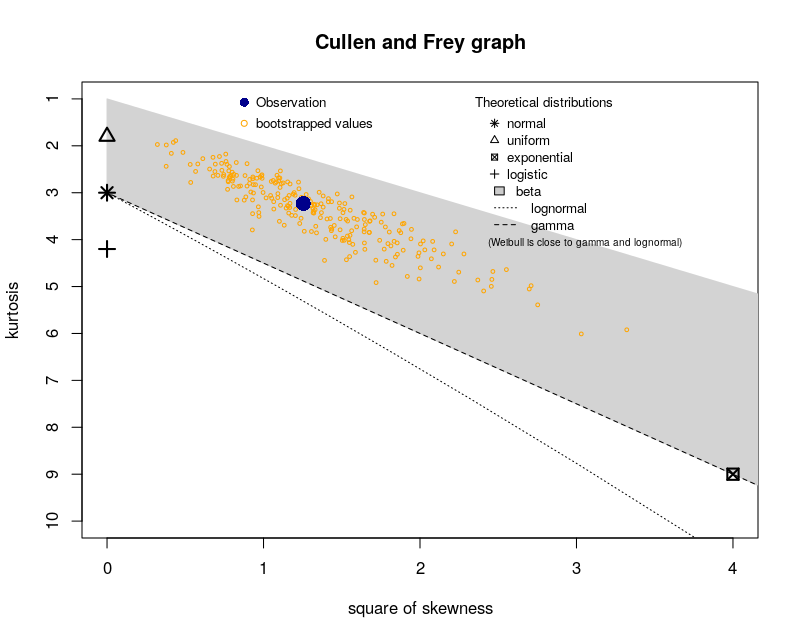

In [36]:
plot_cullenfrey(cub.new_tests.dropna(), boot = 250)

### México
#### Total de casos

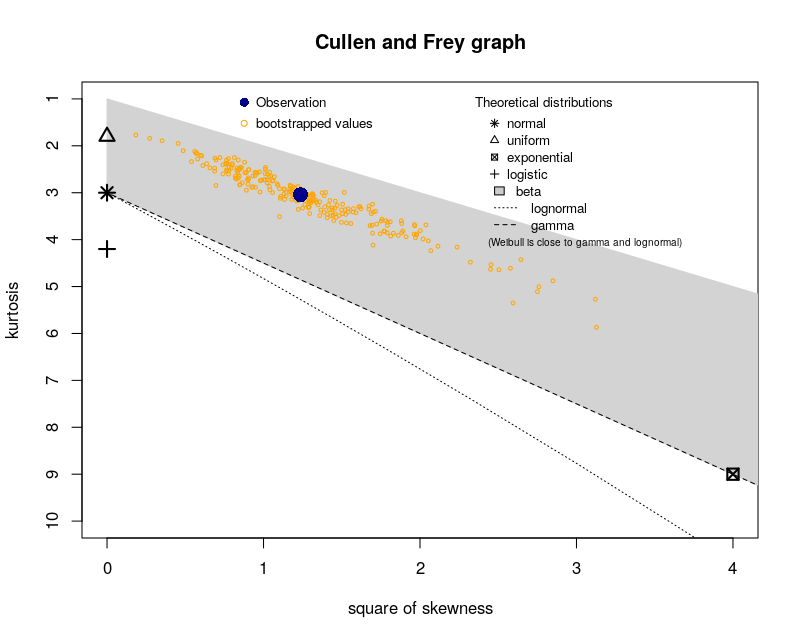

In [37]:
mex = data_owd[data_owd['iso_code'] == 'MEX']
plot_cullenfrey(mex.total_cases, boot = 250)

#### Total de mortes

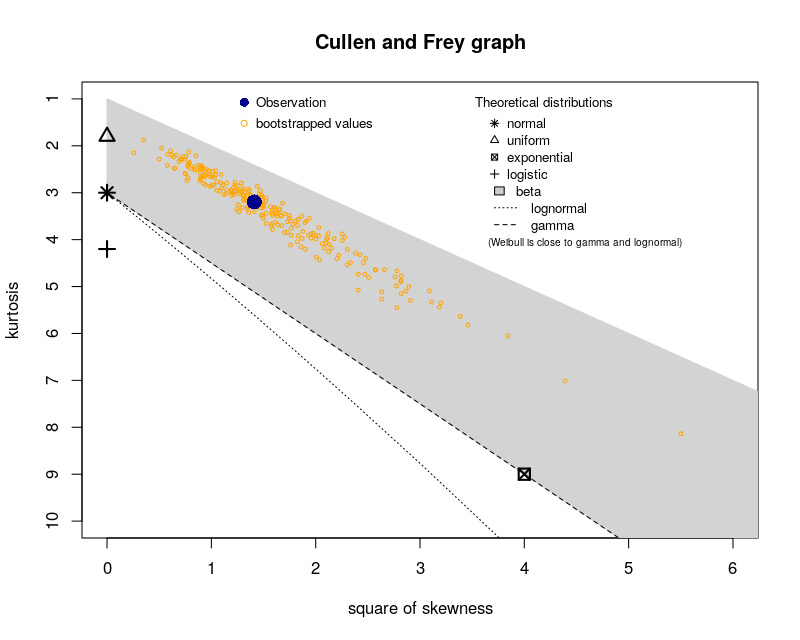

In [38]:
plot_cullenfrey(mex.total_deaths, boot = 250)

#### Total de testes

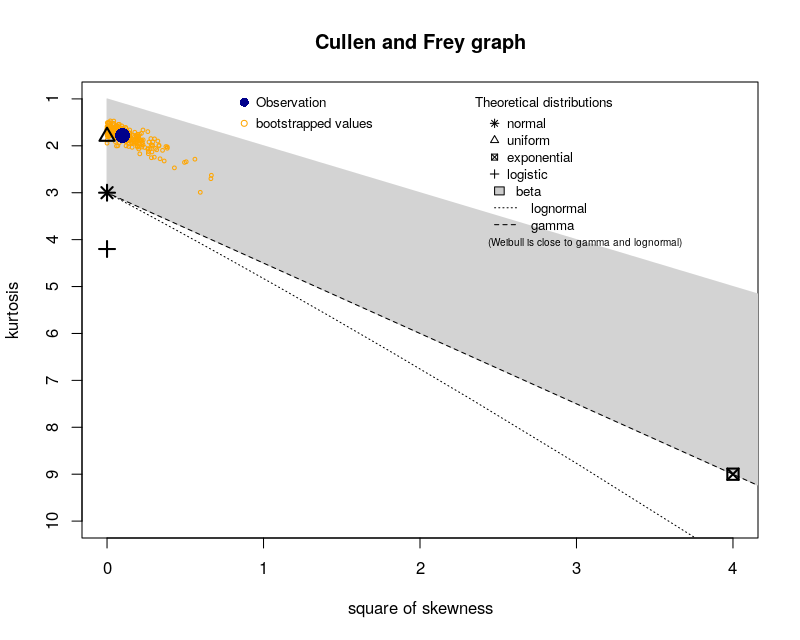

In [39]:
plot_cullenfrey(can.total_tests.dropna(), boot = 250)

##### Quantidade diária de casos

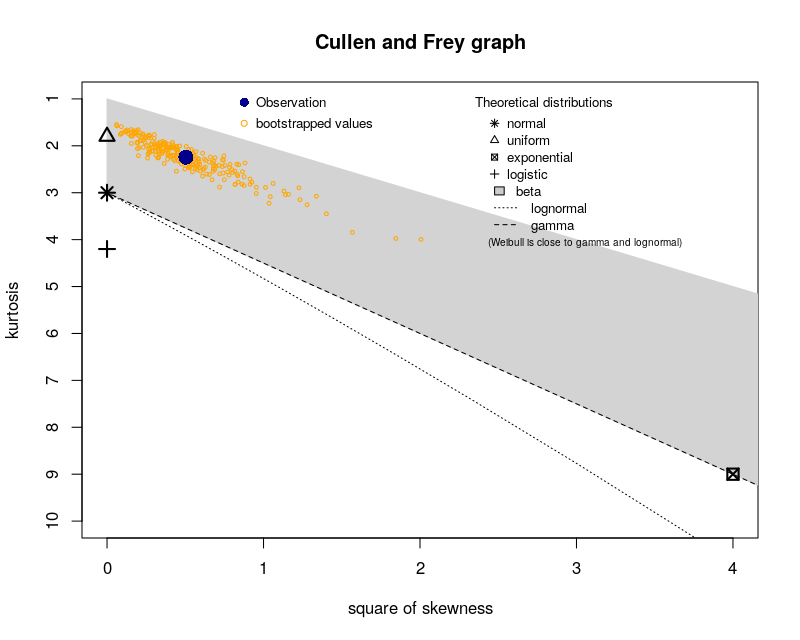

In [40]:
plot_cullenfrey(mex.new_cases, boot = 250)

##### Quantidade diária de mortes

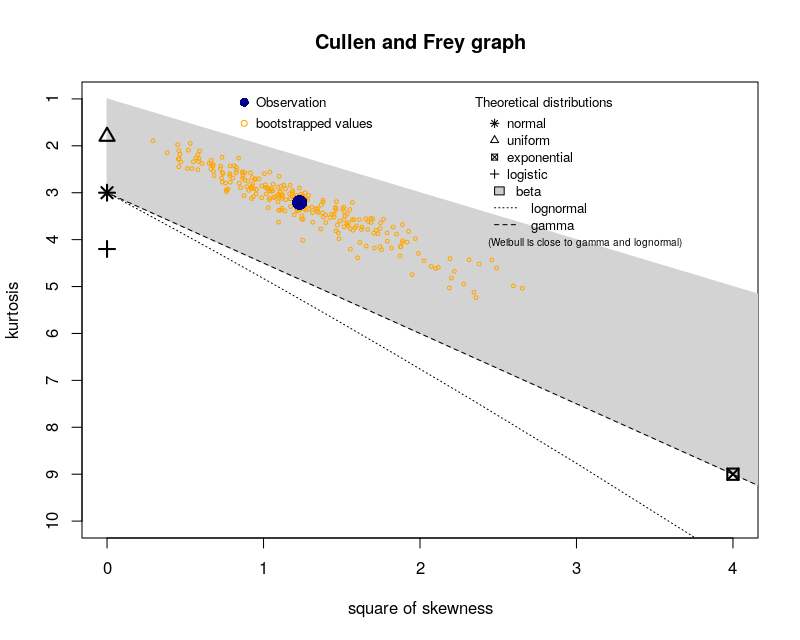

In [41]:
plot_cullenfrey(mex.new_deaths, boot = 250)

##### Quantidade diária de testes

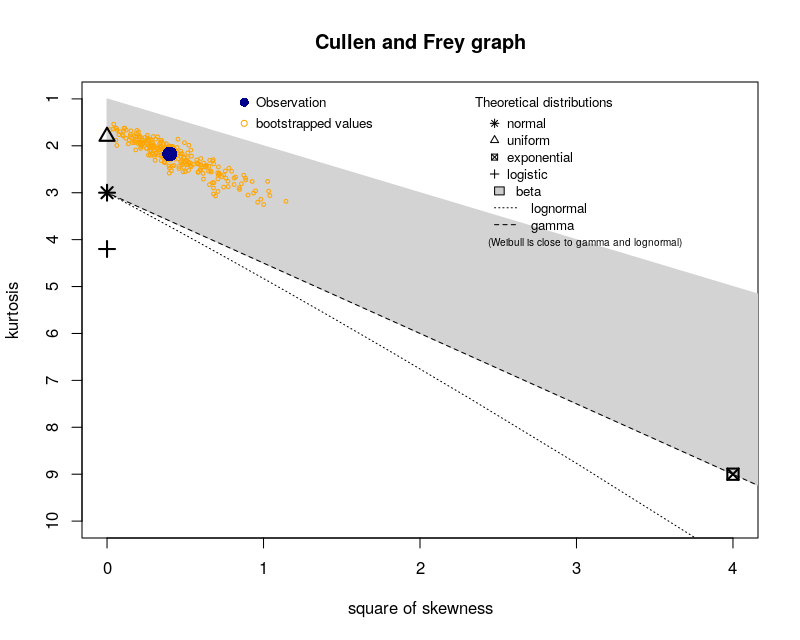

In [42]:
plot_cullenfrey(mex.new_tests.dropna(), boot = 250)

### Rússia

#### Total de casos

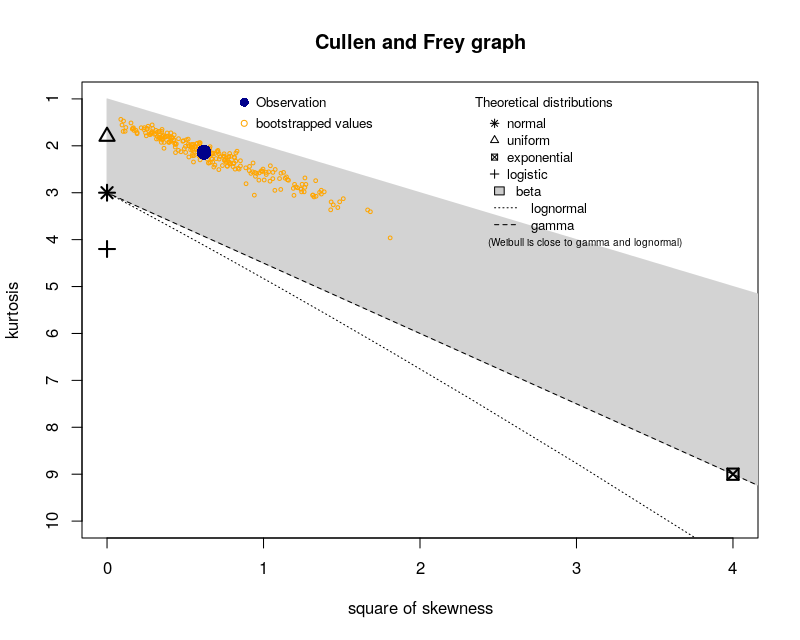

In [43]:
rus = data_owd[data_owd['iso_code'] == 'RUS']
plot_cullenfrey(rus.total_cases, boot = 250)

#### Total de mortes

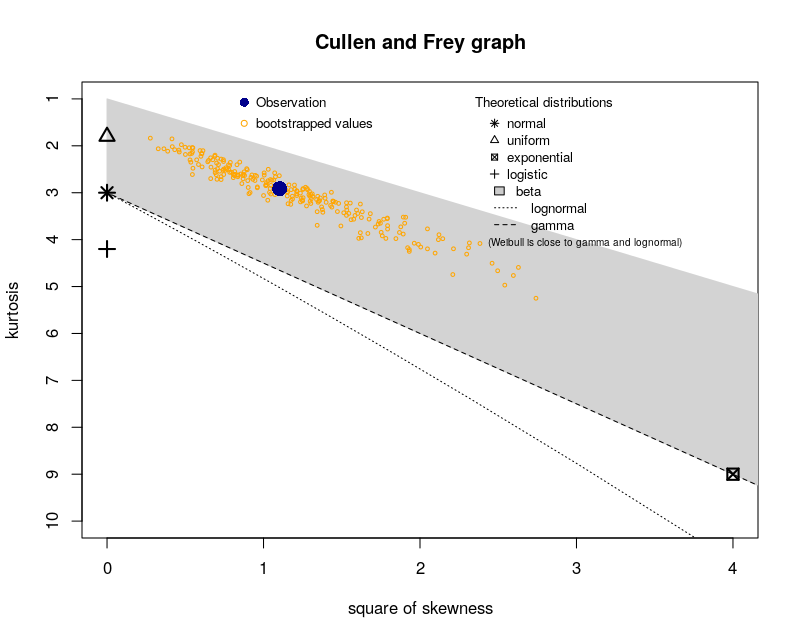

In [44]:
plot_cullenfrey(rus.total_deaths, boot = 250)

#### Total de testes

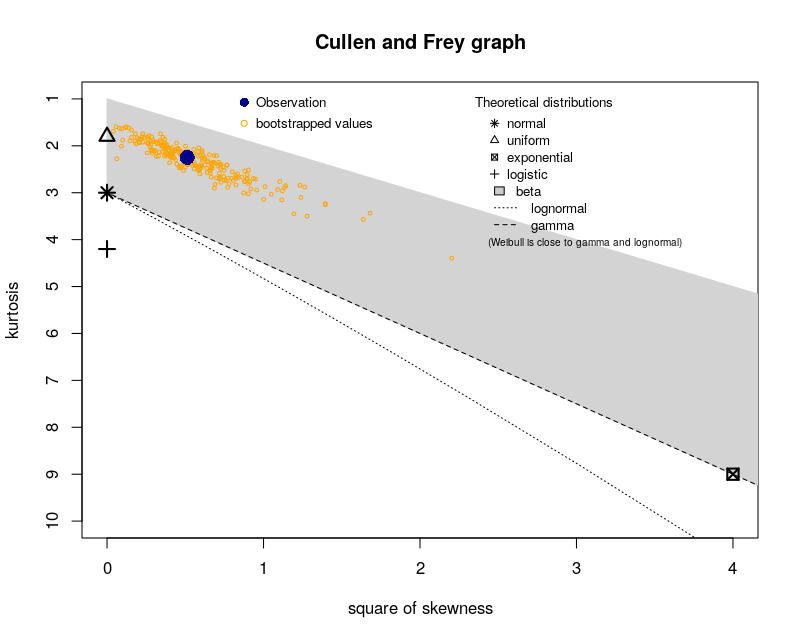

In [45]:
plot_cullenfrey(rus.total_tests.dropna(), boot = 250)

##### Quantidade diária de casos

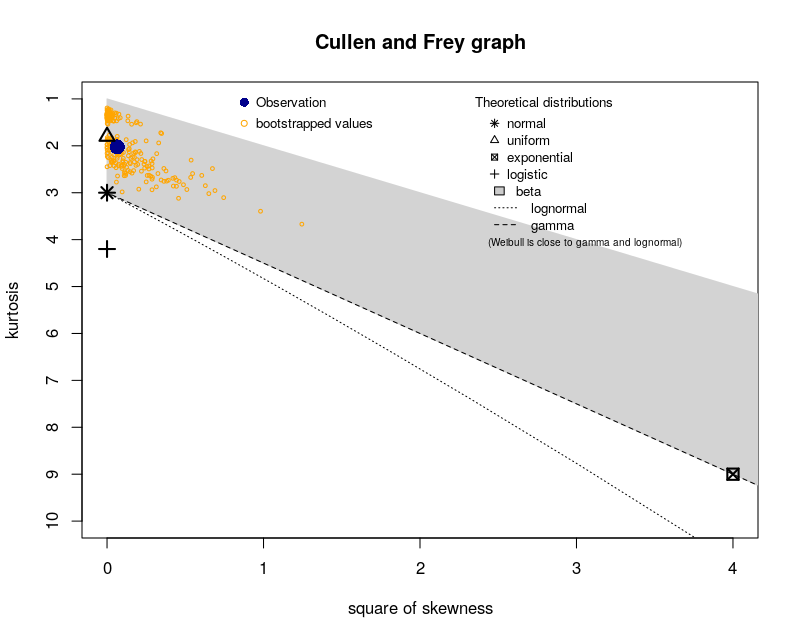

In [46]:
plot_cullenfrey(rus.new_cases, boot = 250)

##### Quantidade diária de mortes

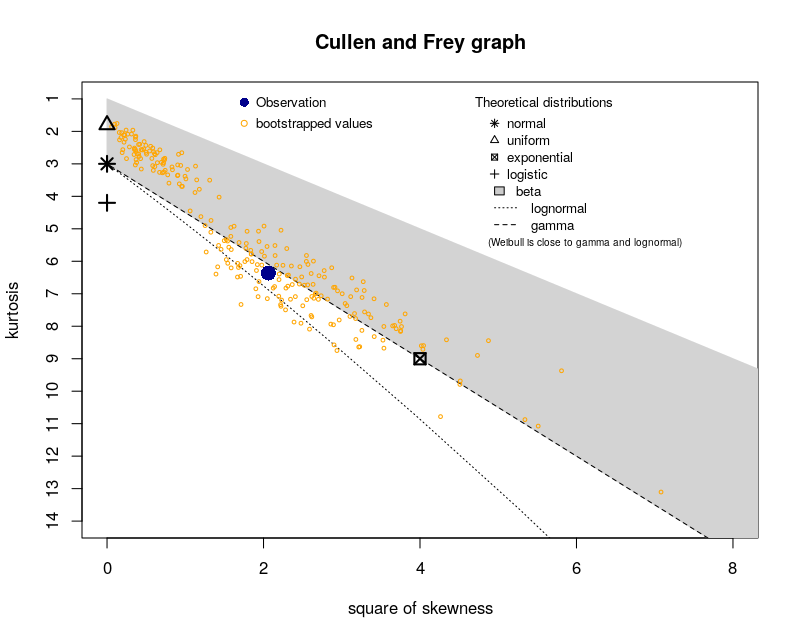

In [47]:
plot_cullenfrey(rus.new_deaths, boot = 250)

##### Quantidade diária de testes

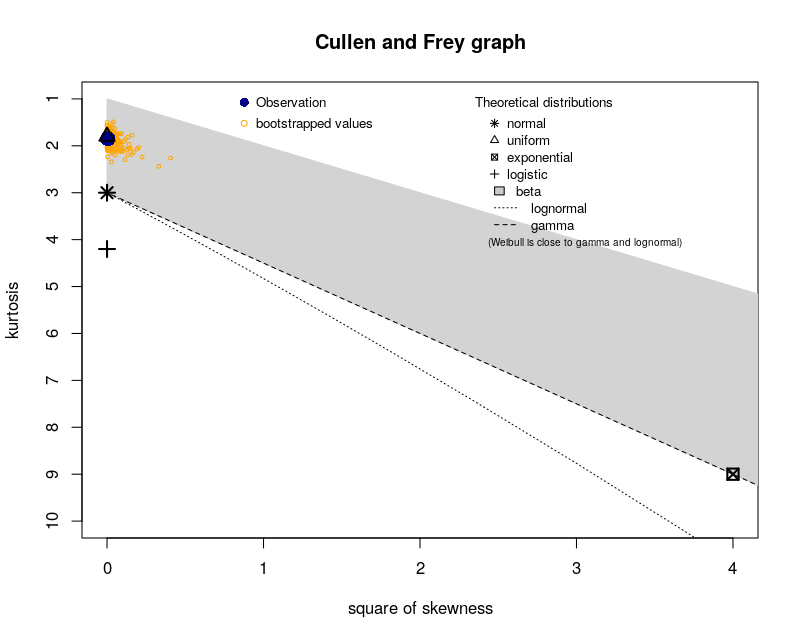

In [48]:
plot_cullenfrey(rus.new_tests.dropna(), boot = 250)

#### Função Densidade de Probabilidade (PDF)

Com a classificação estatística no espaço de Cullen-Frey realizada, agora, para cada país e suas variáveis é feita o ajuste de uma PDF. Nesta atividade, da mesma forma que foi feito com os histogramas, faz-se a normalização dos dados, para que as diferentes escalas não atrapalhem a visualização das tendências assuminadas pelos dados.

Para a geração dos gráficos, a função auxiliar `plot_density_bycountry` foi criada, esta normaliza, agrupa e faz o *plot* dos dados.

In [49]:
def plot_density_bycountry(data, column, title, fillby , x_lab, y_lab): 
    _data = standardize_bycountry(data, column)
    
    return (
        ggplot(_data, aes(x = column, fill = fillby)) 
            + geom_histogram(aes(y = "..density.."))
            + geom_density(alpha = .2)
            + ggtitle(title)
            + xlab(x_lab) + ylab(y_lab)
            + facet_wrap('~iso_code', labeller = labelerfnc)
            + labs(fill='Países')
            + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
    )

##### Variáveis sem flutuação diária

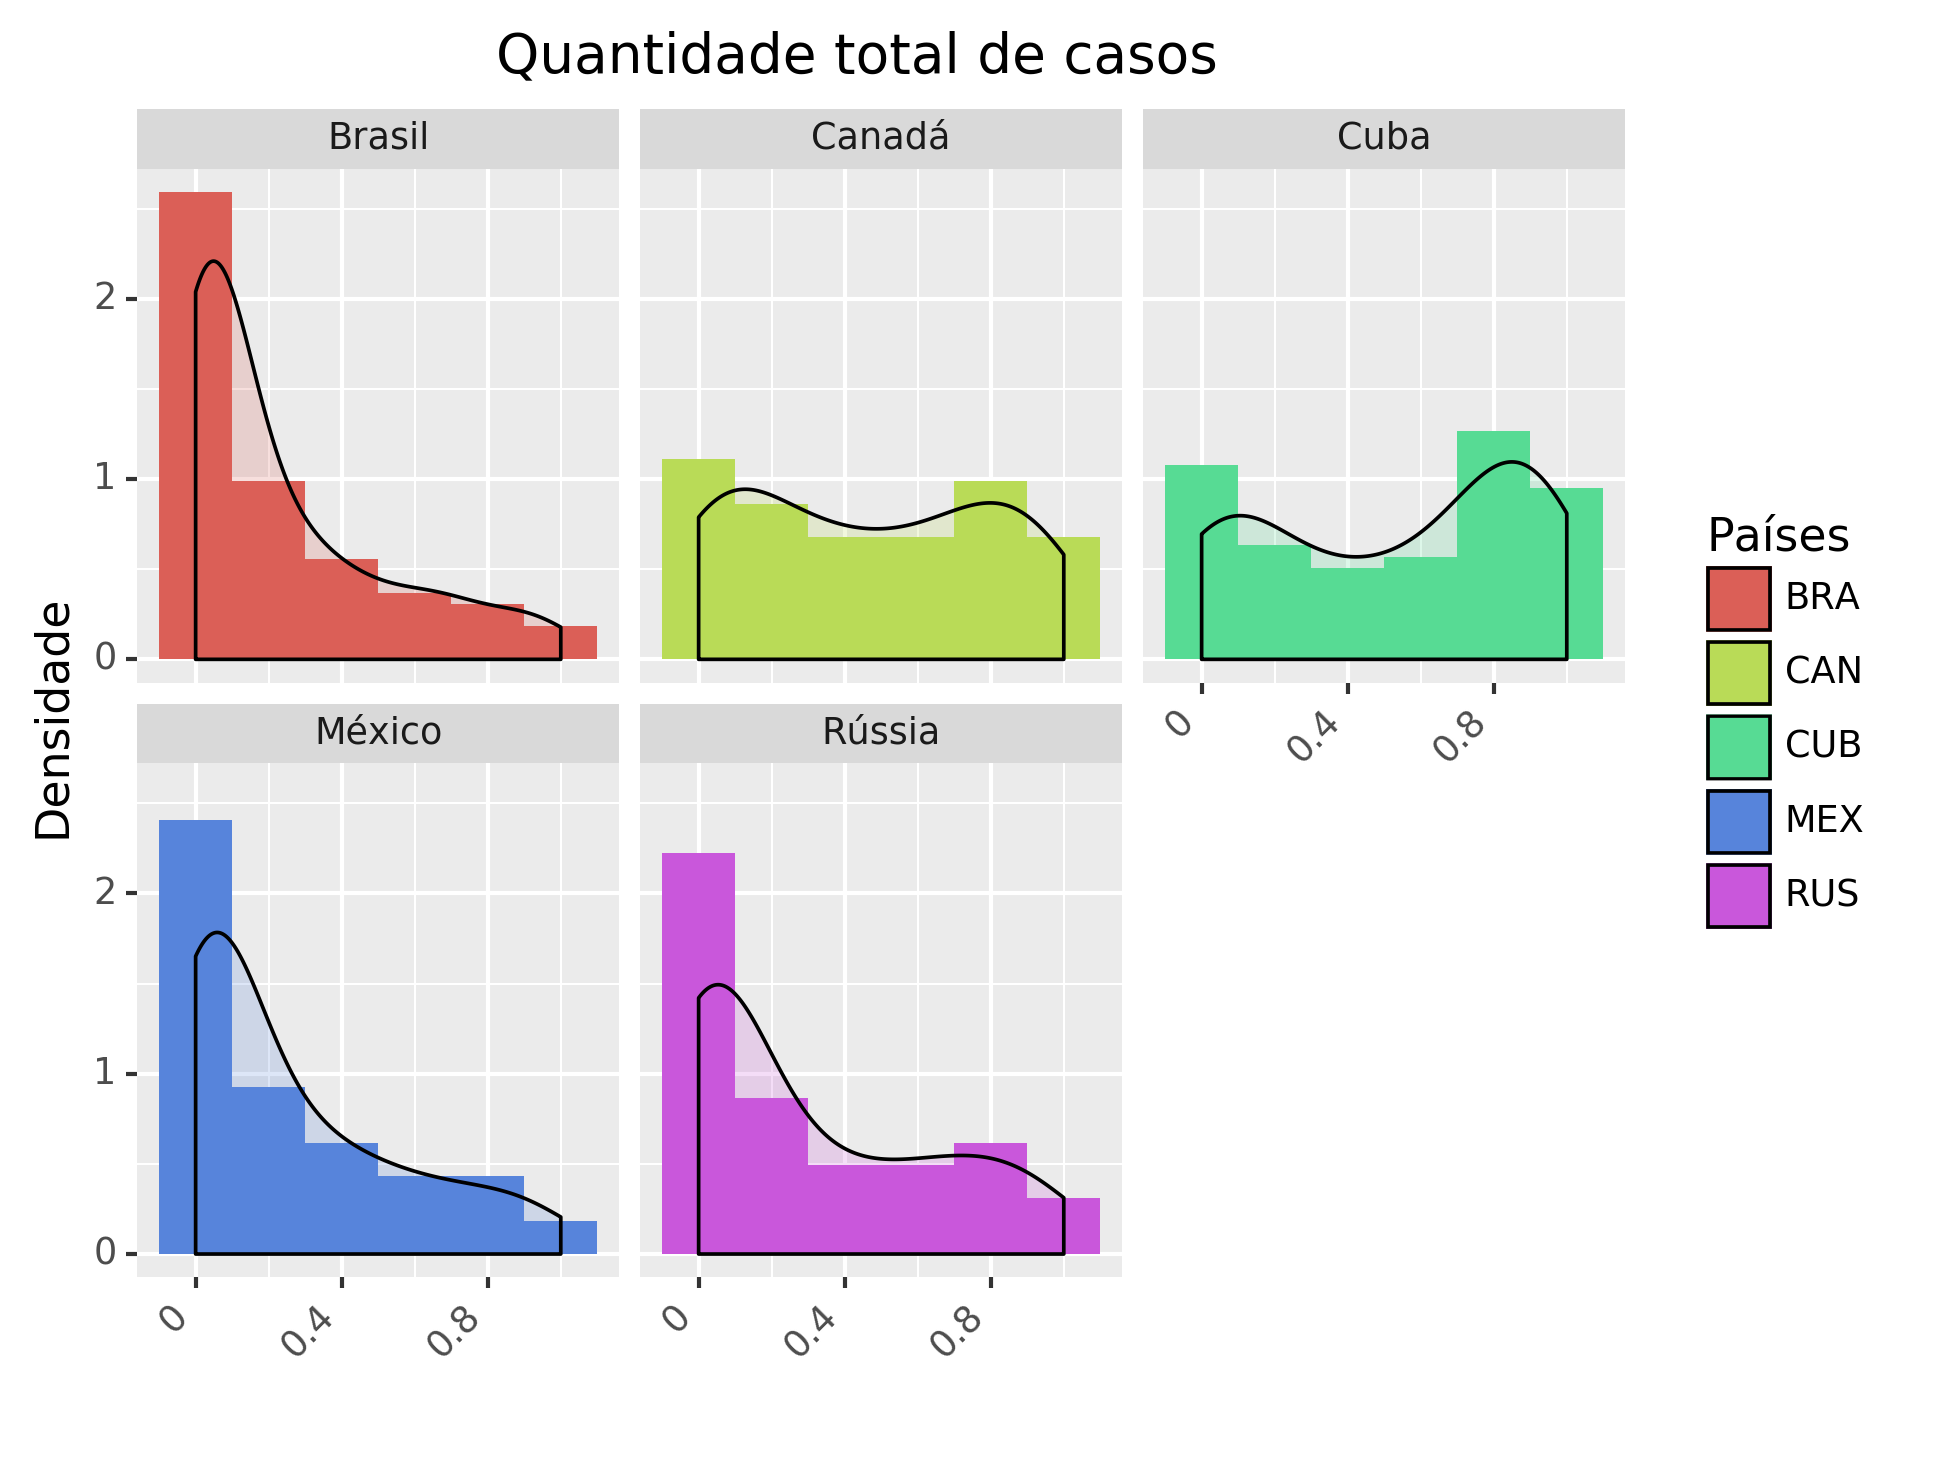

<ggplot: (-9223363263024976075)>

In [50]:
plot_density_bycountry(data_owd, 'total_cases', 'Quantidade total de casos' ,'iso_code', ' ', 'Densidade')

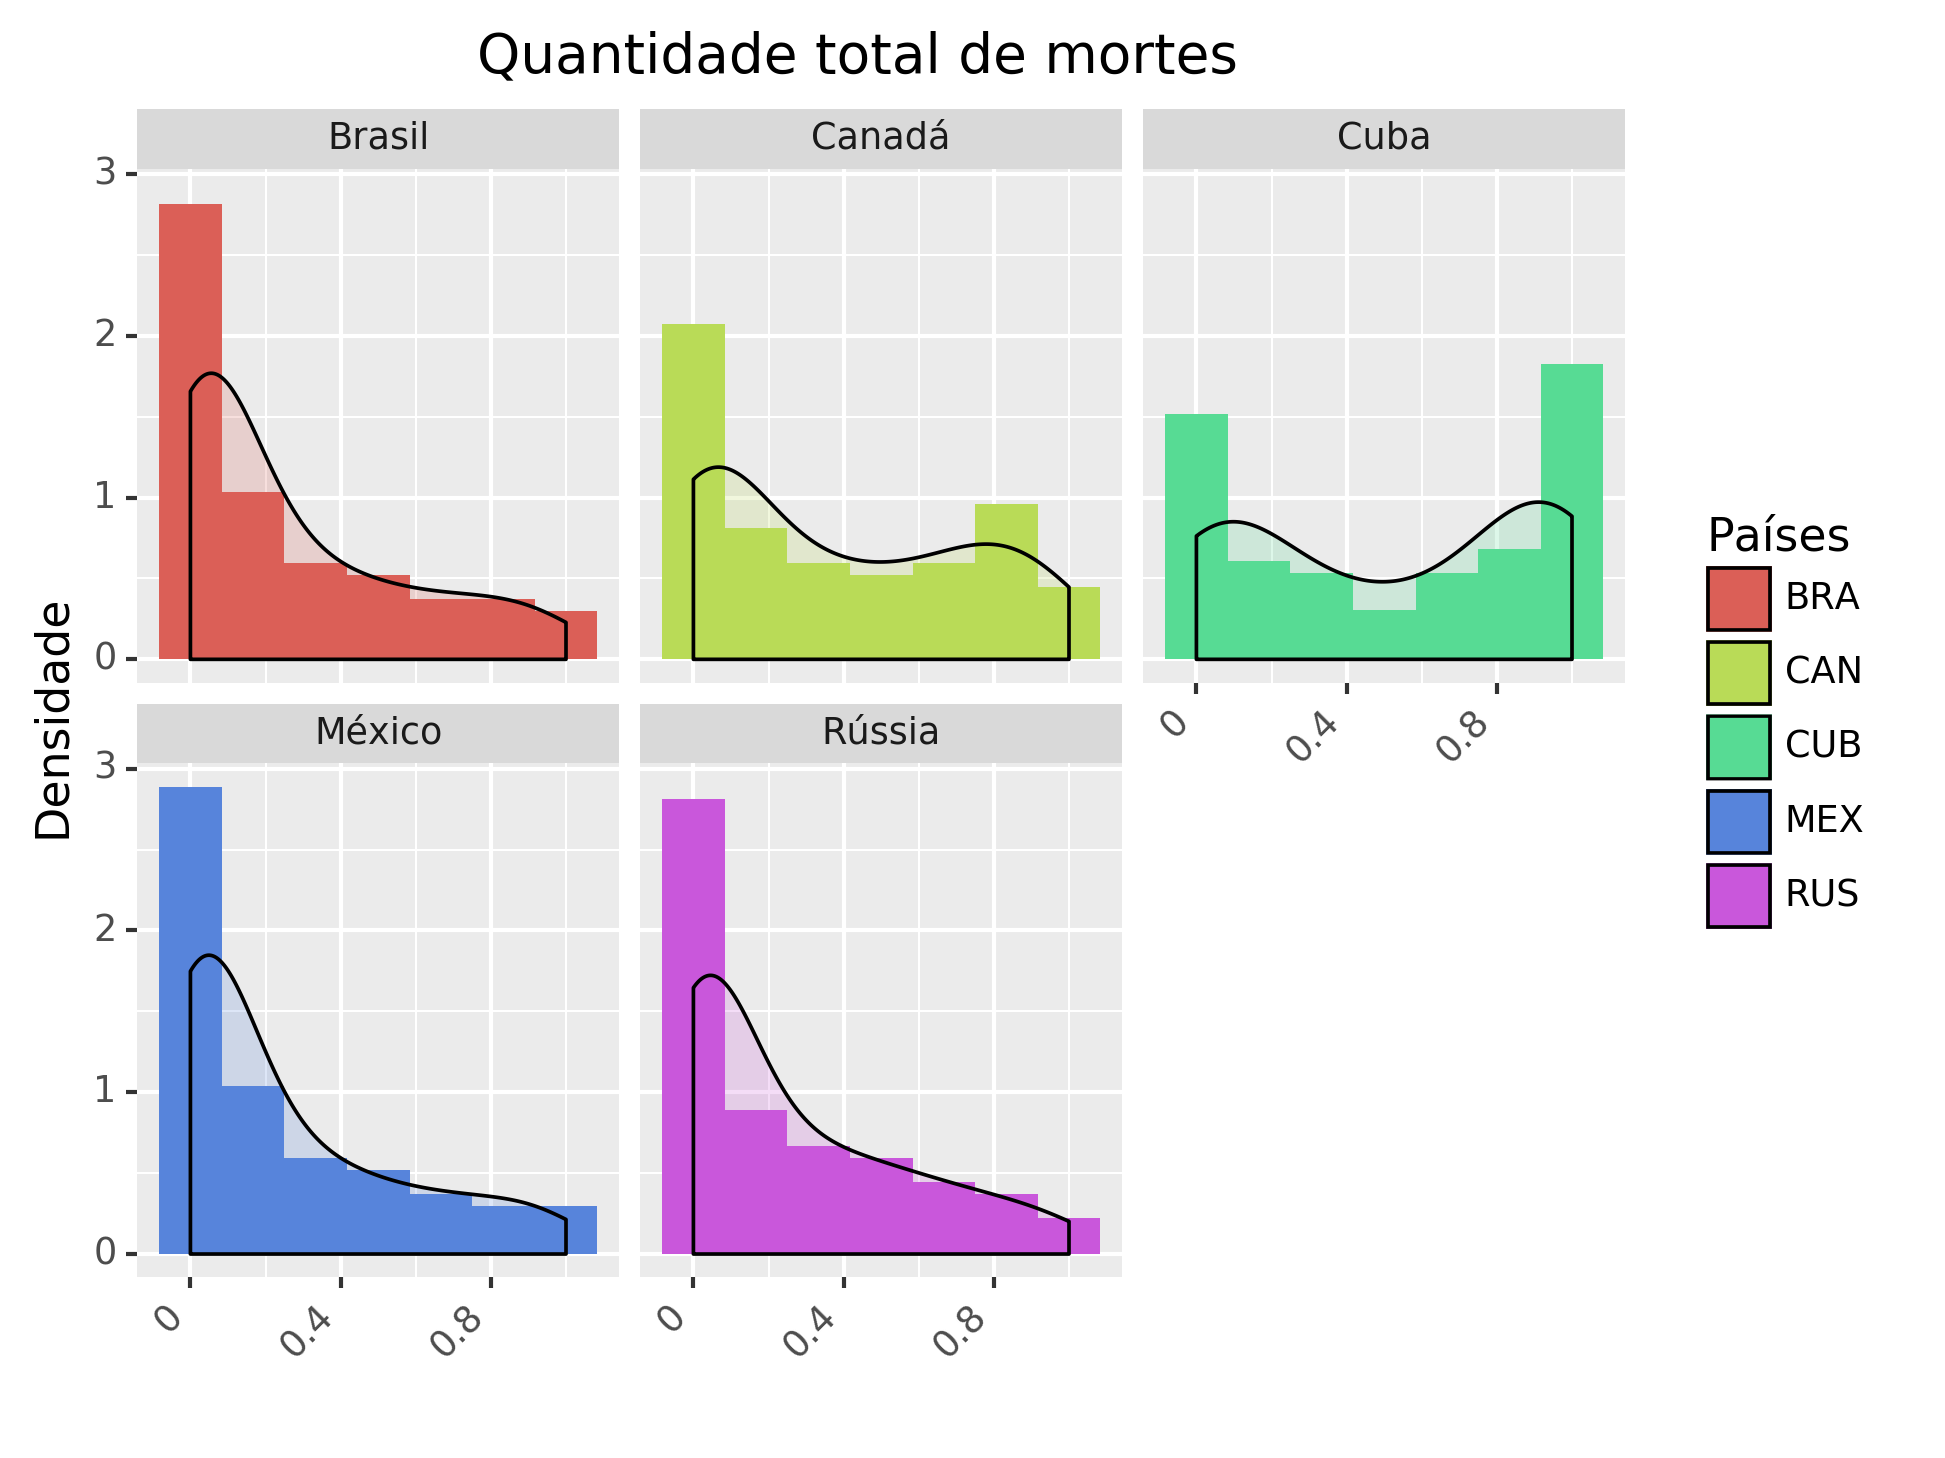

<ggplot: (-9223363263011474530)>

In [51]:
plot_density_bycountry(data_owd, 'total_deaths', 'Quantidade total de mortes' ,'iso_code', ' ', 'Densidade')

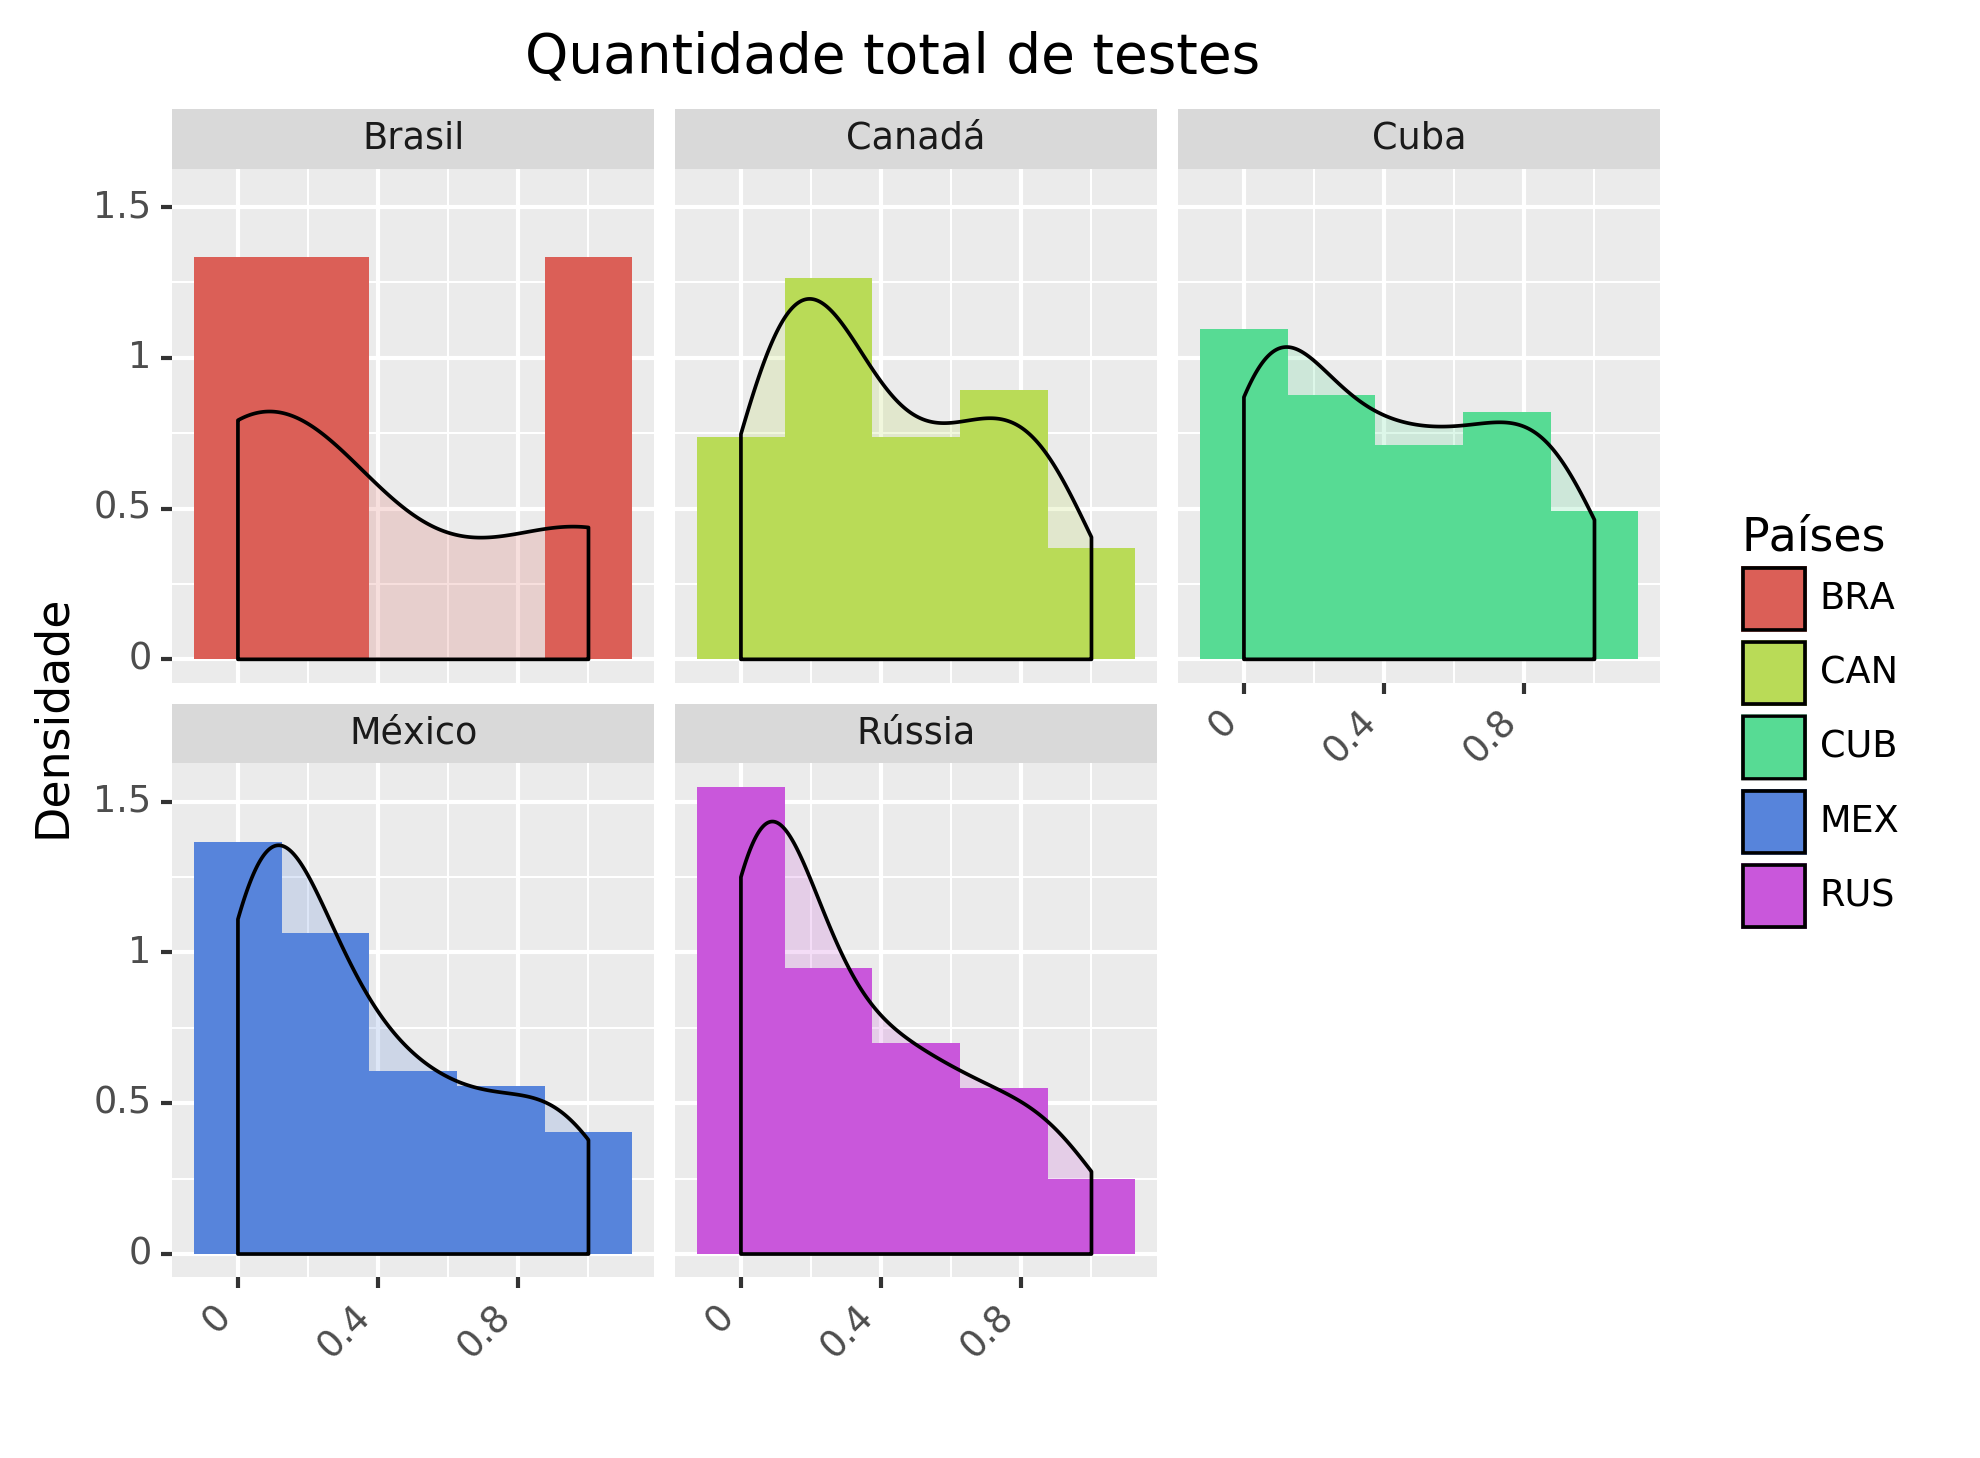

<ggplot: (-9223363263011152661)>

In [52]:
plot_density_bycountry(data_owd, 'total_tests', 'Quantidade total de testes' ,'iso_code', ' ', 'Densidade')

##### Variáveis com flutuação diária

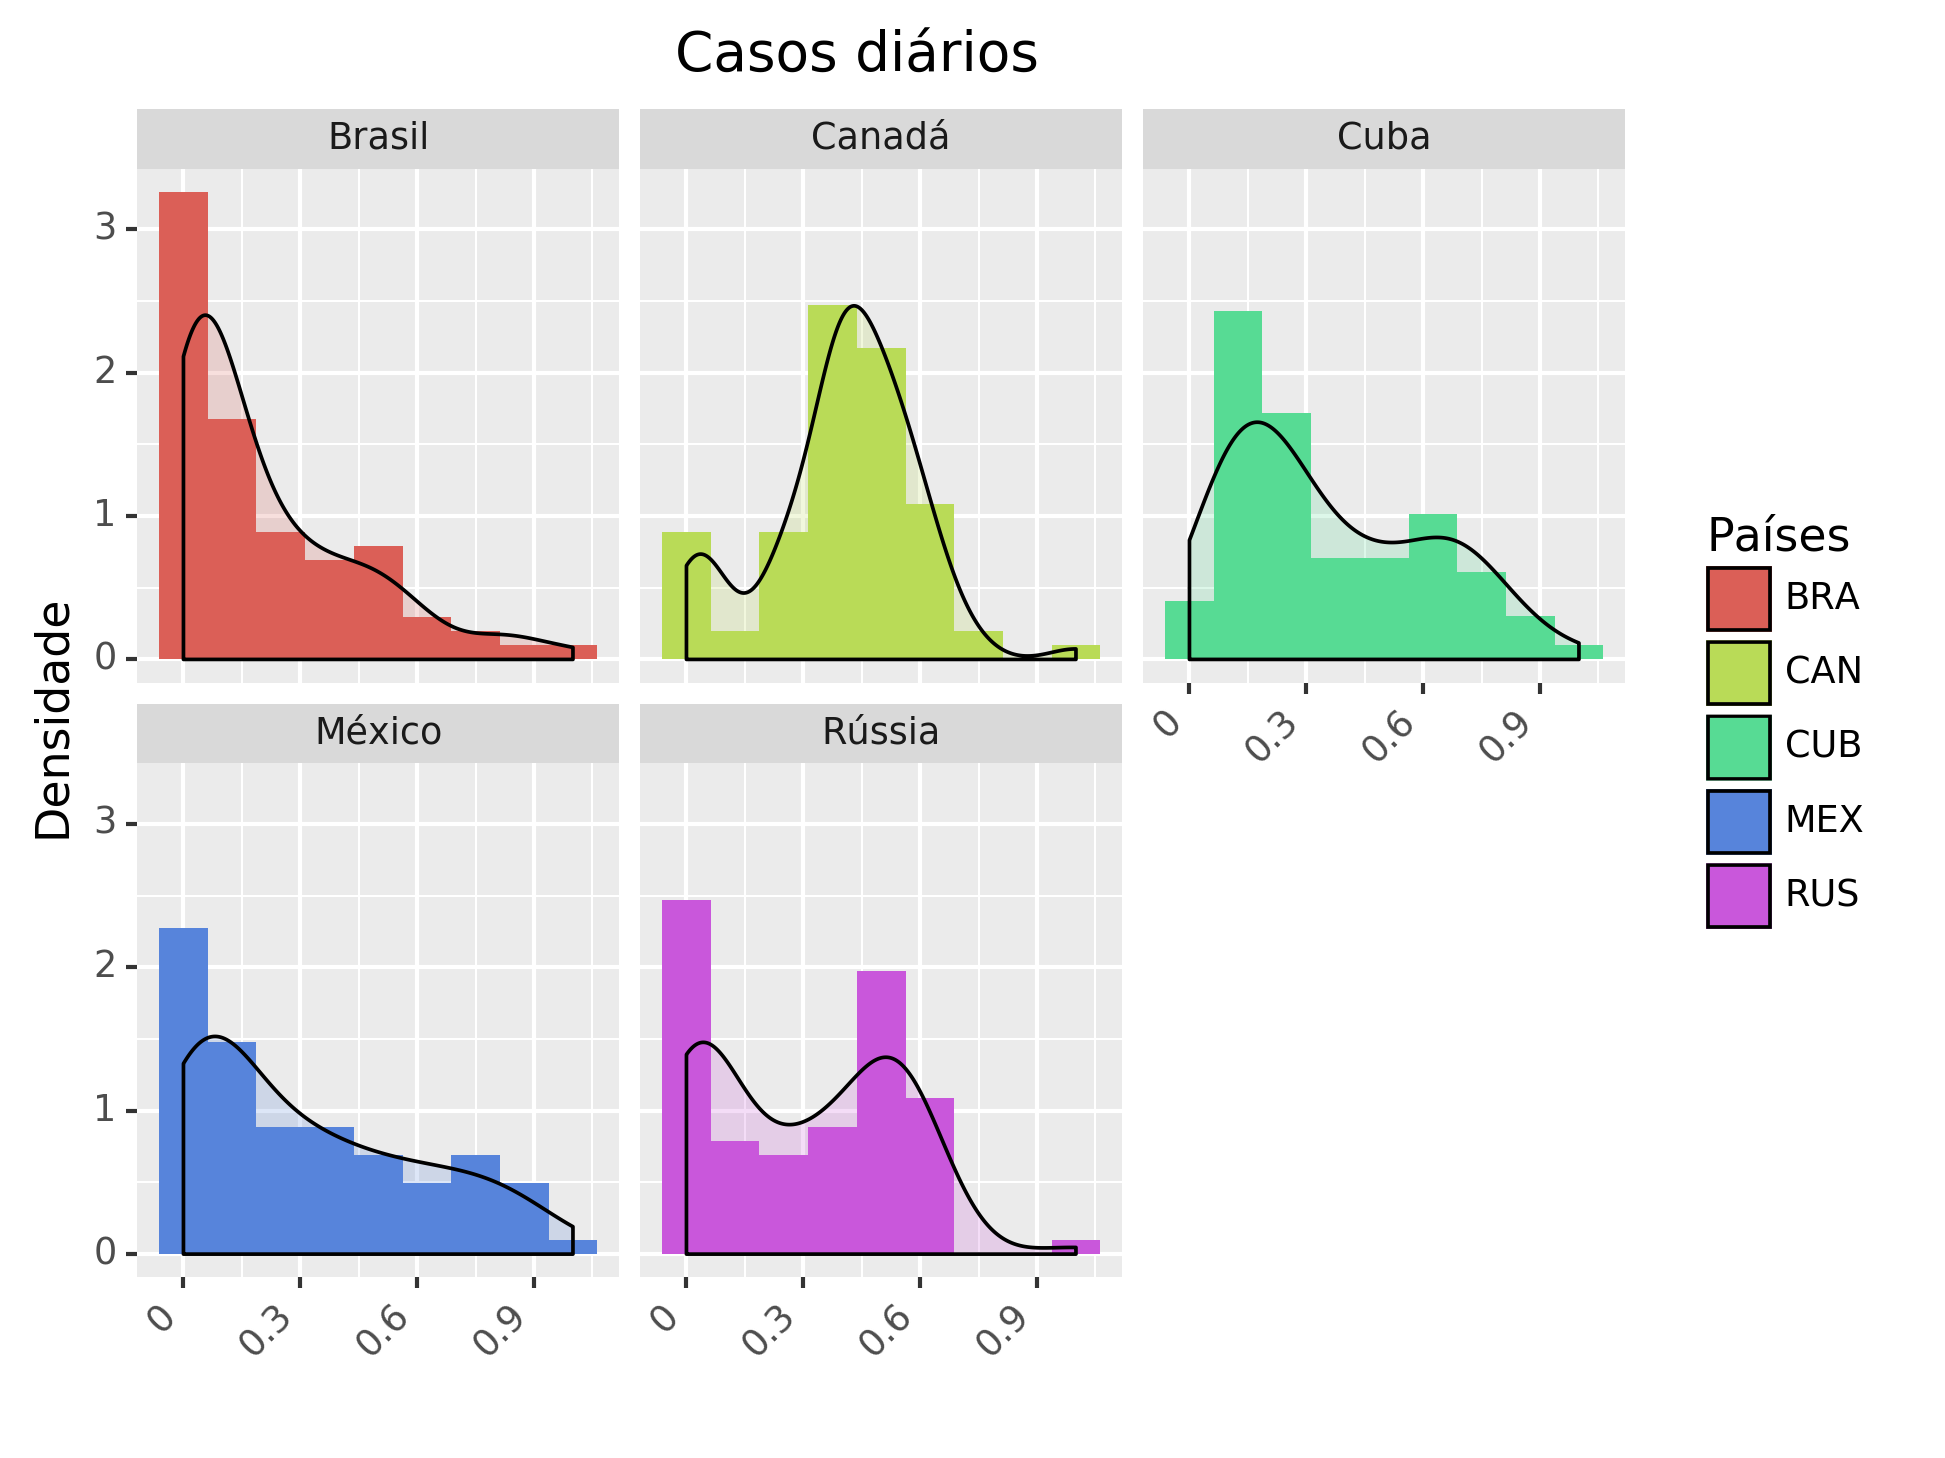

<ggplot: (8773840353337)>

In [53]:
plot_density_bycountry(data_owd, 'new_cases', 'Casos diários' ,'iso_code', ' ', 'Densidade')

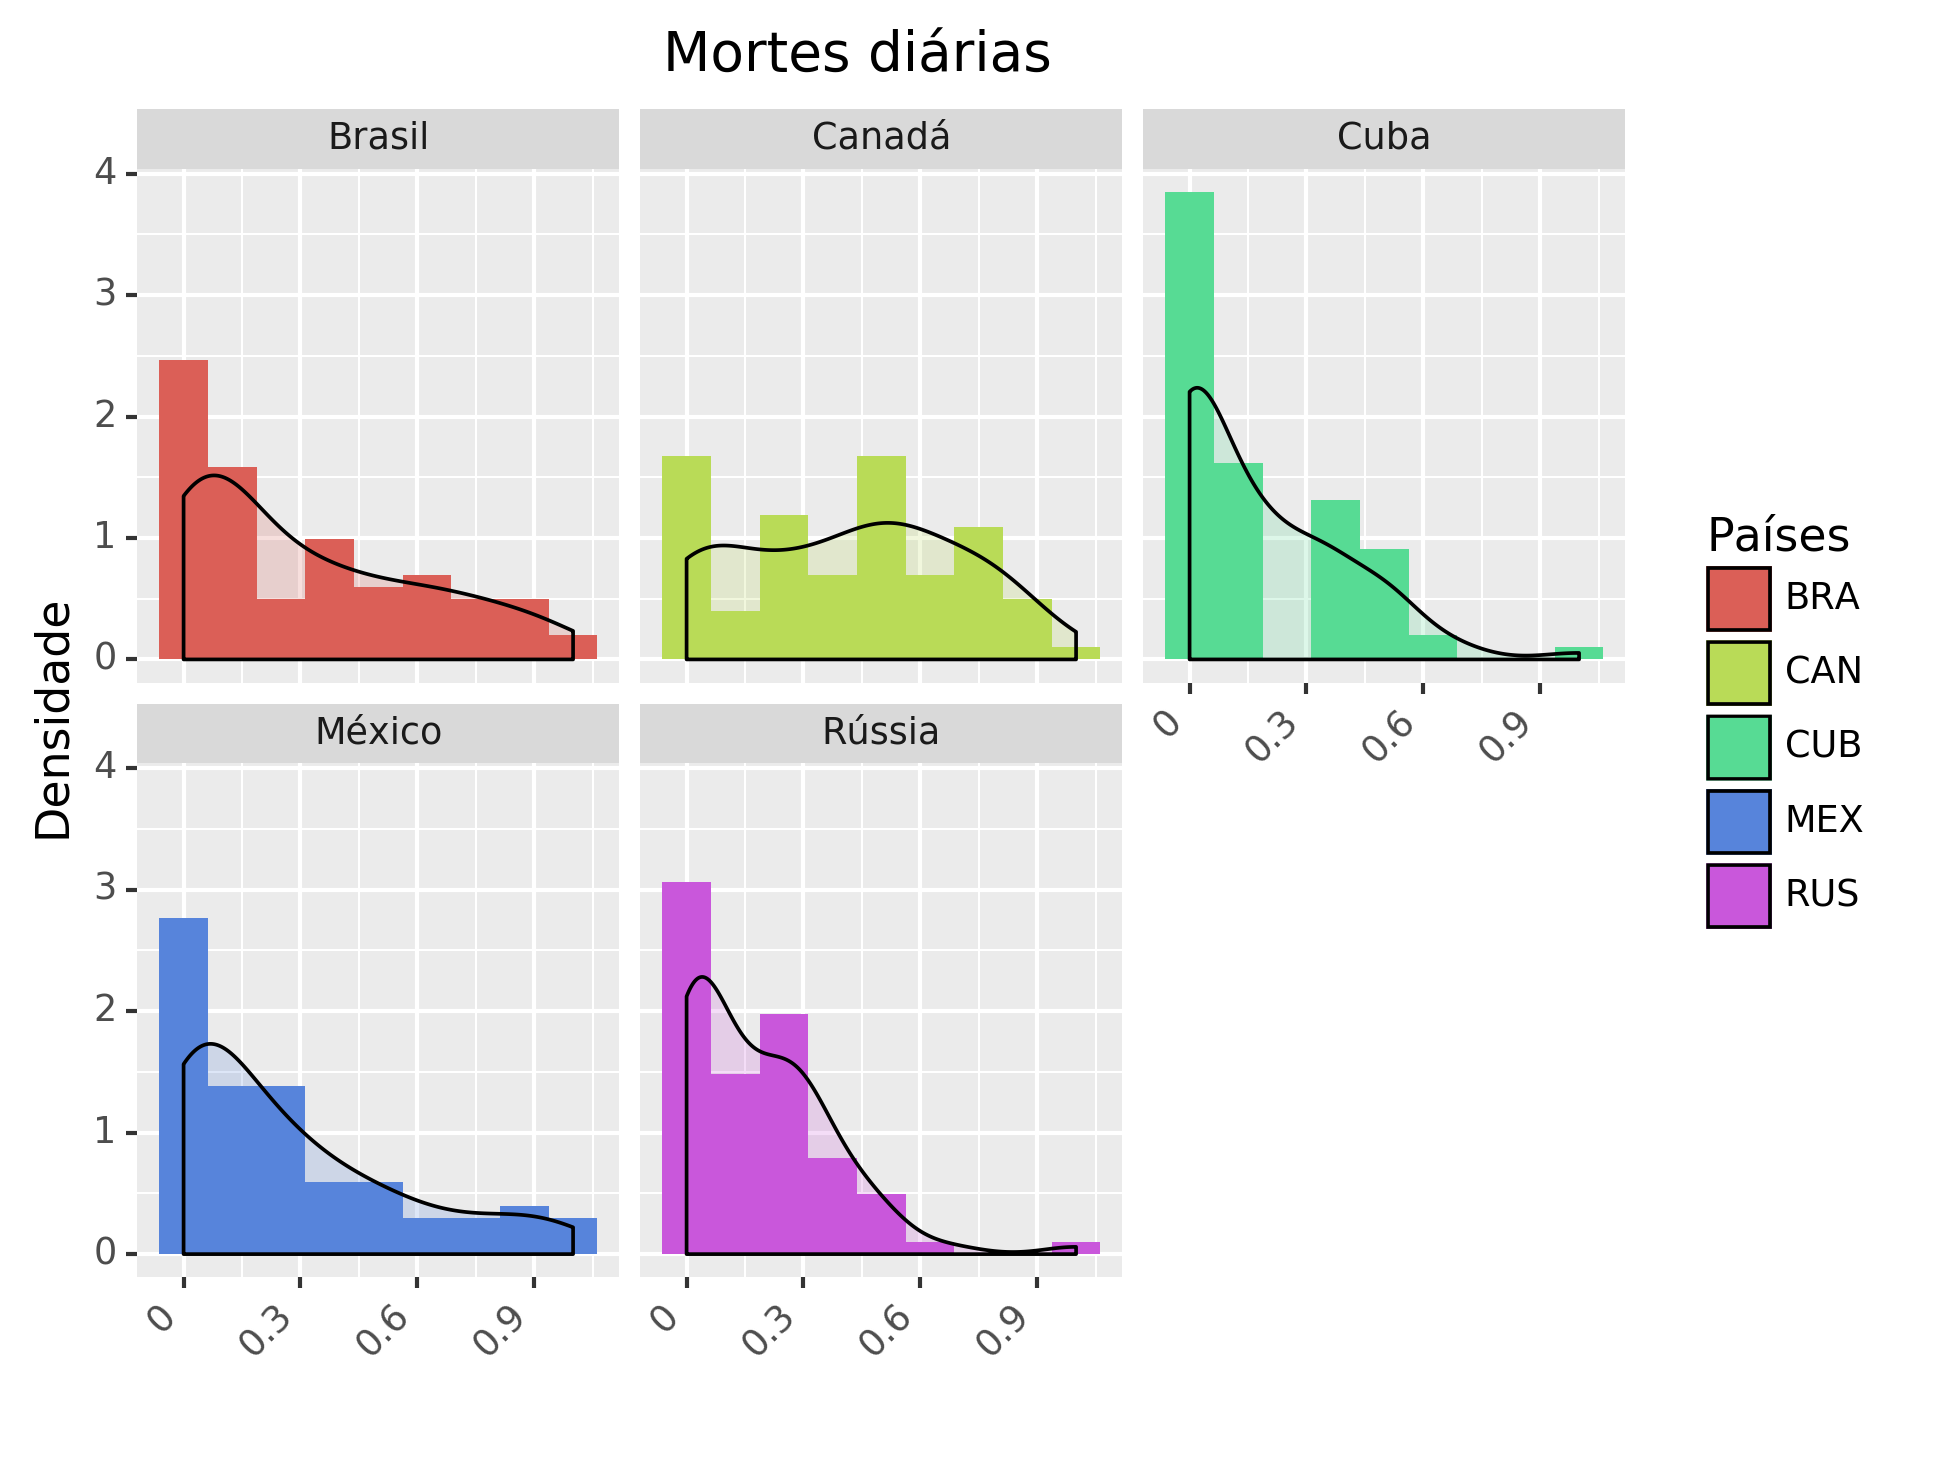

<ggplot: (8773840137385)>

In [54]:
plot_density_bycountry(data_owd, 'new_deaths', 'Mortes diárias' ,'iso_code', ' ', 'Densidade')

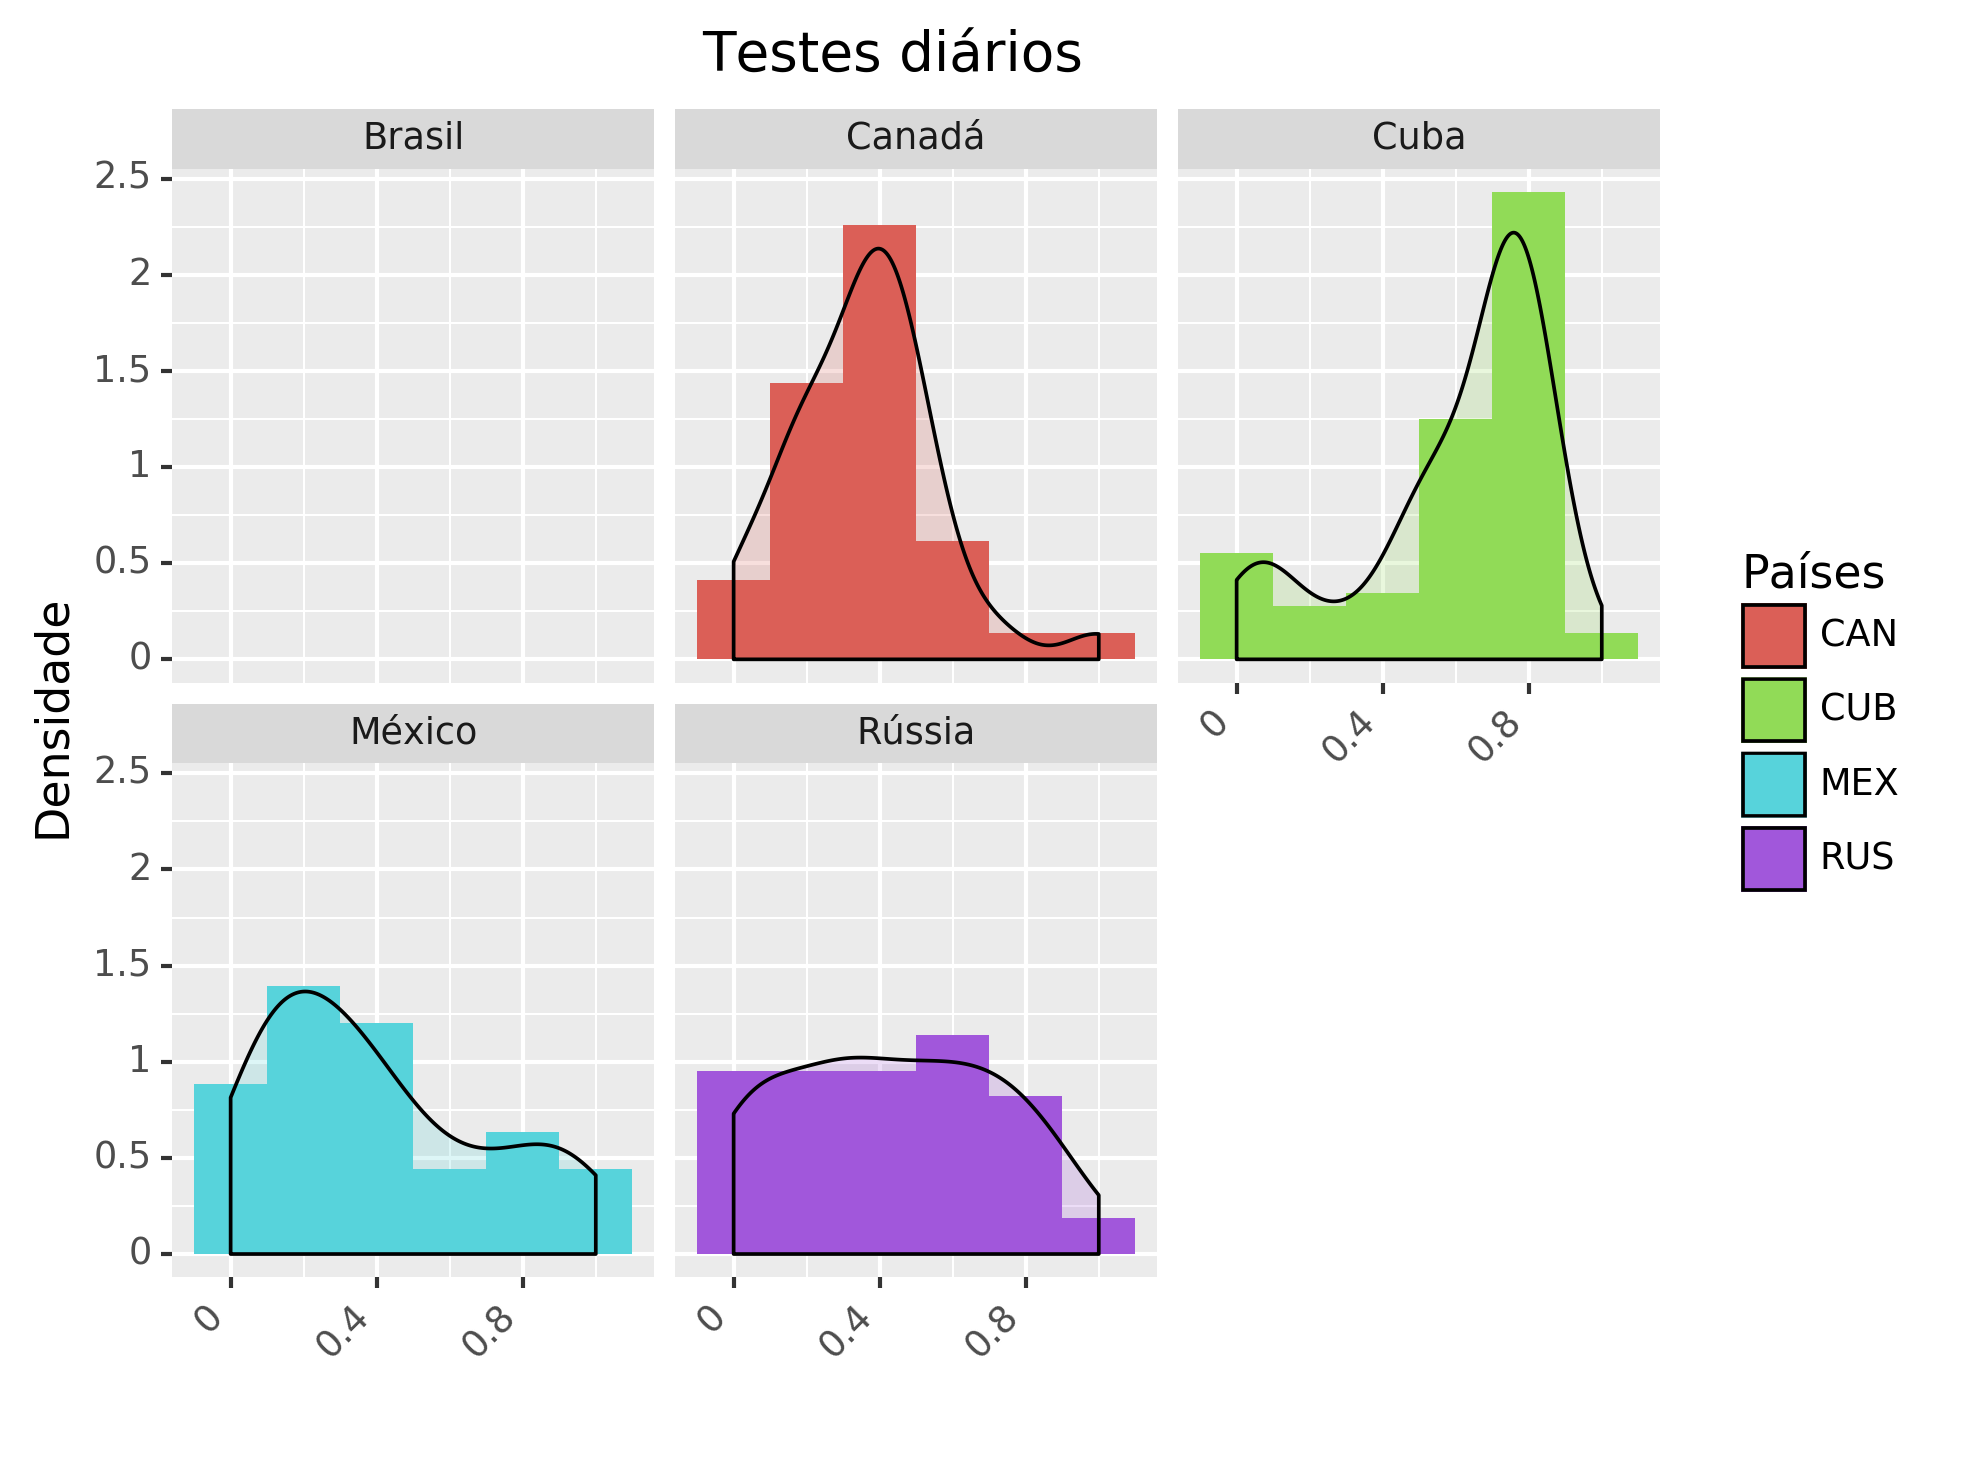

<ggplot: (-9223363263011874139)>

In [55]:
plot_density_bycountry(data_owd, 'new_tests', 'Testes diários' ,'iso_code', ' ', 'Densidade')

<hr>

### Análise de agrupamento

Com o objetivo de identificar de forma numérica as semelhanças entre os dados, nesta seção cada uma das séries temporais serão agrupadas, considerando os parâmetros que possuem flutuação diária, neste caso, **Q**uantidade **D**iária de **C**asos (QDC) e **Q**uantidade **D**iária de mortes (QDM). Como os testes não estão disponíveis para todos os países, este não será considerado nesta avaliação.

Para isto, os dados são sumarizados com estatísticas como *Kurtosis*, *Skewness* e *Variância*. Em seguida, é feita a clusterização com o algoritmo KMeans, implementado na biblioteca [scikit-learn](https://scikit-learn.org/). Por fim, os dados são visualizados através de um mapa.

Começando o fluxo apresentado, os dados são sumarizados através da função `summary_groups`, como apresentado abaixo

In [56]:
def summary_groups(groups, variable):
    """Função auxiliar para a sumarização de dados agrupamentos utilizando como 
    base uma variável arbitrátia
    """
    result = {
        'skewness': [],
        'variance': [],
        'kurtosis': [],
        'id': []
    }
    
    for group in groups:
        name = group[0]
        data = group[1]
        datavar = data[variable]
        
        result['id'].append(name)
        result['variance'].append(np.var(datavar))
        result['skewness'].append(scipy.stats.skew(datavar))
        result['kurtosis'].append(scipy.stats.kurtosis(datavar))
    return pd.DataFrame(result)

Para a quantidade de clusters é definido o valor $K = 3$, uma vez que, por conta da pouca quantiade de dados sumarizados e de classes conhecidas, sendo essas consideradas aqui os países, não é possível gerar muitos grupos. Além disso, métodos como a análise de Elbow não respondem muito bem com a quantidade de dados utilizadas neste trabalho.

Feito esta consideração, é criado uma função auxiliar, `kmeans`, para facilitar a utilização da API do scikit-learn

In [57]:
import sklearn.cluster

def kmeans(data, **kwargs):
    """Função para criar e realizar o fit do modelo com o KMeans"""
    model = sklearn.cluster.KMeans(**kwargs)
    return model.fit(data)

Abaixo, cada uma das variáveis são agrupadas e seus resultados visualizados.

**Quantidade diária de casos**

Abaixo os dados são sumarizados considerando a variável de casos diários

In [58]:
data_owd_summary_by_isocode = summary_groups(data_owd.groupby('location'), 'new_cases')
data_owd_summary_by_isocode

skewness      variance  kurtosis      id
0  1.390222  6.010578e+07  1.318845  Brazil
1 -0.274934  2.648956e+05  0.526965  Canada
2  0.583726  3.442198e+02 -0.864936    Cuba
3  0.696592  1.244766e+06 -0.784943  Mexico
4  0.250396  1.890813e+07 -0.990763  Russia

Após a sumarização, os dados são agrupados

In [59]:
model = kmeans(data_owd_summary_by_isocode.iloc[:, 0:-1], n_clusters = 3, random_state = 80)
data_owd_summary_by_isocode['label'] = model.predict(data_owd_summary_by_isocode.iloc[:, 0:-1])

data_owd_summary_by_isocode

skewness      variance  kurtosis      id  label
0  1.390222  6.010578e+07  1.318845  Brazil      1
1 -0.274934  2.648956e+05  0.526965  Canada      0
2  0.583726  3.442198e+02 -0.864936    Cuba      0
3  0.696592  1.244766e+06 -0.784943  Mexico      0
4  0.250396  1.890813e+07 -0.990763  Russia      2

Para a visualização dos dados, a função `model_to_map` foi criada, esta recupera os resultados do KMeans e insere em um mapa, considerando o nome de cada país.

In [60]:
import geopandas as gpd
world = gpd.read_file('./data/Longitude_Graticules_and_World_Countries_Boundaries.geojson')

def model_to_map(clusterdata, title, locationcol, labelcol):
    _, ax = plt.subplots(dpi = 300)
    plt.title(title)
    world_filtered = world.merge(clusterdata, left_on = 'CNTRY_NAME', right_on = locationcol)
    world.plot(color = 'gray', ax = ax)
    world_filtered.plot(
        column = labelcol, ax = ax, categorical = True, legend = True,
        legend_kwds={'loc': 'lower left', 'title': 'Grupos'}
    )
    
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

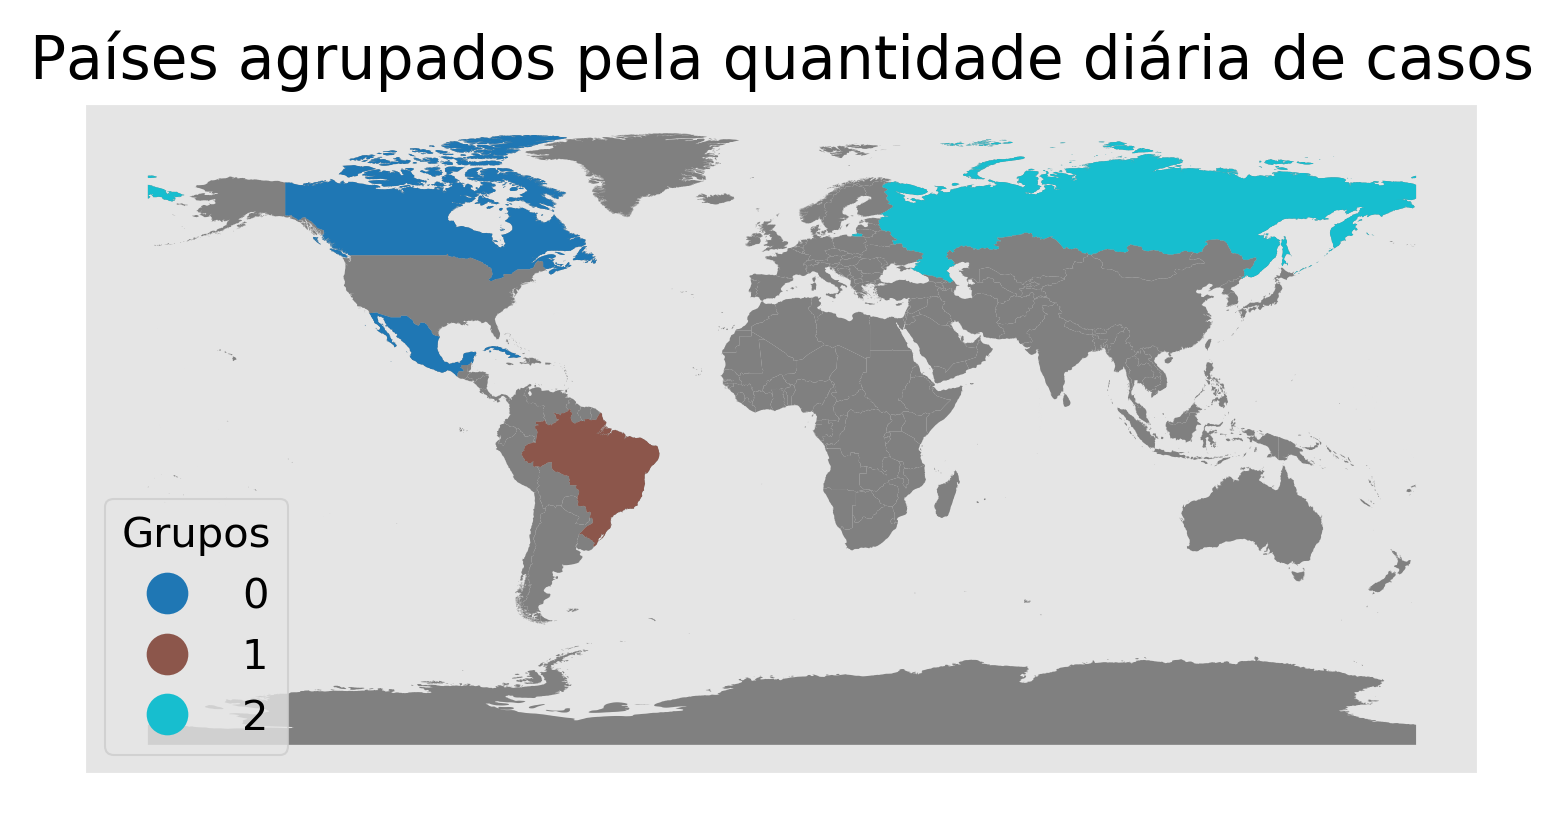

In [61]:
model_to_map(data_owd_summary_by_isocode, 'Países agrupados pela quantidade diária de casos', 'id', 'label')

Note que os resultados gerados correspondem bem as características já visualizadas anteriormente, onde países como Brasil e Russia possuem assinatura únicas nas séries de novos casos, já que nestes sinais há uma dominância de altas amplitudes e de frequências diferentes das demais séries.

**Quantidade diária de mortes**

Para estes dados, os mesmos passos já apresentados e explicados são tomados, mudando apenas a variável que está sendo considerada.

In [62]:
data_owd_summary_by_isocode = summary_groups(data_owd.groupby('location'), 'new_deaths')
data_owd_summary_by_isocode

skewness       variance  kurtosis      id
0  0.753154  140335.352843 -0.697591  Brazil
1  0.025290    3998.302088 -1.158291  Canada
2  1.239818       1.643006  1.399488    Cuba
3  1.088819   20209.600671  0.123022  Mexico
4  1.409614    4132.150892  3.084599  Russia

In [63]:
model = kmeans(data_owd_summary_by_isocode.iloc[:, 0:-1], n_clusters = 3, random_state = 80)
data_owd_summary_by_isocode['label'] = model.predict(data_owd_summary_by_isocode.iloc[:, 0:-1])

data_owd_summary_by_isocode

skewness       variance  kurtosis      id  label
0  0.753154  140335.352843 -0.697591  Brazil      1
1  0.025290    3998.302088 -1.158291  Canada      0
2  1.239818       1.643006  1.399488    Cuba      0
3  1.088819   20209.600671  0.123022  Mexico      2
4  1.409614    4132.150892  3.084599  Russia      0

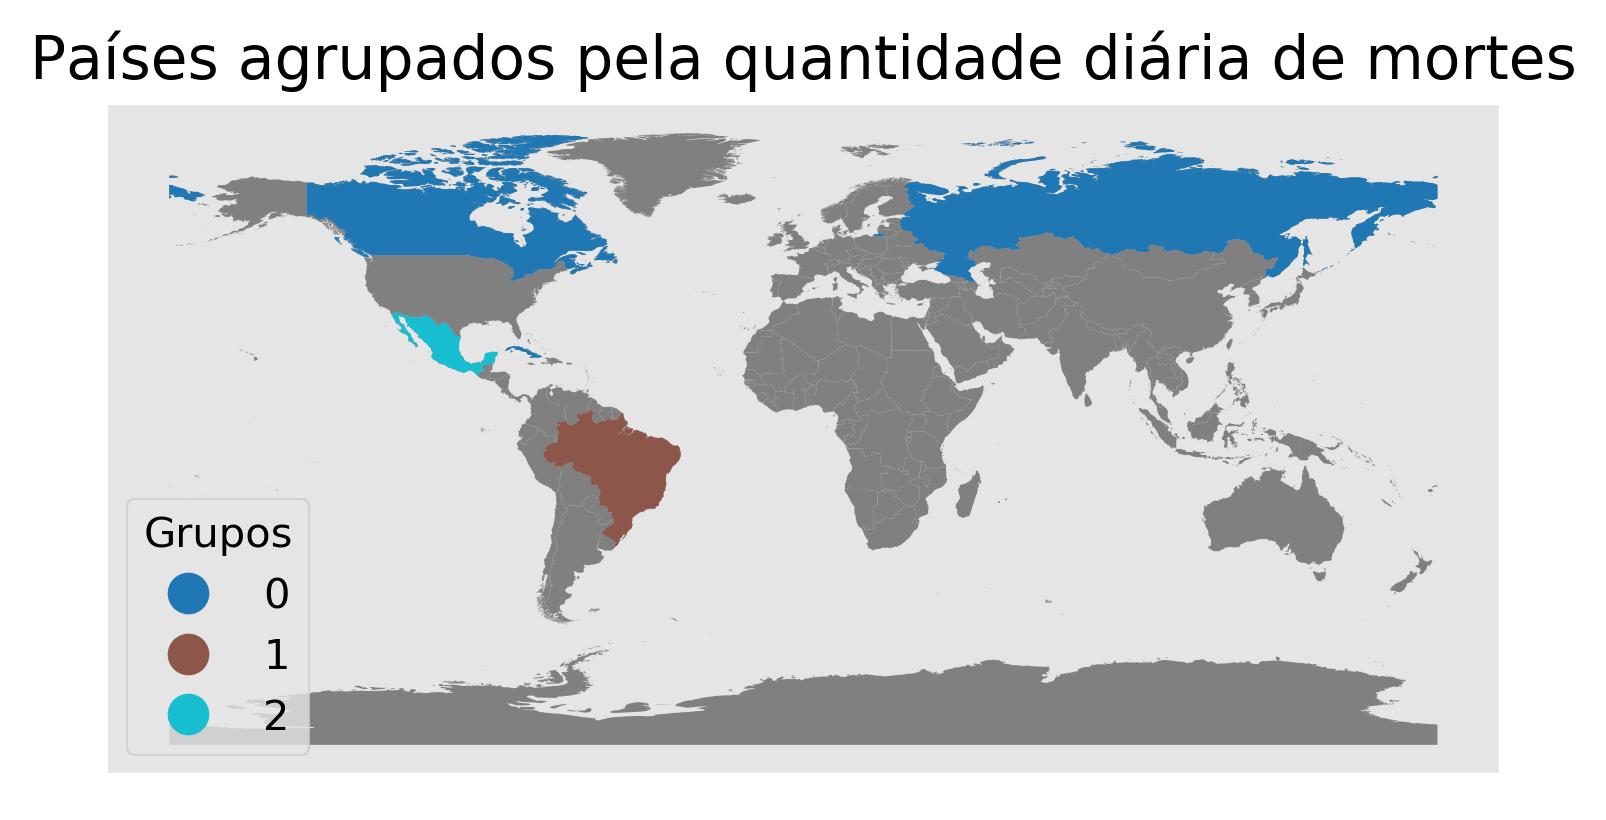

In [64]:
model_to_map(data_owd_summary_by_isocode, 'Países agrupados pela quantidade diária de mortes', 'id', 'label')

Neste gráfico, como é possível perceber ao analisar as séries apresentadas anteriormente, países como Brasil e México que possuem taxas mais altas de mortes são separados em grupos diferentes, diferente dos demais países que são colocados juntos, uma vez que possuem assinaturas próximas para esta série.

**Agrupando pela quantidade diária de casos e mortes**

In [65]:
# Casos diários
data = summary_groups(data_owd.groupby('location'), 'new_cases')
data.columns = ['skewness_newcases', 'variance_newcases', 'kurtosis_newcases', 'id']

# Mortes diárias
data2 = summary_groups(data_owd.groupby('location'), 'new_deaths')
data2.columns = ['skewness_deaths', 'variance_newdeaths', 'kurtosis_newdeaths', 'id']

In [66]:
datamerged = pd.merge(data, data2, on = 'id')
del datamerged['id']

Gerando os agrupamentos variando o valor de $K$. Começando com $K = 2$

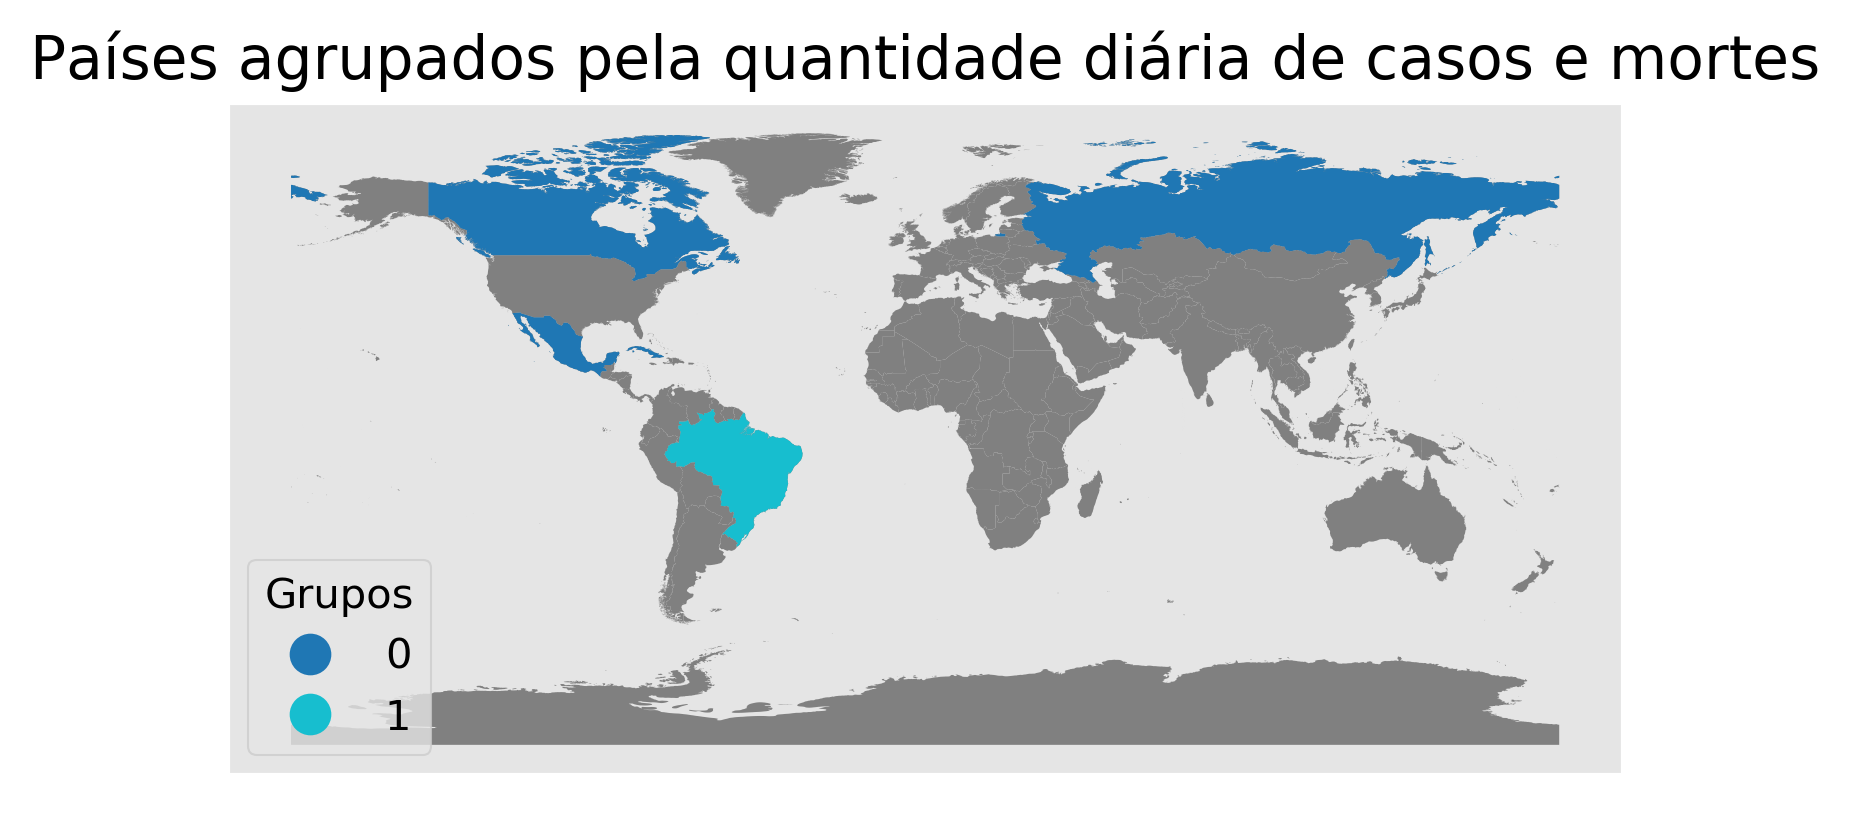

In [67]:
model = sklearn.cluster.KMeans(n_clusters=2, random_state=80).fit(datamerged)

datamergedk2 = datamerged.copy()
datamergedk2['label'] = model.predict(datamergedk2)
datamergedk2['id'] = data['id']

model_to_map(datamergedk2, locationcol = 'id', 
                         title = 'Países agrupados pela quantidade diária de casos e mortes', labelcol = 'label')

$K = 3$

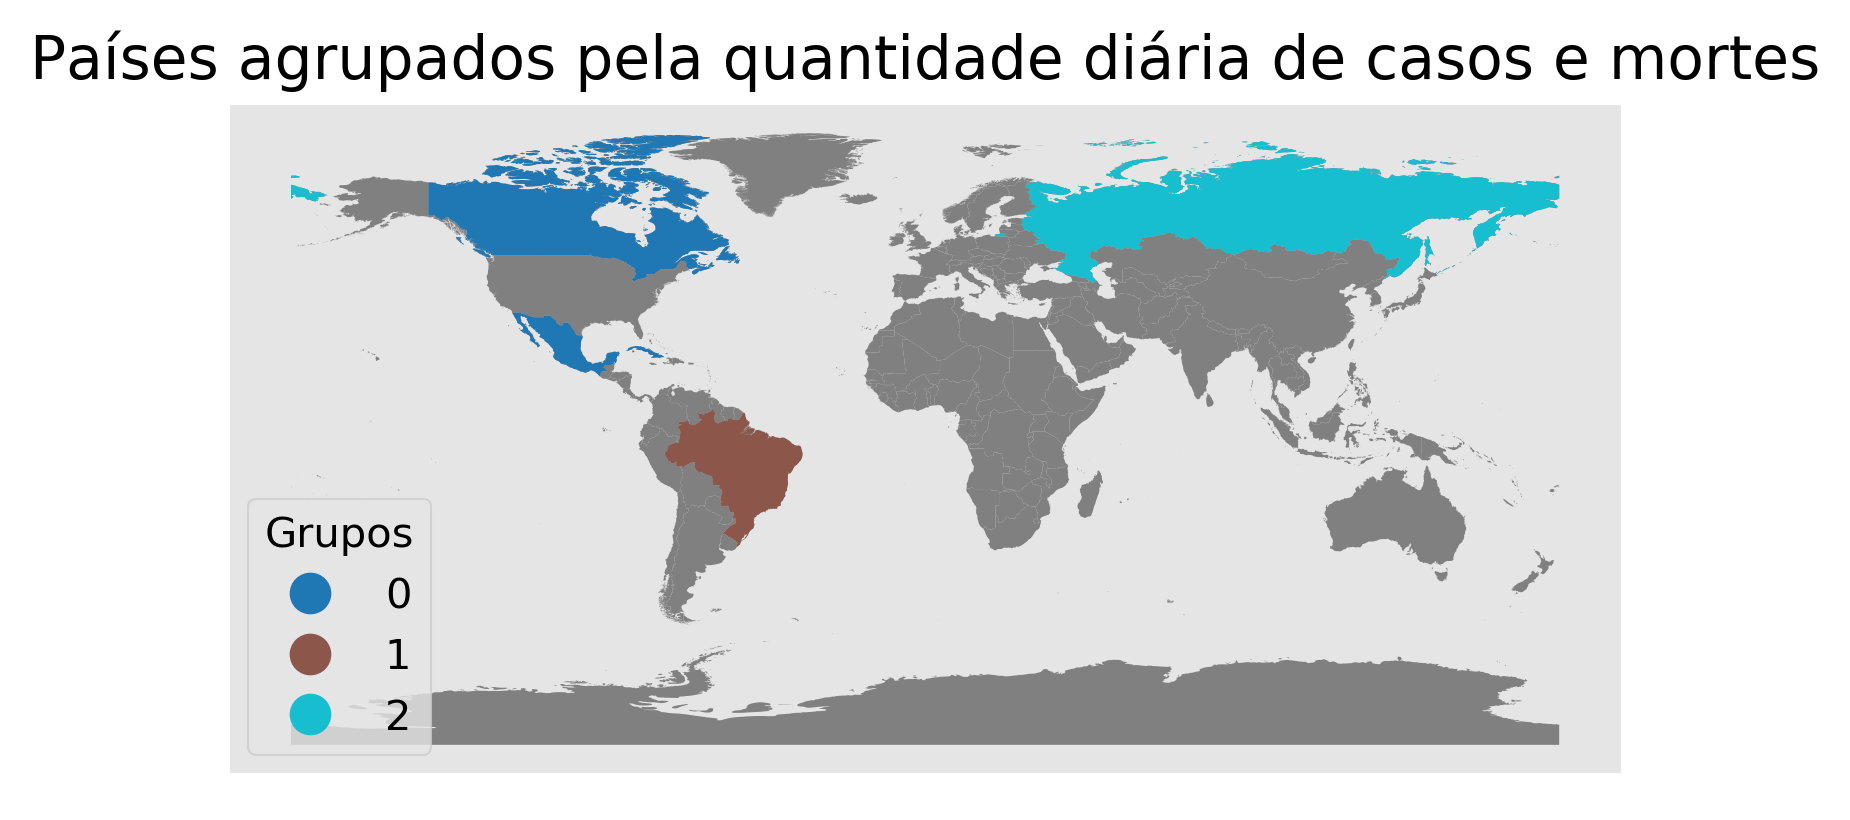

In [68]:
model = sklearn.cluster.KMeans(n_clusters=3, random_state=80).fit(datamerged)

datamergedk3 = datamerged.copy()
datamergedk3['label'] = model.predict(datamergedk3)
datamergedk3['id'] = data['id']

model_to_map(datamergedk3, locationcol = 'id', 
                         title = 'Países agrupados pela quantidade diária de casos e mortes', labelcol = 'label')

$K = 4$

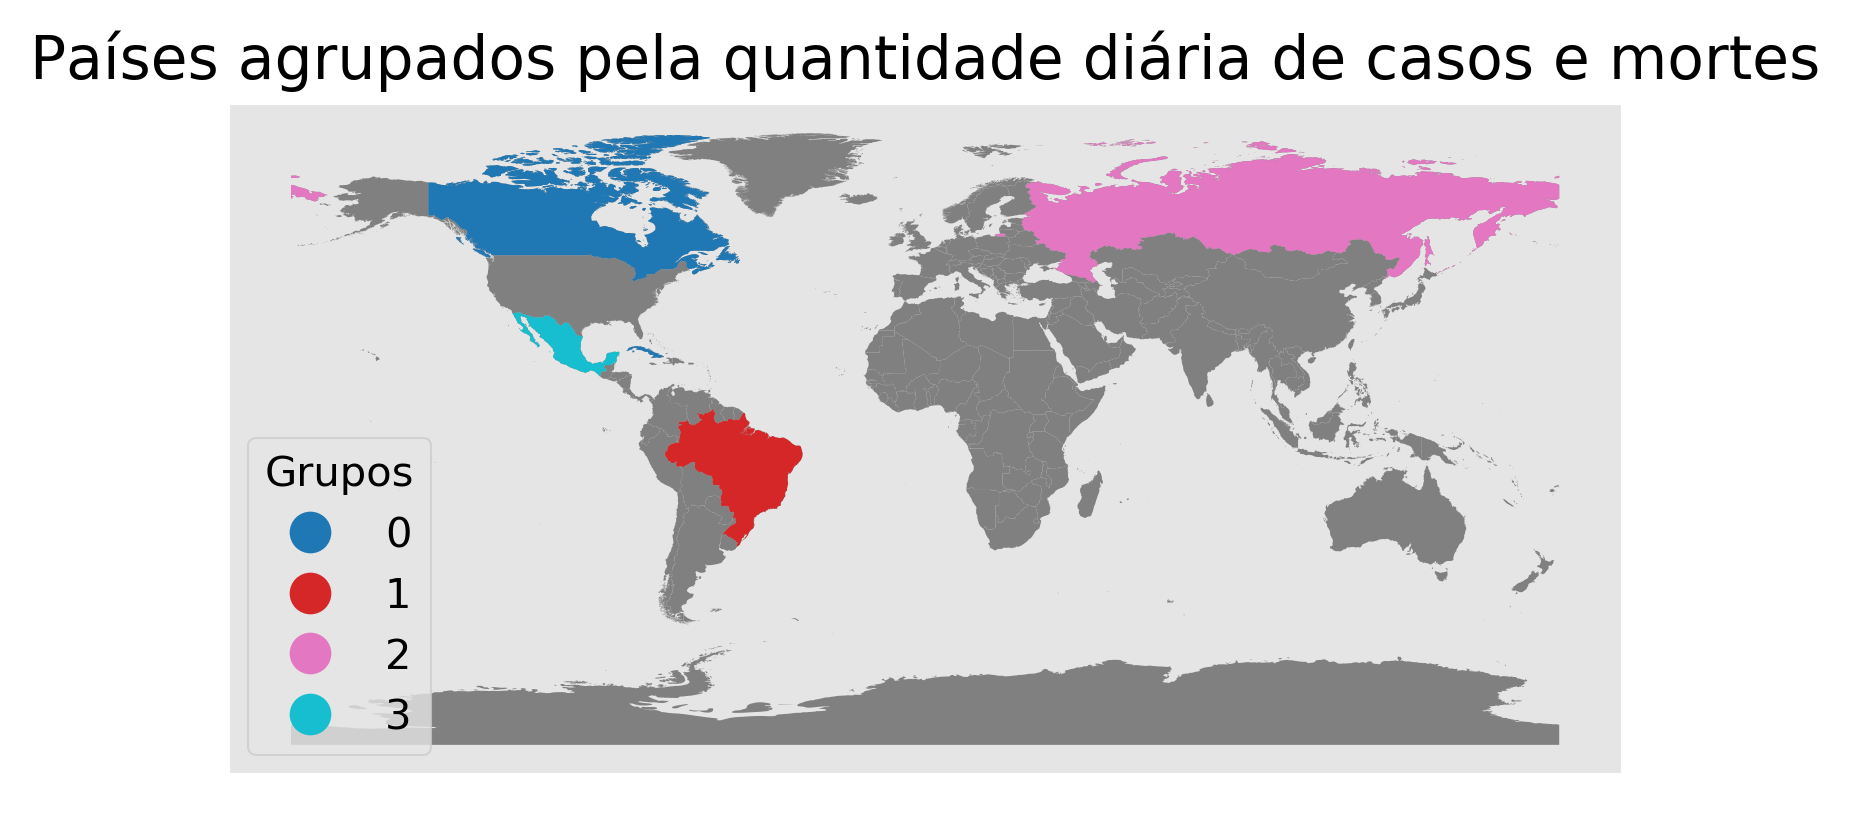

In [69]:
model = sklearn.cluster.KMeans(n_clusters=4, random_state=80).fit(datamerged)

datamergedk4 = datamerged.copy()
datamergedk4['label'] = model.predict(datamergedk4)
datamergedk4['id'] = data['id']

model_to_map(datamergedk4, locationcol = 'id', 
                         title = 'Países agrupados pela quantidade diária de casos e mortes', labelcol = 'label')

<hr>

### *Detrended Fluctuation Analysis* (DFA)

Com o objetivo de identificar longas dependências nas séries temporais analisadas, faz-se a aplicação da técnica DFA. Para isto, as funcionalidades de aplicação e visualização do DFA, disponibilizados pelo Prof. Dr. Reinaldo Rosa, durante as aulas de Matemática Computacional foram adaptados e utilizados neste trabalho.

Para esta análise, apenas a variável de quantidade de novos casos será considerada, uma vez que esta representa parte importante do presente trabalho, sendo considerada em outros momentos deste trabalho.

Tais funcionalidades foram inseridas no arquivo `utils.py` que está disponível no [repositório](https://github.com/cmath-covid/covid19-model) do projeto.

Para começar, as funcionalidades são carregadas e aplicadas sobre os dados de cada um dos países considerados nesta analise.

In [70]:
import utils

In [71]:
dfa_stats = {}

for group in data_owd.groupby('location'):
    name = group[0]
    datag = group[1]
    
    dfa_stats[name] = utils.dfa1d(datag.new_cases, 1)

Com os dados gerados, os mesmos são visualizados na Figura abaixo.

In [72]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

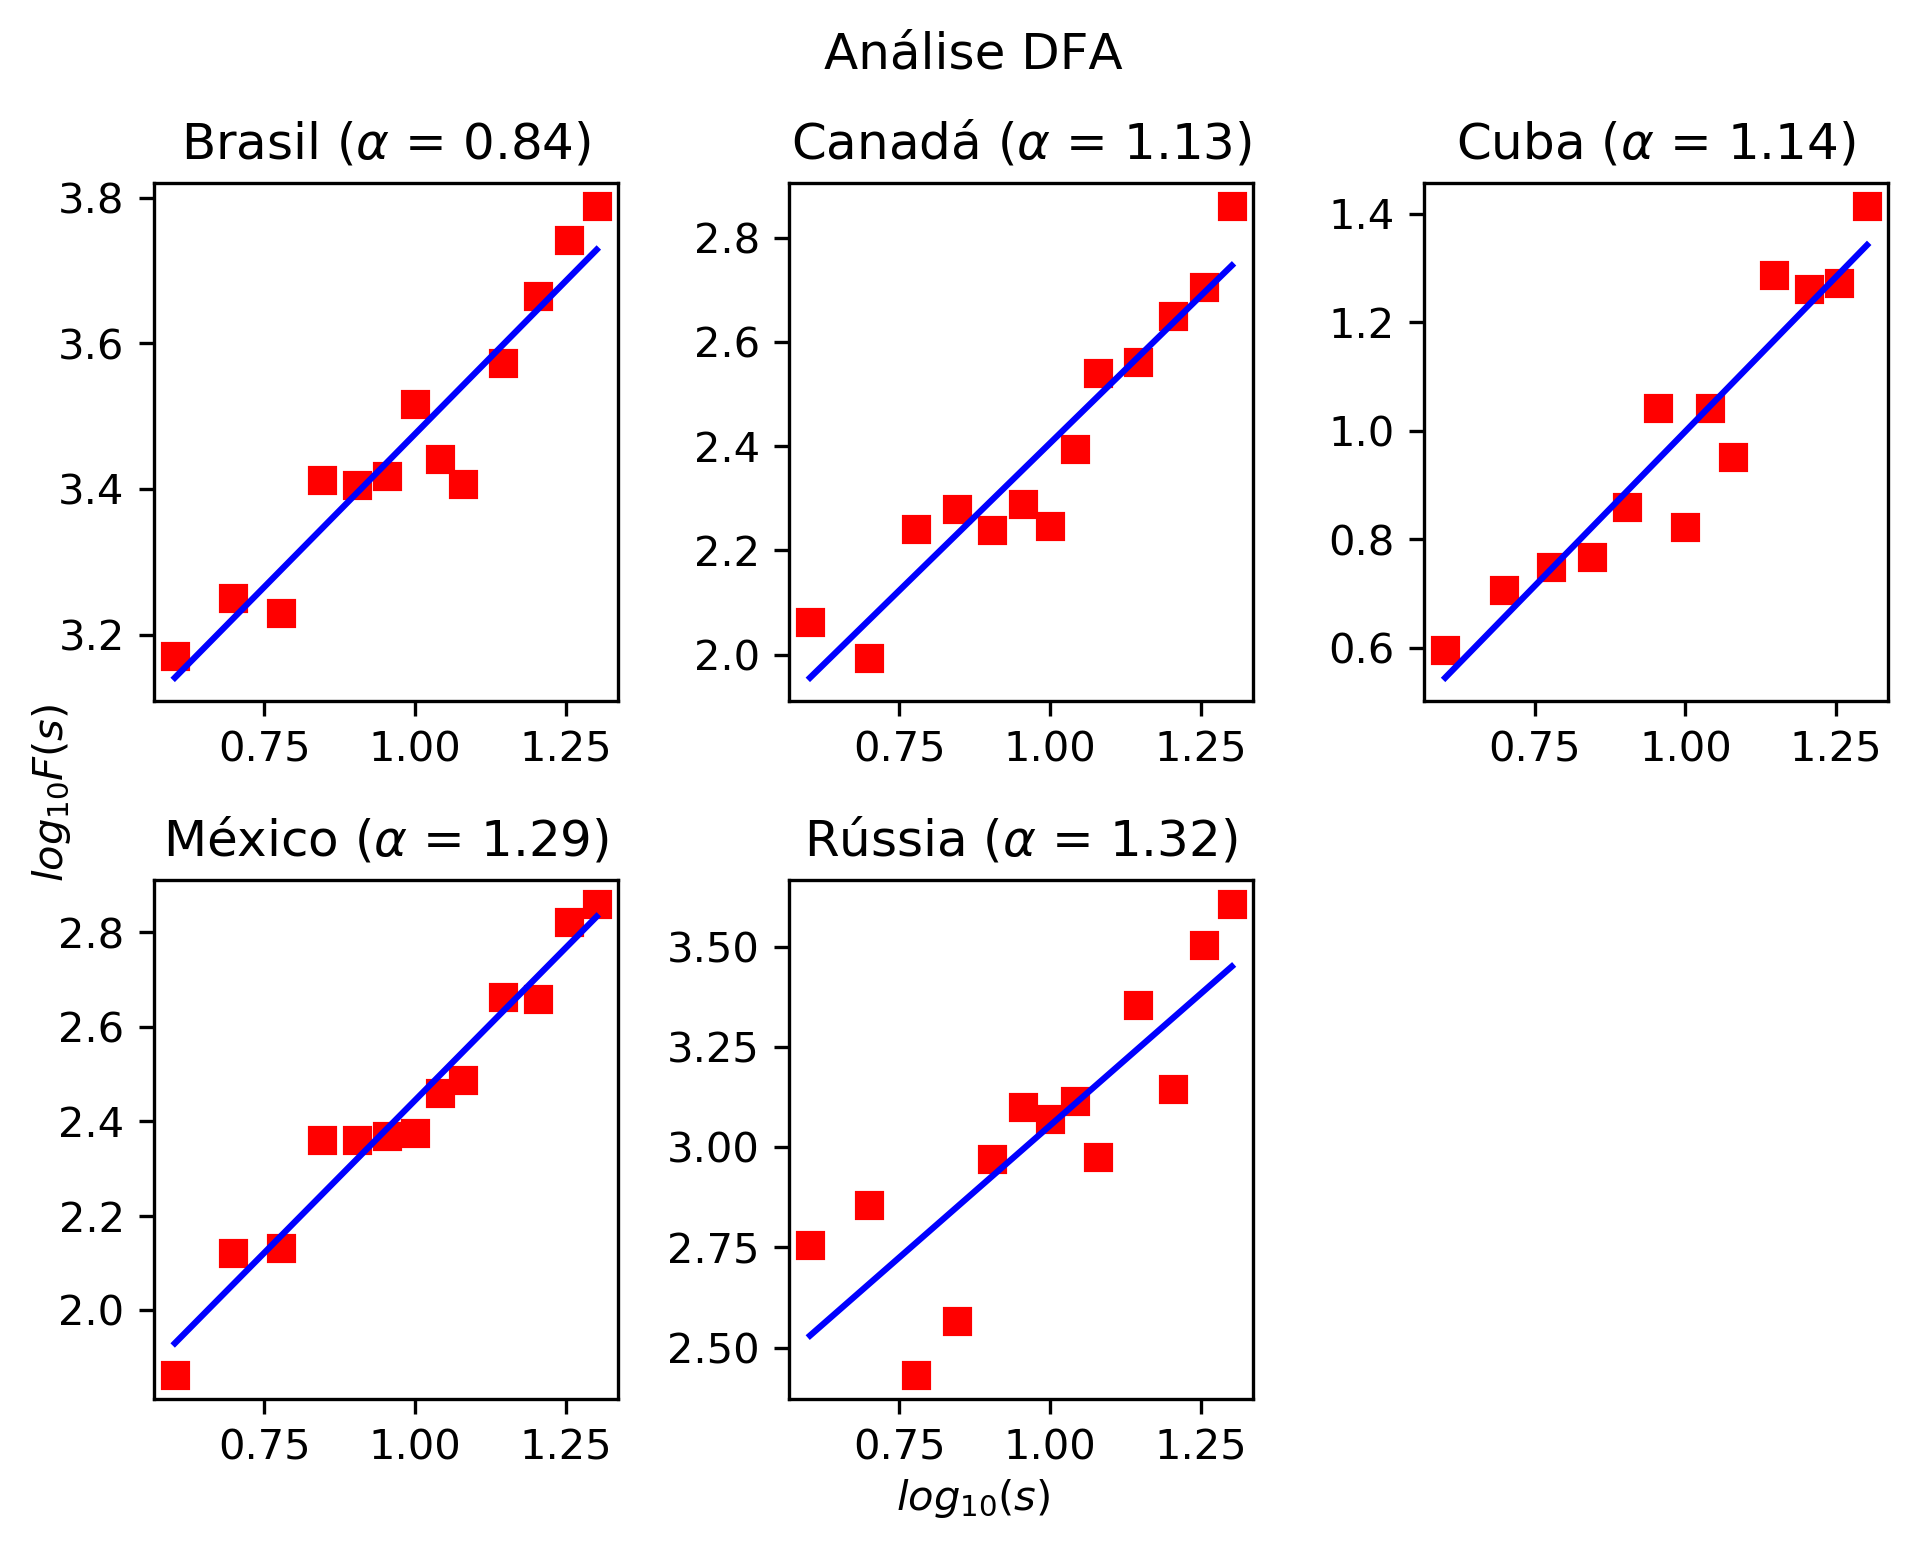

In [73]:
fig, ax = plt.subplots(dpi = 300)

plt.subplot(2, 3, 1)
alfa, _, x, y, reta, _ = dfa_stats['Brazil']
utils.plot_dfa(alfa, x, y, reta, 'Brasil')

plt.subplot(2, 3, 2)
alfa, _, x, y, reta, _ = dfa_stats['Canada']
utils.plot_dfa(alfa, x, y, reta, 'Canadá')

plt.subplot(2, 3, 3)
alfa, _, x, y, reta, _ = dfa_stats['Cuba']
utils.plot_dfa(alfa, x, y, reta, 'Cuba')

plt.subplot(2, 3, 4)
alfa, _, x, y, reta, _ = dfa_stats['Mexico']
utils.plot_dfa(alfa, x, y, reta, 'México')

plt.subplot(2, 3, 5)
alfa, _, x, y, reta, _ = dfa_stats['Russia']
utils.plot_dfa(alfa, x, y, reta, 'Rússia')

plt.suptitle('Análise DFA', y=1.03)
fig.text(0.5, 0.01, '$log_{10} (s)$', ha="center", va="center")
fig.text(0.02, 0.5, '$log_{10} F(s)$', ha="center", va="center", rotation=90)

plt.tight_layout()
plt.show()

### Espectro de singularidade

Para muitos casos, a análise das séries temporais pode ser feita através de um único expoente, como é o caso da análise DFA feita anteriormente. Porém, há casos em que um único valor não é capaz de descrever toda a complexidade presente no fenômeno. Para estes tem-se o nome de múltifractais.

O espectro de singularidade ajuda na identificação do comportamento multifractal em séries temporais. Abaixo é apresentado tal espectro para as séries dos atributos de **casos e mortes diárias**.

In [74]:
import colorednoise as cn

Antes de gerar o espectro, um ruído branco, fractal, será gerado, para que tenha-se a ideia da possível multifractalidade presente nas séries temporais do COVID-19.

In [75]:
white_noise = cn.powerlaw_psd_gaussian(0, 2**18)

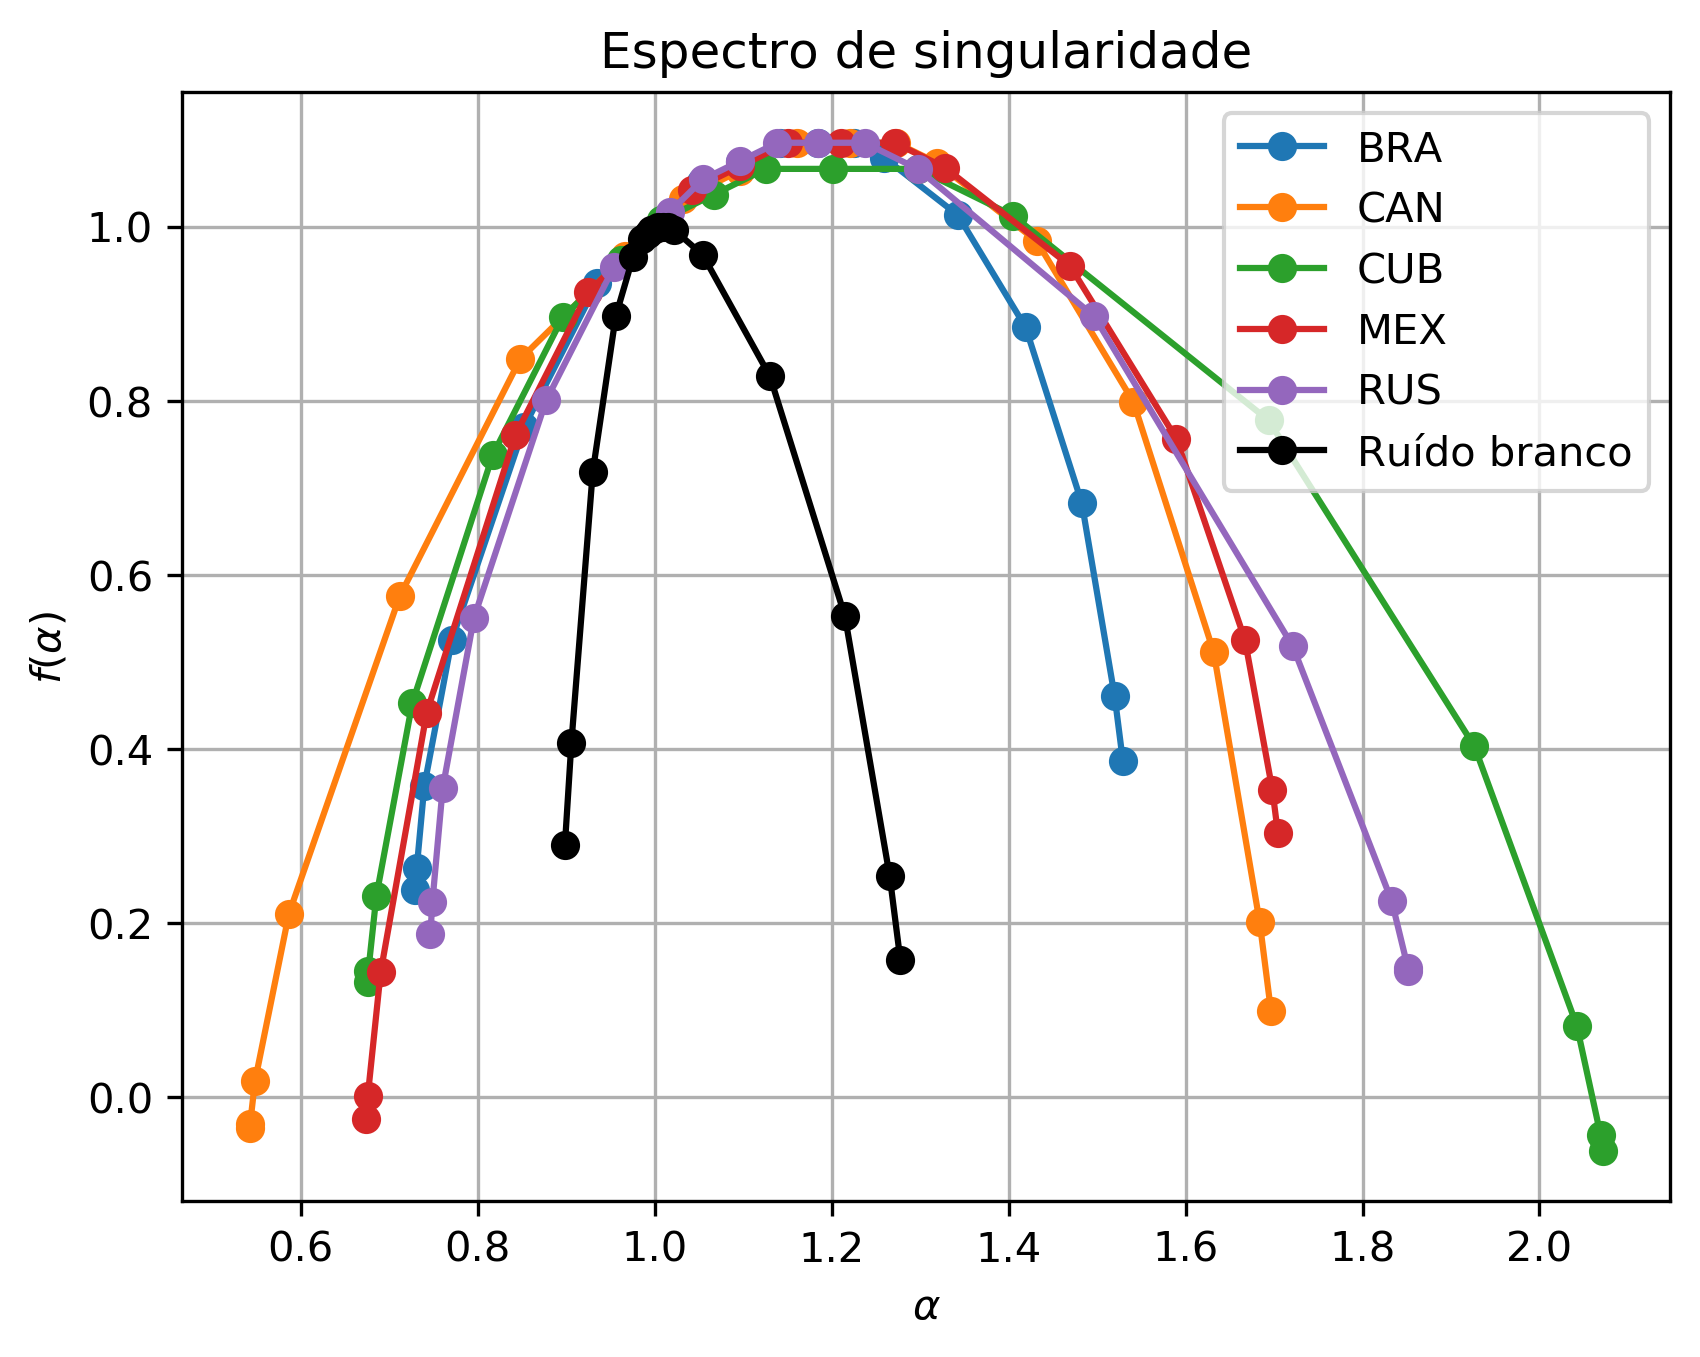

In [76]:
groups = data_owd.groupby('iso_code')

plt.figure(dpi = 300)
for group in groups:
    [_, _, _, stats, _] = utils.getMSSByUpscaling(group[1].new_cases)
    plt.plot(stats['LH'], stats['f'], 'o-', label = group[0])

# Inserindo o ruído branco
[_, _, _, stats, _] = utils.getMSSByUpscaling(white_noise)
plt.plot(stats['LH'], stats['f'], 'ko-', label = 'Ruído branco')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.grid('on', which='major')
plt.title("Espectro de singularidade")
plt.legend()
plt.show()

<hr>

### Regressão linear

Esta seção apresenta a análise de regressão feita nos conjuntos de dados que apresentam PDFs próximas nas variáveis **Casos diários** e **Testes diários**. Para a análise é utilizado a ferramenta [plotnine](https://plotnine.readthedocs.io/en/stable/), uma implementação da *Grammar of Graphics* em Python. Neste módulo, além da visualição é possível adicionar elementos como as linhas de regressão.

> Os testes abaixo são feitos considerando as linhas de regressão linear do plotnine e seu intervalo de confiança de 95%

Para iniciar, os dados são filtrado entre os países identificados com PDFs próximas nas variáveis citadas.

In [77]:
mex = data_owd[data_owd['iso_code'] == 'MEX']
can = data_owd[data_owd['iso_code'] == 'CAN']

Com o filtro realizado, a visualização das análises de regressão são feitas.

#### México

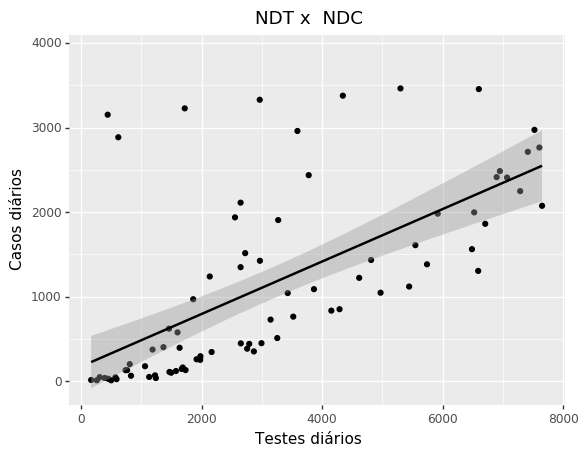

<ggplot: (8773843075041)>

In [78]:
(
    ggplot(mex, aes(x = "new_tests", y = "new_cases")) 
        + geom_point() 
        + geom_smooth(method = 'lm')
        + ggtitle('NDT x  NDC')
        + xlab('Testes diários') + ylab('Casos diários')
)

#### Canadá

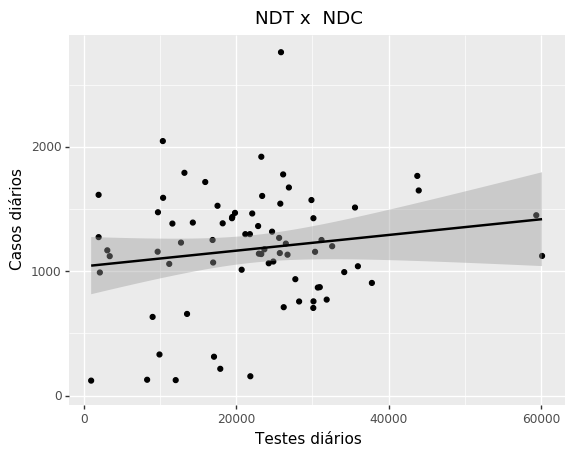

<ggplot: (-9223363263049453778)>

In [79]:
(
    ggplot(can, aes(x = "new_tests", y = "new_cases")) 
        + geom_point() 
        + geom_smooth(method = 'lm')
        + ggtitle('NDT x  NDC')
        + xlab('Testes diários') + ylab('Casos diários')
)